<a href="https://colab.research.google.com/github/PortugalJip2022/Portugal2022/blob/main/%E7%A4%BE%E5%86%85%E6%96%BD%E7%AD%96_%E3%83%9D%E3%83%AB%E3%83%88%E3%82%AC%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#事前準備
起動時最初に流す！！  
パッケージのインストール

In [ ]:
p = installed.packages()
rownames( p )

[1] "IRdisplay"     "IRkernel"      "pbdZMQ"        "repr"         
  [5] "askpass"       "assertthat"    "backports"     "base64enc"    
  [9] "bit"           "bit64"         "blob"          "brew"         
 [13] "brio"          "broom"         "bslib"         "cachem"       
 [17] "callr"         "cellranger"    "cli"           "clipr"        
 [21] "colorspace"    "commonmark"    "cpp11"         "crayon"       
 [25] "credentials"   "curl"          "data.table"    "DBI"          
 [29] "dbplyr"        "desc"          "devtools"      "diffobj"      
 [33] "digest"        "dplyr"         "dtplyr"        "ellipsis"     
 [37] "evaluate"      "fansi"         "farver"        "fastmap"      
 [41] "forcats"       "fs"            "gargle"        "generics"     
 [45] "gert"          "ggplot2"       "gh"            "gitcreds"     
 [49] "glue"          "googledrive"   "googlesheets4" "gtable"       
 [53] "haven"         "highr"         "hms"           "htmltools"    
 [57] "httr"          "ids"           "ini"           "isoband"      
 [61] "jquerylib"     "jsonlite"      "knitr"         "labeling"     
 [65] "lifecycle"     "lubridate"     "magrittr"      "memoise"      
 [69] "mime"          "modelr"        "munsell"       "openssl"      
 [73] "pillar"        "pkgbuild"      "pkgconfig"     "pkgload"      
 [77] "praise"        "prettyunits"   "processx"      "progress"     
 [81] "ps"            "purrr"         "R6"            "rappdirs"     
 [85] "rcmdcheck"     "RColorBrewer"  "readr"         "readxl"       
 [89] "rematch"       "rematch2"      "remotes"       "reprex"       
 [93] "rlang"         "rmarkdown"     "roxygen2"      "rprojroot"    
 [97] "rstudioapi"    "rversions"     "rvest"         "sass"         
[101] "scales"        "selectr"       "sessioninfo"   "stringi"      
[105] "stringr"       "svglite"       "sys"           "systemfonts"  
[109] "testthat"      "tibble"        "tidyr"         "tidyselect"   
[113] "tidyverse"     "tinytex"       "tzdb"          "usethis"      
[117] "utf8"          "uuid"          "vctrs"         "viridisLite"  
[121] "vroom"         "waldo"         "whisker"       "withr"        
[125] "xfun"          "xml2"          "xopen"         "yaml"         
[129] "zip"           "base"          "boot"          "class"        
[133] "cluster"       "codetools"     "compiler"      "datasets"     
[137] "foreign"       "graphics"      "grDevices"     "grid"         
[141] "KernSmooth"    "lattice"       "MASS"          "Matrix"       
[145] "methods"       "mgcv"          "nlme"          "nnet"         
[149] "parallel"      "rpart"         "spatial"       "splines"      
[153] "stats"         "stats4"        "survival"      "tcltk"        
[157] "tools"         "utils"

In [ ]:
install.packages( "Rcmdr" )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘htmlTable’, ‘Hmisc’, ‘e1071’, ‘RcmdrMisc’, ‘tcltk2’




In [ ]:
library("Rcmdr")

Loading required package: splines

Loading required package: RcmdrMisc

Loading required package: car

Loading required package: carData

Loading required package: sandwich

Loading required package: effects

lattice theme set by effectsTheme()
See ?effectsTheme for details.

Warning message:
“no DISPLAY variable so Tk is not available”
The Commander GUI is launched only in interactive sessions


Attaching package: ‘Rcmdr’


The following object is masked from ‘package:base’:

    errorCondition




In [ ]:
install.packages( "ROCR" )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




In [ ]:
llrt <- function(mfull,m){
  loglik_full <- sum(mfull$y * log(mfull$fitted.values) + (1 - mfull$y) * log(1-mfull$fitted.values))
  logLik_dvar <- sum(m$y * log(m$fitted.values) + (1 - m$y) * log(1-m$fitted.values))
  chisq <- -2 * (logLik_dvar  - loglik_full)
  df <- summary(mfull)$df[1] - summary(m)$df[1]
  p <- 1- pchisq(chisq,df)
  round(c(chisq , df ,p ),3)
  }

# １．モデル作成１回目

とりあえず全投入   
→　有意確率5%超先発生

In [ ]:
df <- read.table("https://raw.githubusercontent.com/f11828my/Internalmeasures/3fbf6d8d67b83df27377c31c27ce80f9ff3e2051/Data_insample.txt",
                  header=TRUE , sep = "," , na.strings = "NA" ,dec=".",strip.white=TRUE)

In [ ]:
# カテゴリ変数作成

df$C_dokki <- as.factor(df$C_dokki)
df$C_job <- as.factor(df$C_job)
df$C_education <- as.factor(df$C_education)
df$C_default <- as.factor(df$C_default)
df$C_housing <- as.factor(df$C_housing)
df$C_loan <- as.factor(df$C_loan)
df$C_contact <- as.factor(df$C_contact)
df$C_Day <- as.factor(df$Day)
df$C_month <- as.factor(df$C_month)
df$C_poutcome <- as.factor(df$C_poutcome)

# カテゴリ変数　まとめ
##職業（無職、不明は同カテゴリ
df$C_job <- recode(df$C_job, ' 12=11')


In [ ]:
#連続値変数作成

#各変数　上限設定

##年齢
df$age_60 <- pmin(df$age,60)

#＃平均残高
df$balance_5000 <- pmax(df$balance,-1)
df$balance_5000 <- pmin(df$balance_5000,5000)

##現在のマーケティングキャンペーンにおける顧客への連絡回数
df$campaign_11 <- pmin(df$campaign,11)

##以前のマーケティングキャンペーンにおける顧客への最終連絡日からの経過日数
df$pdays_300 <- pmin(df$pdays,300)

df$F_pdays <- 0
df[df$pdays == -1,]$F_pdays <- 1
df$F_pdays <- as.factor(df$F_pdays)

##以前のマーケティングキャンペーンにおける顧客への連絡回数
df$previous_11 <- pmin(df$previous,11)


#平滑化
library(splines)
i <- 3

B_age <- bs(df$age_60,df=i)
B_balance <- bs(df$balance_5000,df = i)
B_campaign <- bs(df$campaign_11,df = i)
B_pdays <- bs(df$pdays_300,df = i)
B_previous <- bs(df$previous_11,df = i)

df[,"B_age"] <- B_age
df[,"B_balance"] <- B_balance
df[,"B_campaign"] <- B_campaign
df[,"B_pdays"] <- B_pdays
df[,"B_previous"] <- B_previous

In [ ]:
#モデル作成_1回目

mbs <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
            C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
            C_Day +
            C_month +
            B_campaign +
            B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

In [ ]:

llrt <- function(mfull,m){
  loglik_full <- sum(mfull$y * log(mfull$fitted.values) + (1 - mfull$y) * log(1-mfull$fitted.values))
  logLik_dvar <- sum(m$y * log(m$fitted.values) + (1 - m$y) * log(1-m$fitted.values))
  chisq <- -2 * (logLik_dvar  - loglik_full)
  df <- summary(mfull)$df[1] - summary(m)$df[1]
  p <- 1- pchisq(chisq,df)
  round(c(chisq , df ,p ),3)
  }

  mbs_pdays <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
            C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
            C_Day +
            C_month +
            B_campaign +
           # B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

llrt(mbs,mbs_pdays)

[1] 22.45  4.00  0.00

In [ ]:
Anova(mbs)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
B_age,53.0183281,3,1.816941e-11
C_job,17.9193288,10,5.633979e-02
C_dokki,36.3746982,2,1.262800e-08
C_education,16.8730371,3,7.505293e-04
C_default,0.3001636,1,5.837799e-01
B_balance,90.1352105,3,2.048875e-19
C_housing,126.6455226,1,2.221035e-29
C_loan,36.1636577,1,1.814225e-09
C_contact,217.9925705,2,4.608024e-48


# ２．モデル作成２回目

「C_default」有意確率5%超のため削除  
「C_job」投入方法検討

説明力  
AR　　　CAP20　　CAP30　　CAP70

56.99　　60.26　　　68.67　　　90.52





Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

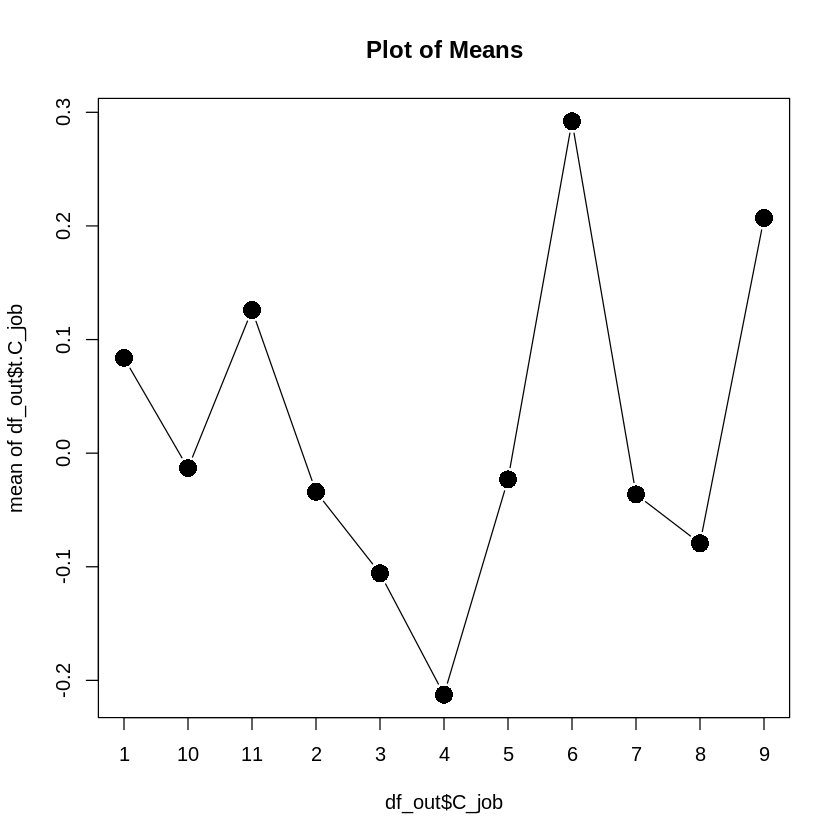

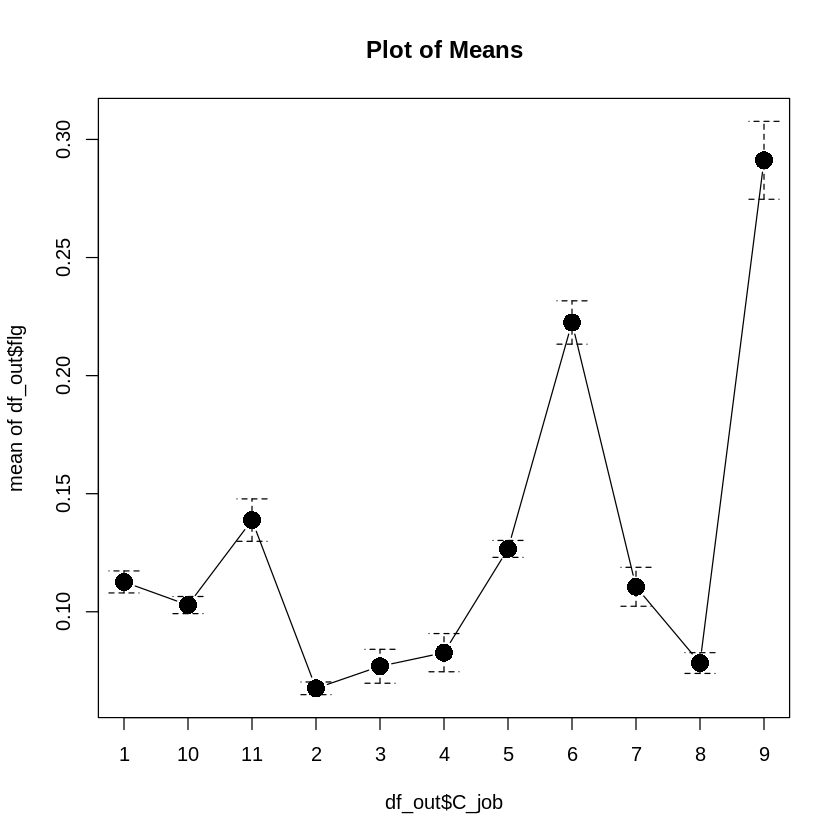

In [ ]:
#モデル1回目での職業別スコア/実績を確認

df_out <- data.frame(df,p=predict(mbs,type="response"),t=predict(mbs,type="terms"))
plotMeans(df_out$t.C_job,df_out$C_job,error.bars="se")
plotMeans(df_out$flg,df_out$C_job,error.bars="se")

In [ ]:
##職業
df$C_job <- recode(df$C_job, ' 4=3 ; 8=3')

In [ ]:
#モデル作成_２回目
#「C_default」有意確率が出ているので削除

mbs <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
          #  C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
            C_Day +
            C_month +
            B_campaign +
            B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

ERROR: ignored

In [ ]:

llrt <- function(mfull,m){
  loglik_full <- sum(mfull$y * log(mfull$fitted.values) + (1 - mfull$y) * log(1-mfull$fitted.values))
  logLik_dvar <- sum(m$y * log(m$fitted.values) + (1 - m$y) * log(1-m$fitted.values))
  chisq <- -2 * (logLik_dvar  - loglik_full)
  df <- summary(mfull)$df[1] - summary(m)$df[1]
  p <- 1- pchisq(chisq,df)
  round(c(chisq , df ,p ),3)
  }

  mbs_pdays <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
           # C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
            C_Day +
            C_month +
            B_campaign +
           # B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

llrt(mbs,mbs_pdays)

[1] 28.635  4.000  0.000

In [ ]:
Anova(mbs)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
B_age,50.939743,3,5.038850e-11
C_job,15.815567,8,4.509729e-02
C_dokki,37.203868,2,8.342242e-09
C_education,18.432689,3,3.581088e-04
B_balance,89.955587,3,2.239219e-19
C_housing,125.399031,1,4.162388e-29
C_loan,35.154460,1,3.045632e-09
C_contact,224.195662,2,2.072672e-49
C_Day,236.015608,30,7.421619e-34


In [ ]:
library(ROCR)

df_out <- data.frame(df,p=predict(mbs,type="response"),t=predict(mbs,type="terms"))

d_arcap <- df_out

#目的変数名
targetName <- "flg"
targetPred <- d_arcap[,targetName]

#ソートする変数、予測確率、GNO、CR
sortName <- "p"
sortPred <- d_arcap[,sortName]

#ARの計算
pred <- prediction(sortPred,targetPred)
AUC <- as.numeric( performance(pred,"auc")@y.values )
AR <- 2 *(AUC-0.5) * 100 #AR値

#CAP値の計算
#予測確率（GNO、CR）を照準に件数等分１０分類
d_arcap$CP10 <- bin.var( sortPred, bins=10, method='proportions',labels =FALSE)

#区分別のデフォルト件数
dcount <- tapply(targetPred,list(CP10=d_arcap$CP10),sum,na.rm=TRUE)

#CAP20値
CAP20 <- sum(dcount[9:10]) / sum(dcount) * 100

#CAP30値
CAP30 <- sum(dcount[8:10]) / sum(dcount) * 100

#CAP70値
CAP70 <- sum(dcount[4:10]) / sum(dcount) * 100

#結果
round(c(AR,CAP20,CAP30,CAP70),2)

[1] 56.97 60.42 68.83 90.30

## ２‐１．グラフ確認


Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


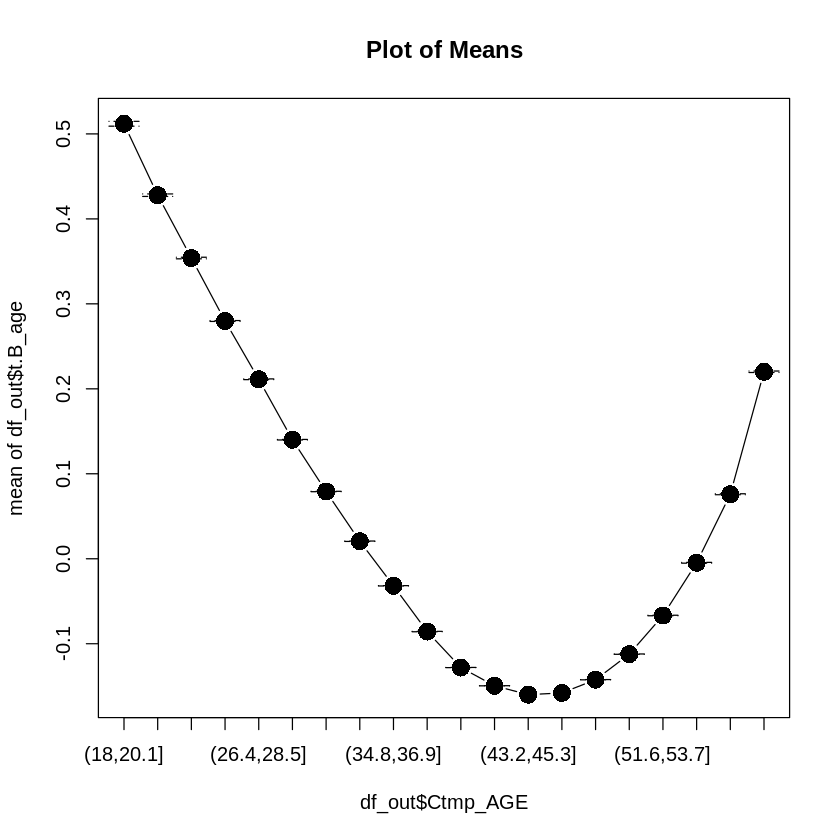

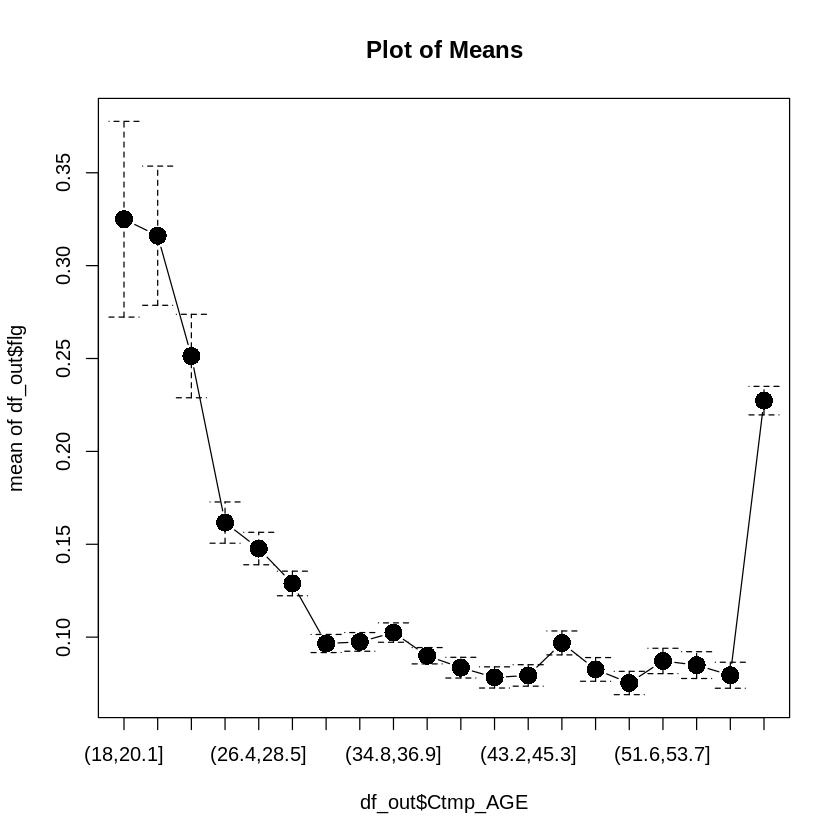

In [ ]:
df_out$Ctmp_AGE <- bin.var(df_out$age_60,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_age,df_out$Ctmp_AGE,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_AGE,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

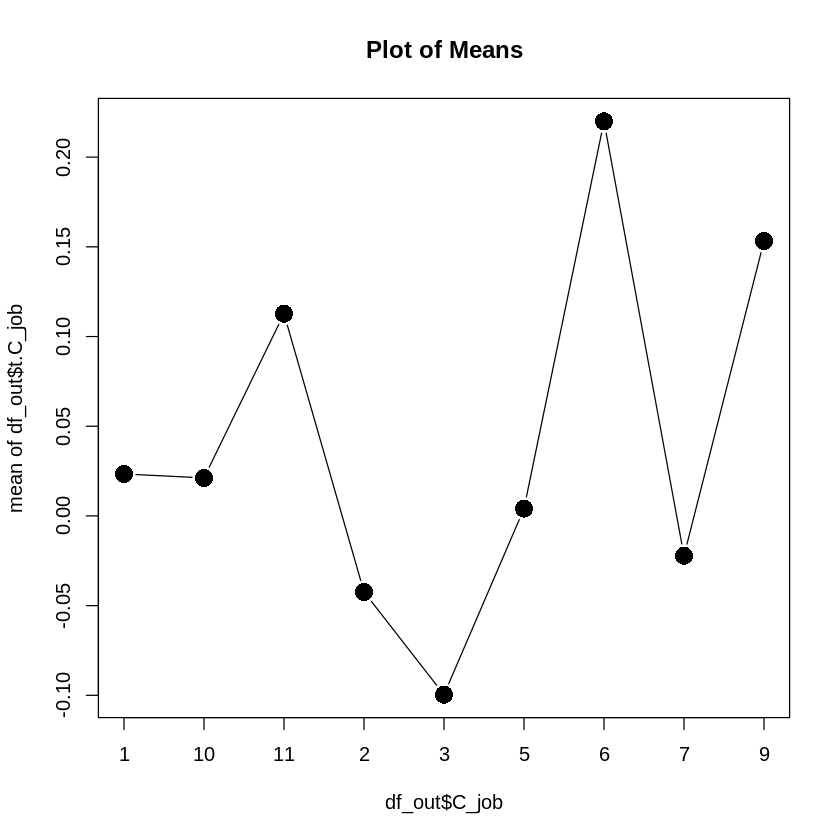

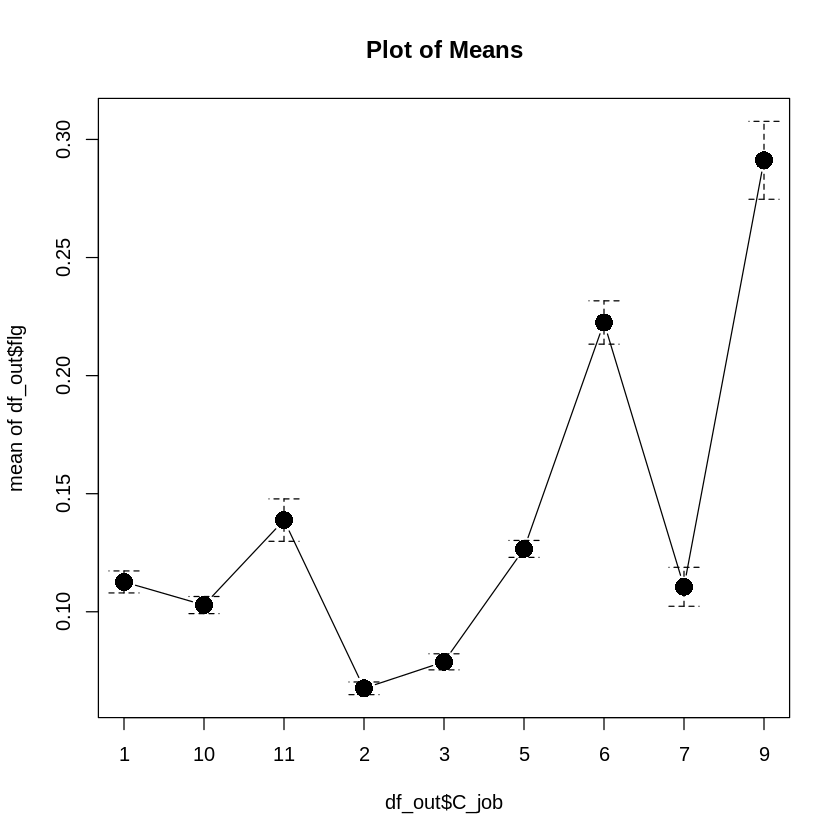

In [ ]:
plotMeans(df_out$t.C_job,df_out$C_job,error.bars="se")
plotMeans(df_out$flg,df_out$C_job,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


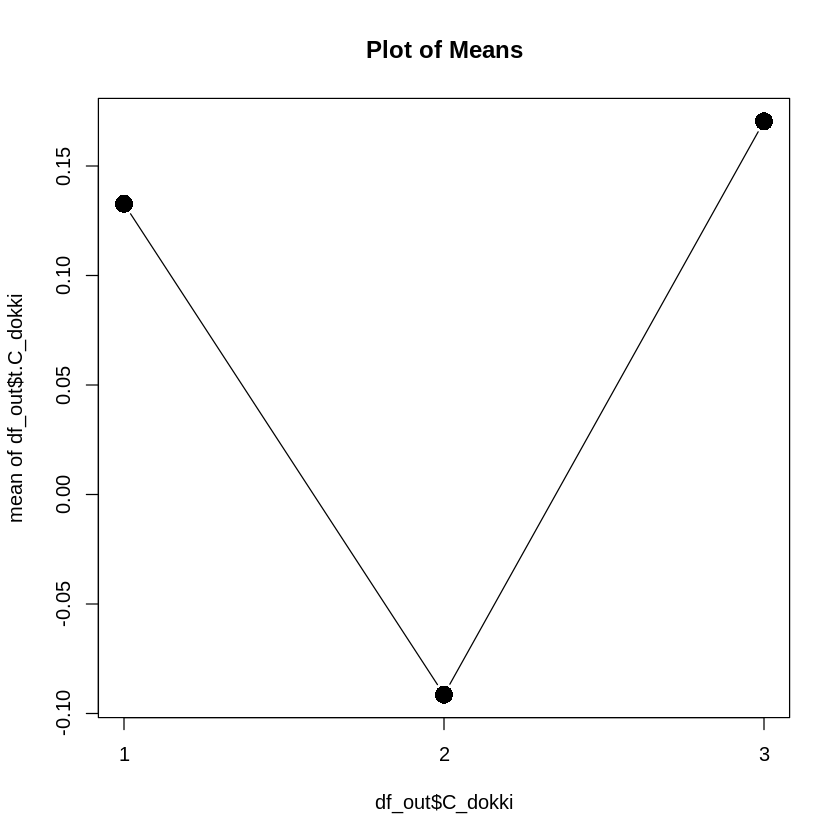

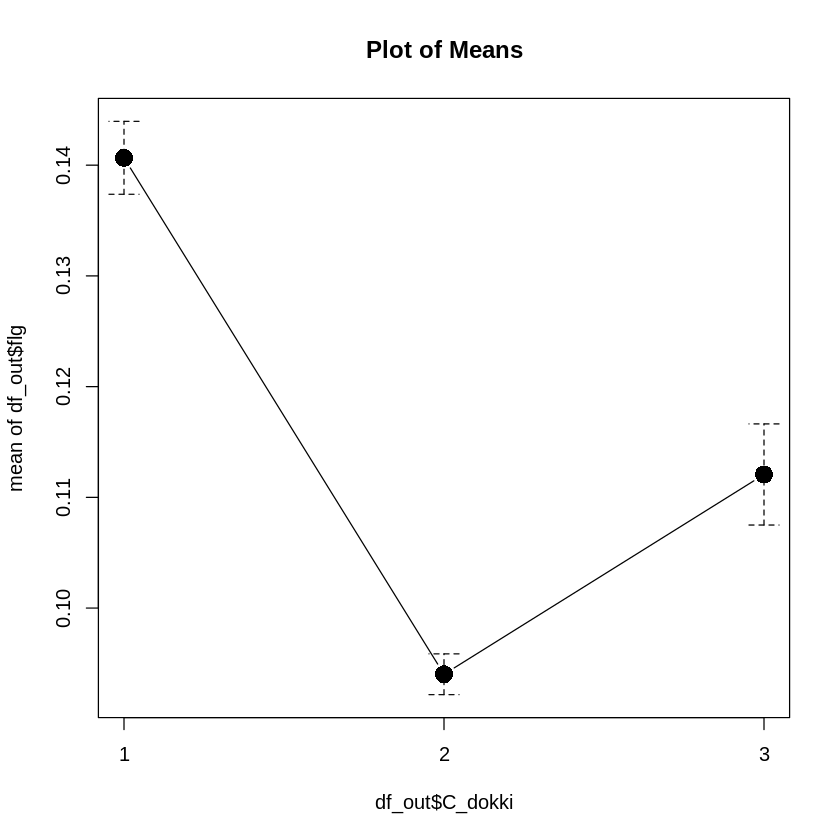

In [ ]:
plotMeans(df_out$t.C_dokki,df_out$C_dokki,error.bars="se")
plotMeans(df_out$flg,df_out$C_dokki,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


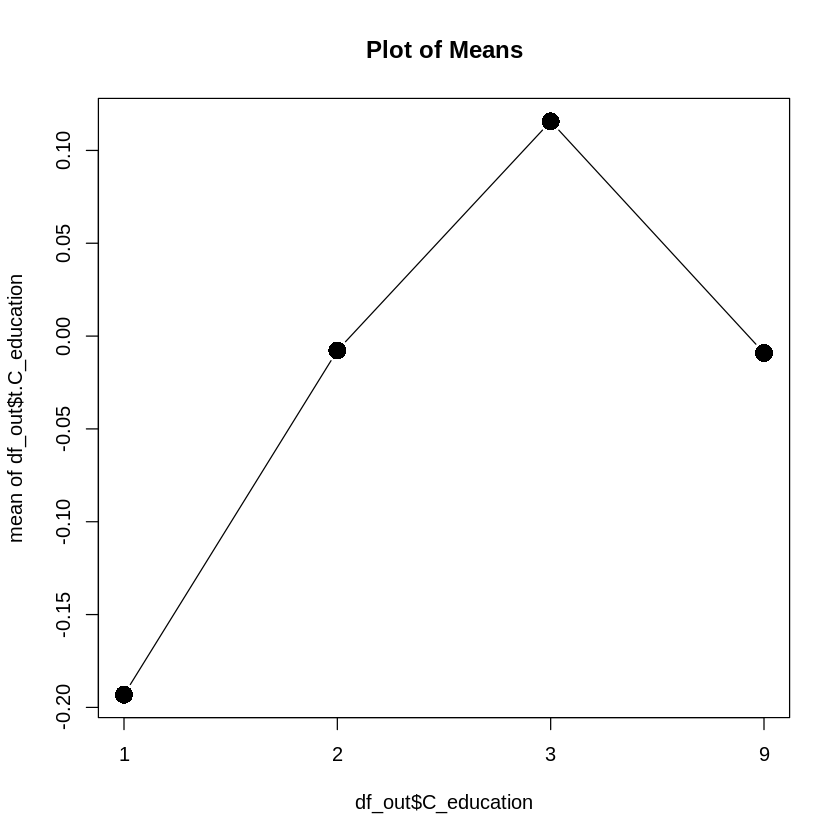

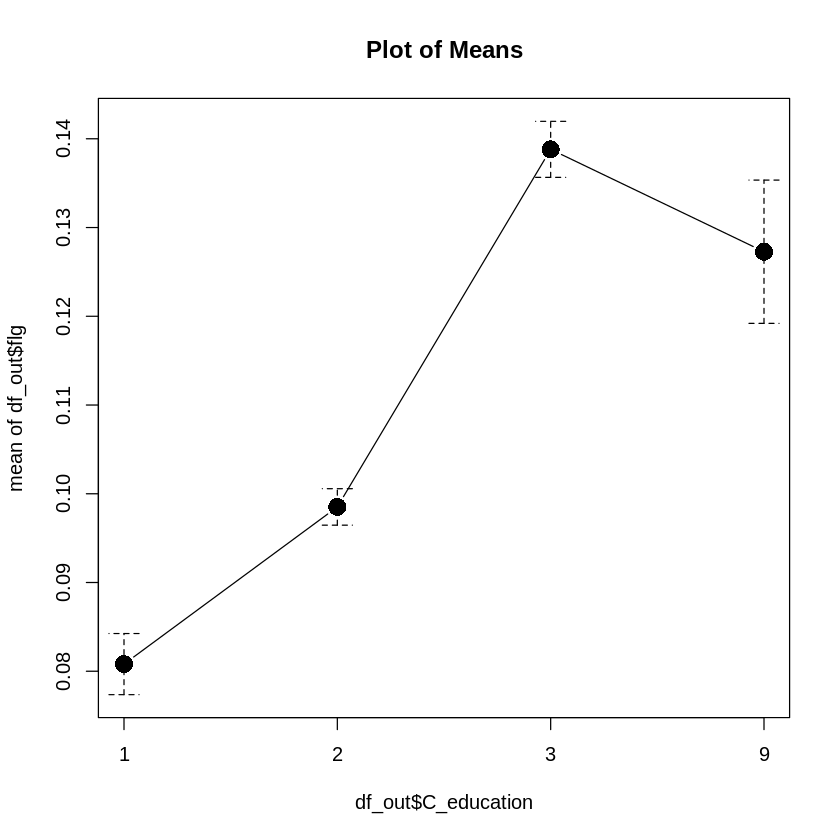

In [ ]:
plotMeans(df_out$t.C_education,df_out$C_education,error.bars="se")
plotMeans(df_out$flg,df_out$C_education,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


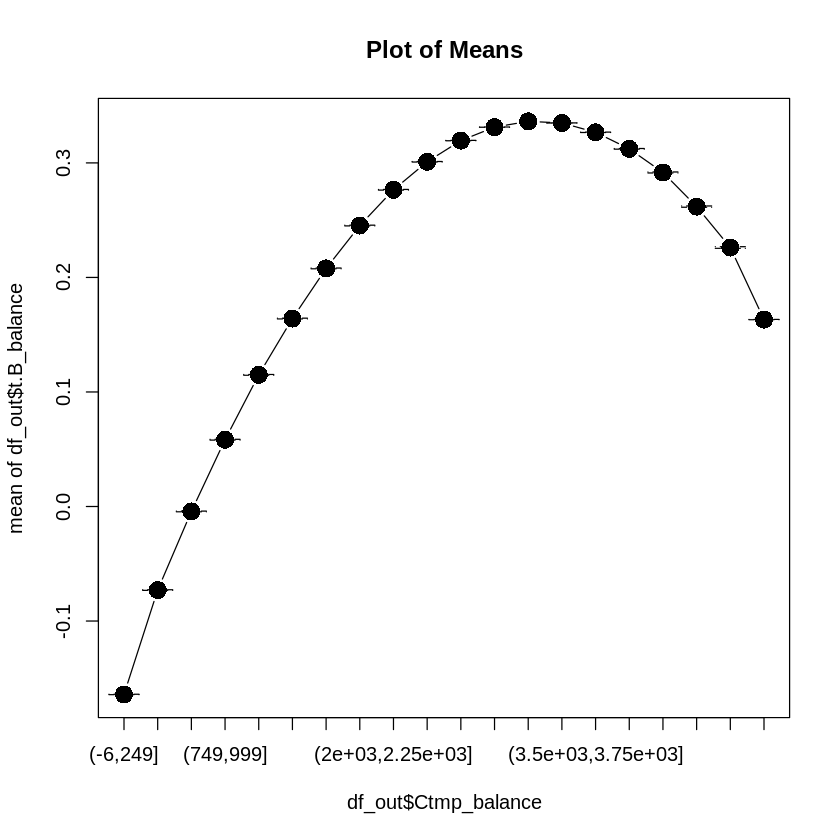

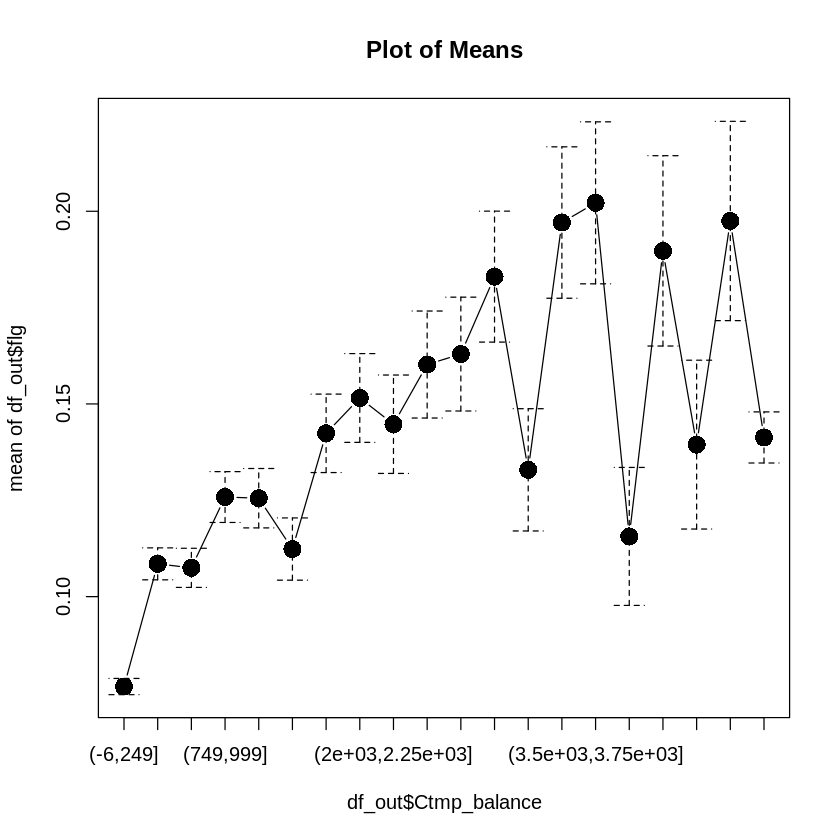

In [ ]:
df_out$Ctmp_balance <- bin.var(df_out$balance_5000,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_balance,df_out$Ctmp_balance,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_balance,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


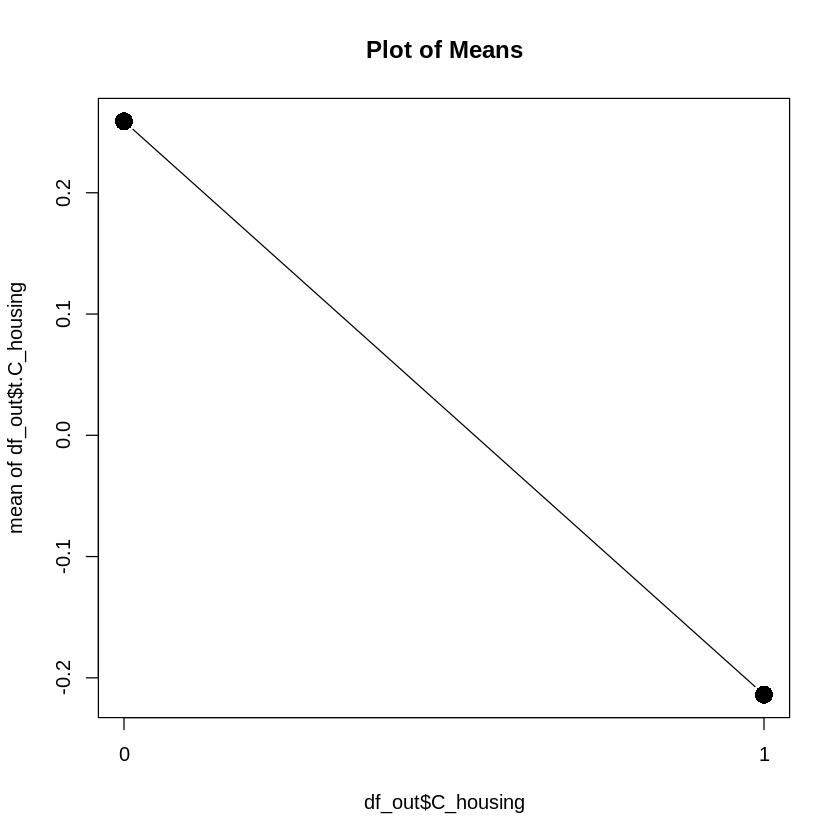

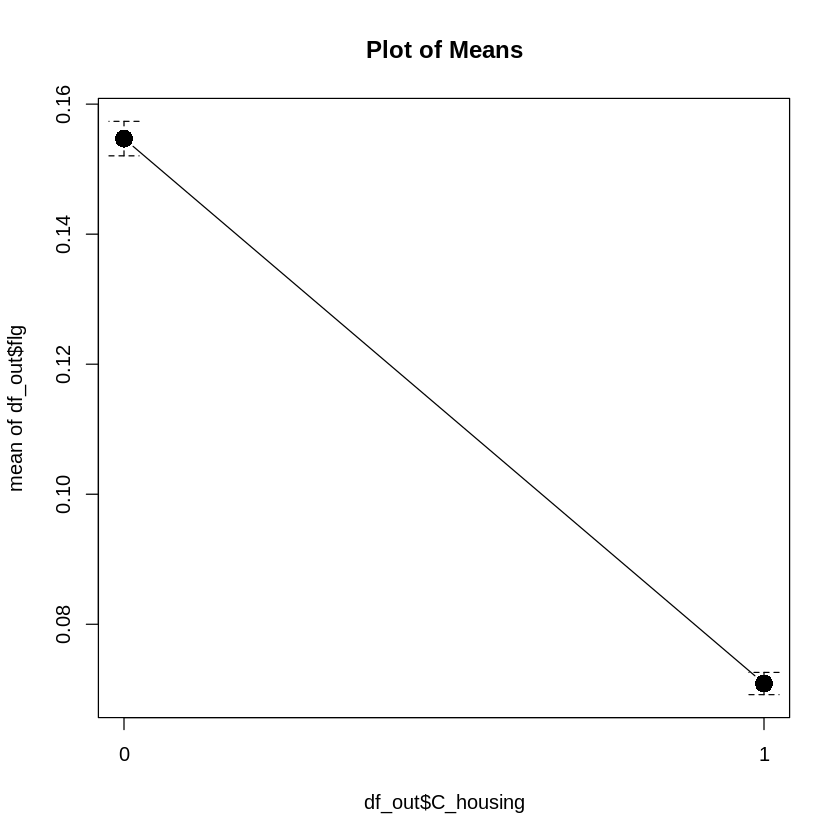

In [ ]:
plotMeans(df_out$t.C_housing,df_out$C_housing,error.bars="se")
plotMeans(df_out$flg,df_out$C_housing,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


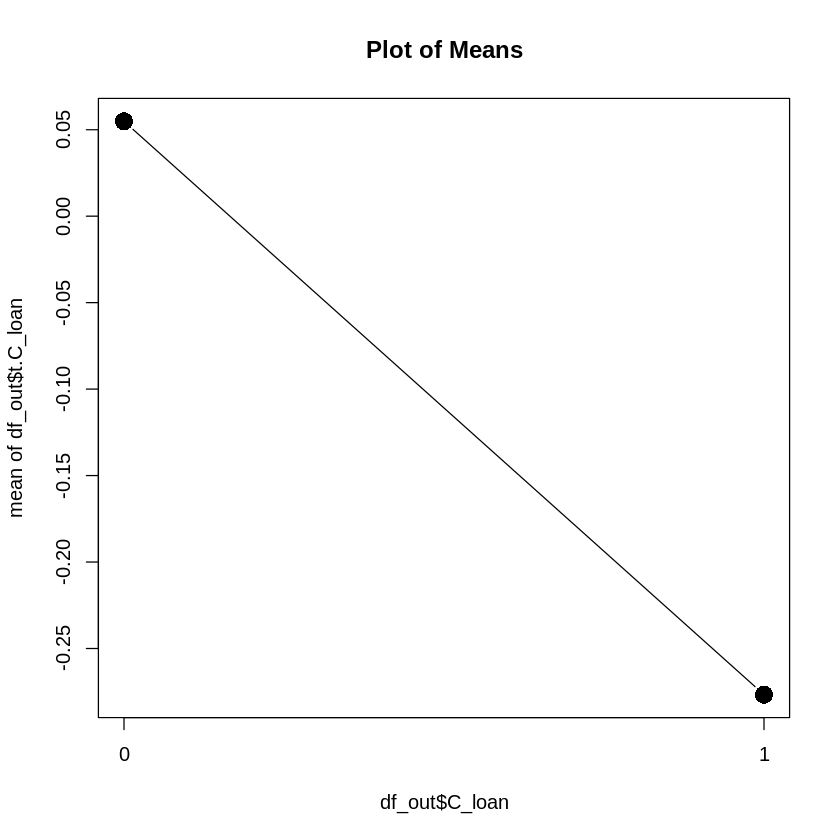

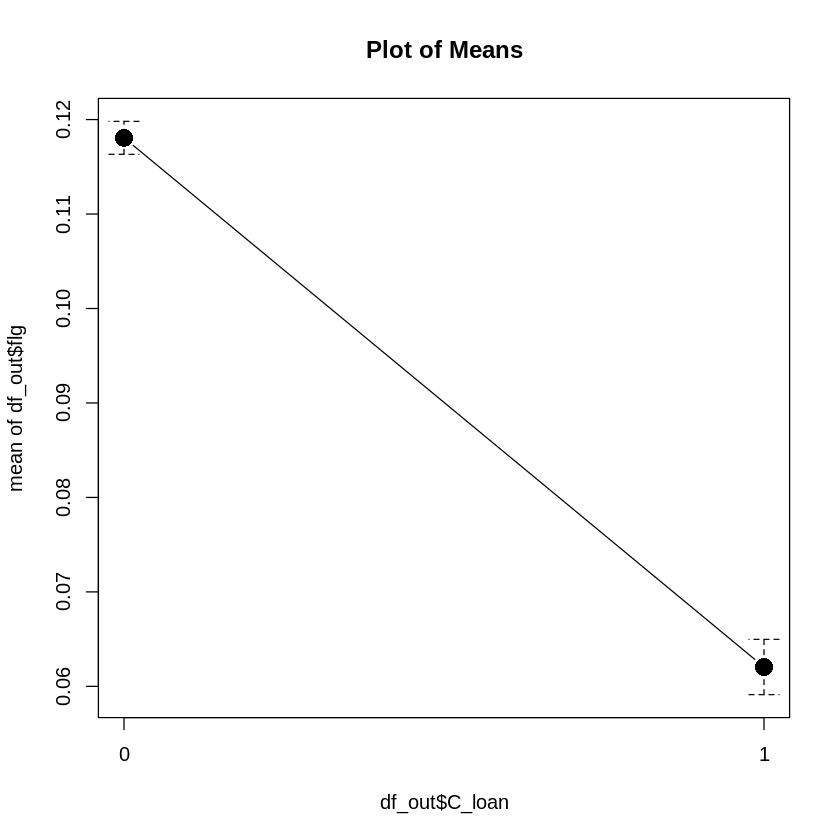

In [ ]:
plotMeans(df_out$t.C_loan,df_out$C_loan,error.bars="se")
plotMeans(df_out$flg,df_out$C_loan,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


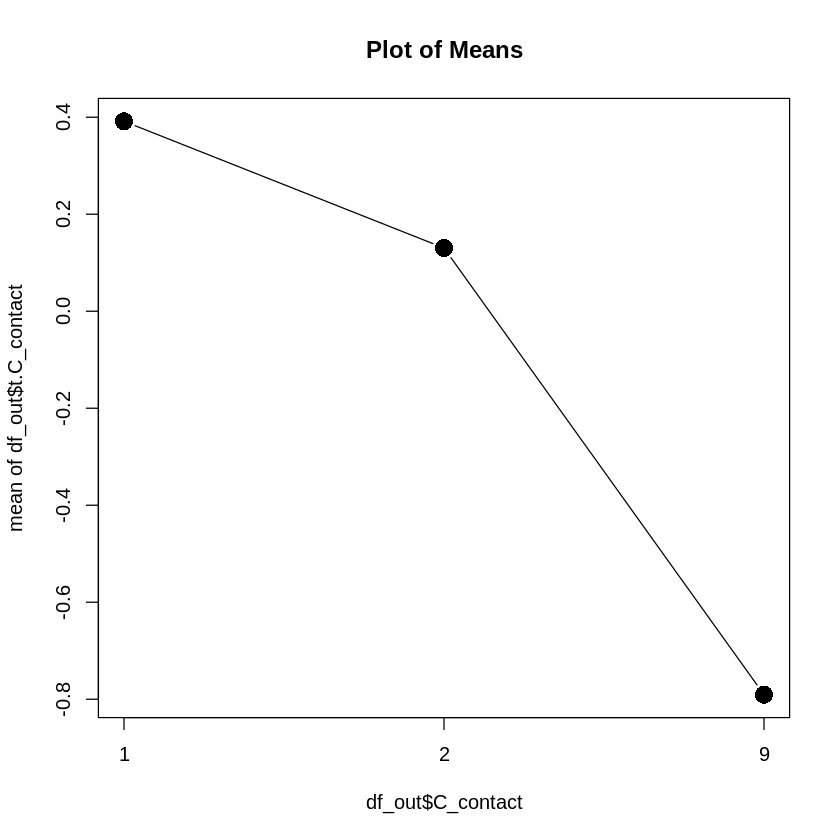

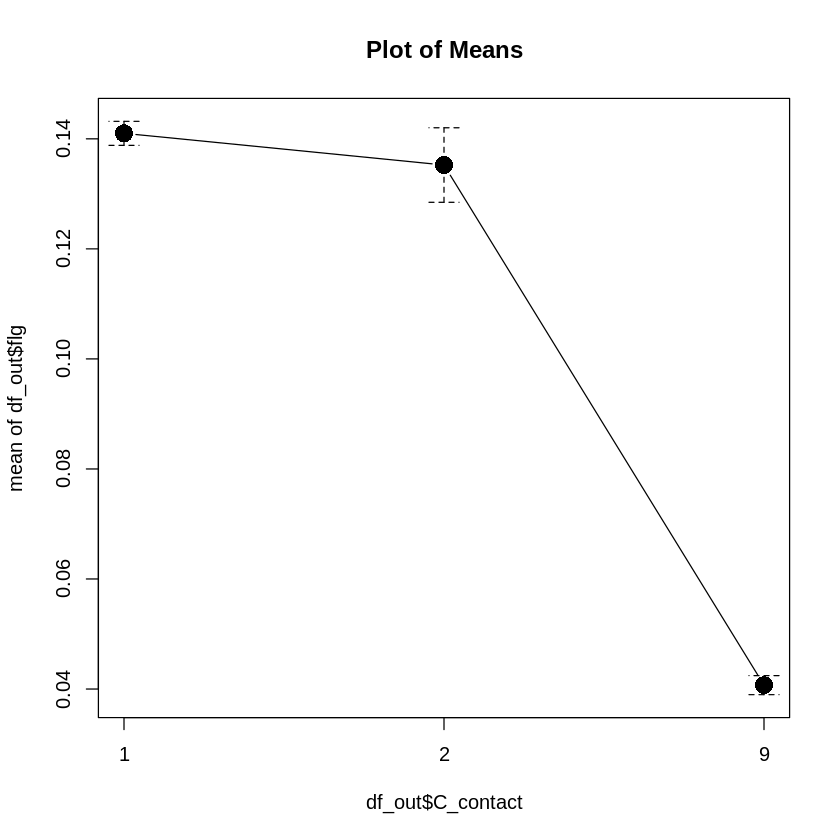

In [ ]:
plotMeans(df_out$t.C_contact,df_out$C_contact,error.bars="se")
plotMeans(df_out$flg,df_out$C_contact,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

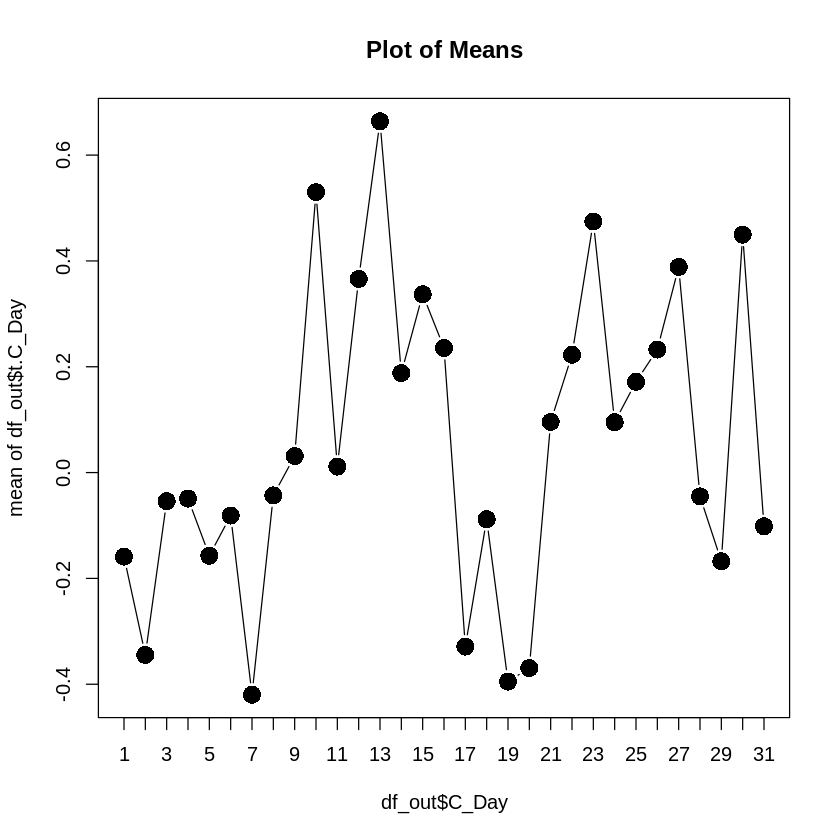

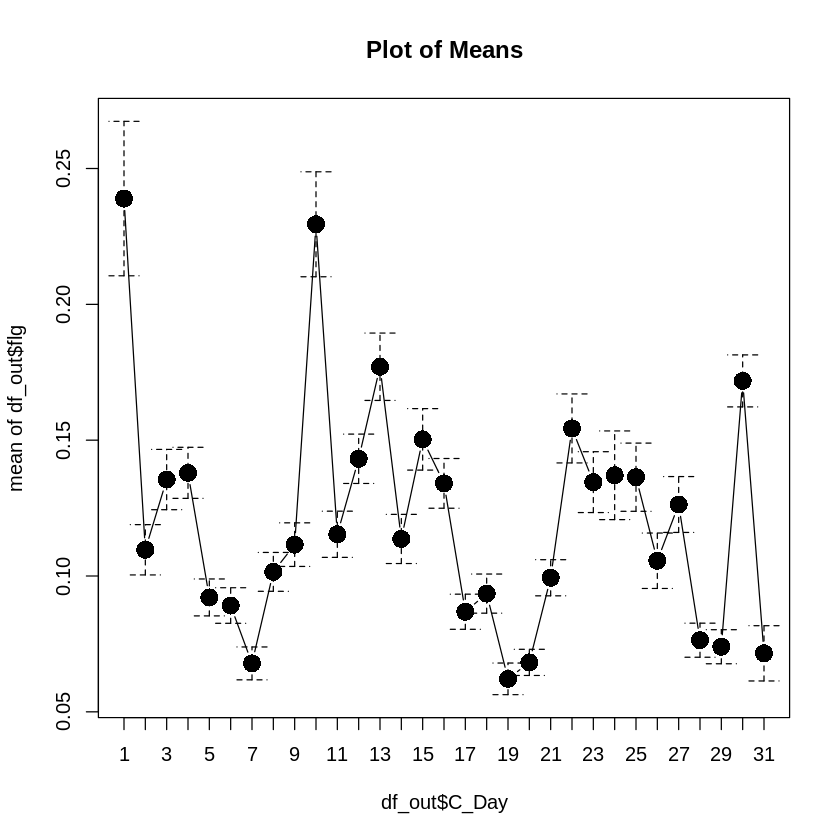

In [ ]:
plotMeans(df_out$t.C_Day,df_out$C_Day,error.bars="se")
plotMeans(df_out$flg,df_out$C_Day,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

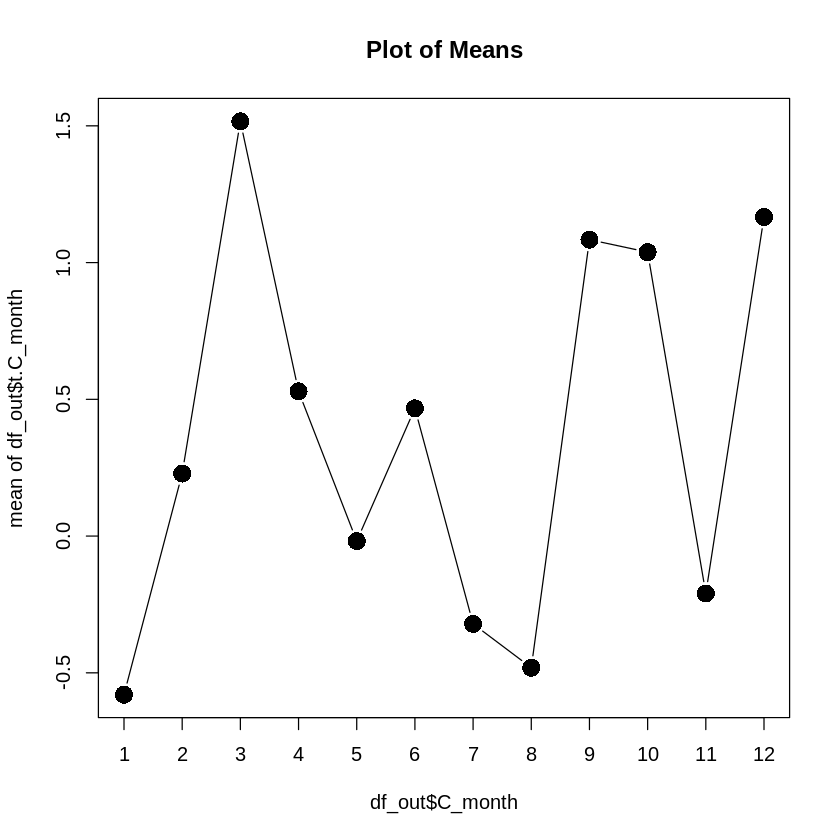

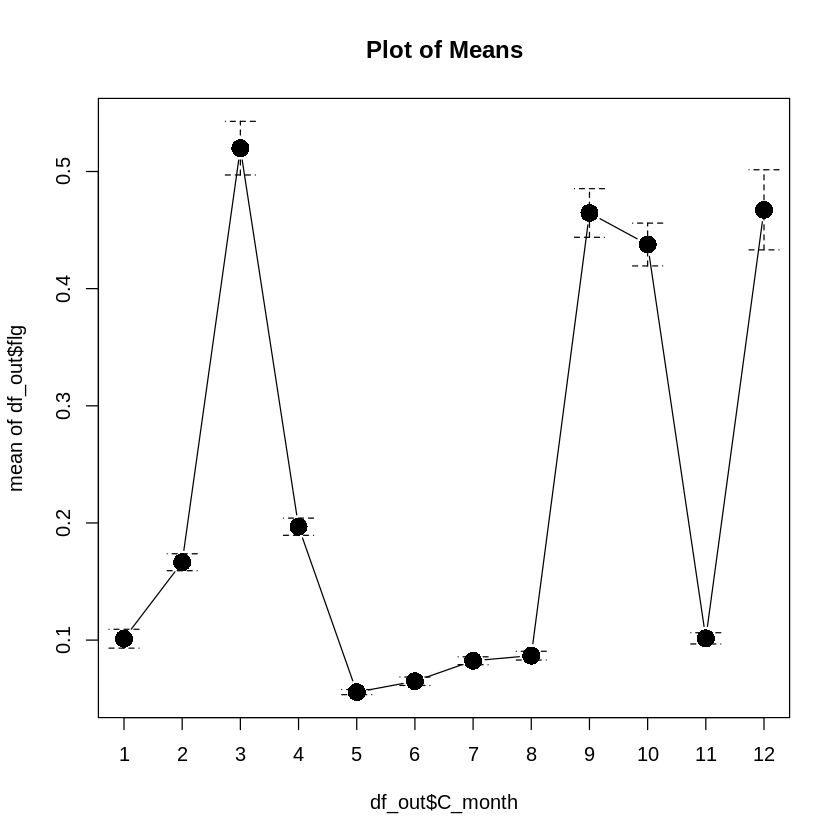

In [ ]:
plotMeans(df_out$t.C_month,df_out$C_month,error.bars="se")
plotMeans(df_out$flg,df_out$C_month,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

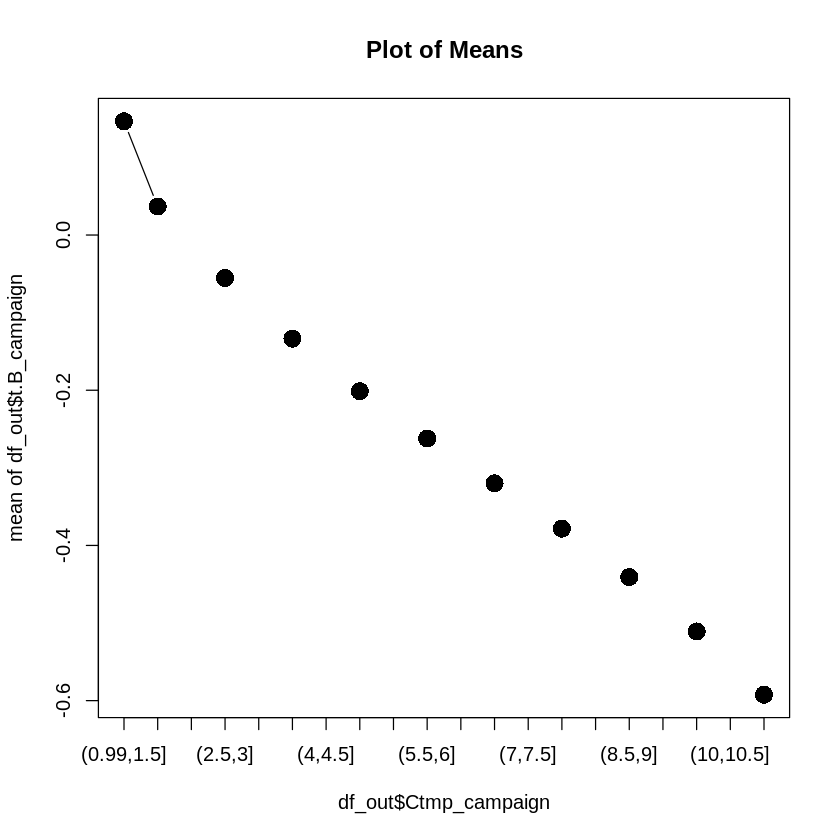

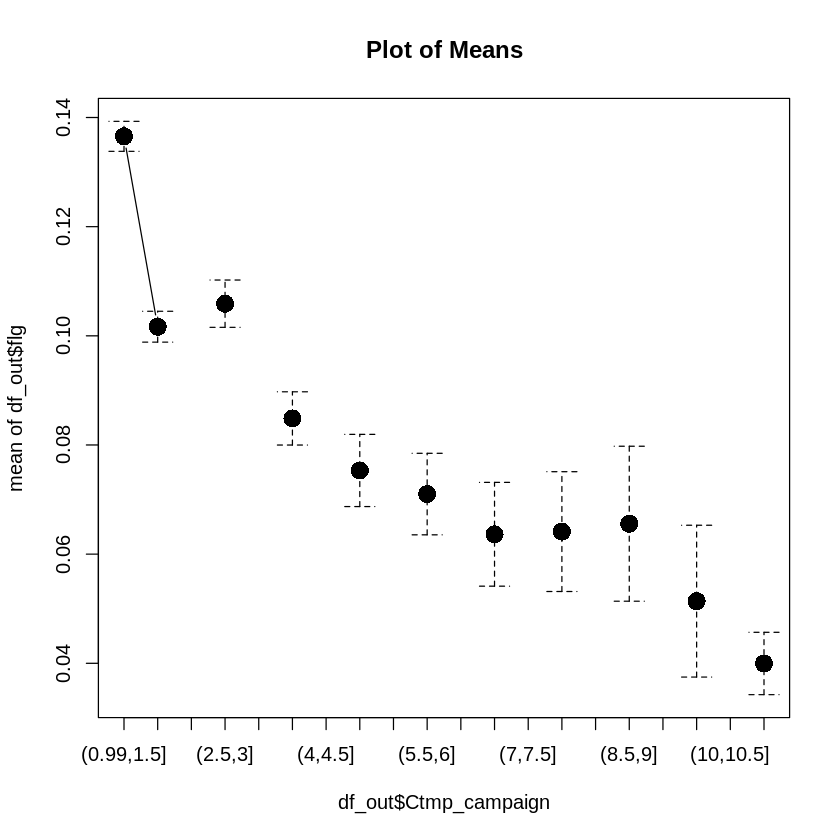

In [ ]:
df_out$Ctmp_campaign <- bin.var(df_out$campaign_11,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_campaign,df_out$Ctmp_campaign,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_campaign,error.bars="se")

Warning message in arrows(1:n.levs.1, means[, i] - sds[, i], 1:n.levs.1, means[, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs.1, means[, i] - sds[, i], 1:n.levs.1, means[, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs.1, means[, i] - sds[, i], 1:n.levs.1, means[, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs.1, means[, i] - sds[, i], 1:n.levs.1, means[, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs.1, means[, i] - sds[, i], 1:n.levs.1, means[, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs.1, means[, i] - sds[, i], 1:n.levs.1, means[, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs.1, means[, i] - sds[, i], 1:n.levs.1, means[, :
“zero-length arrow is of indeterminate angle and so s

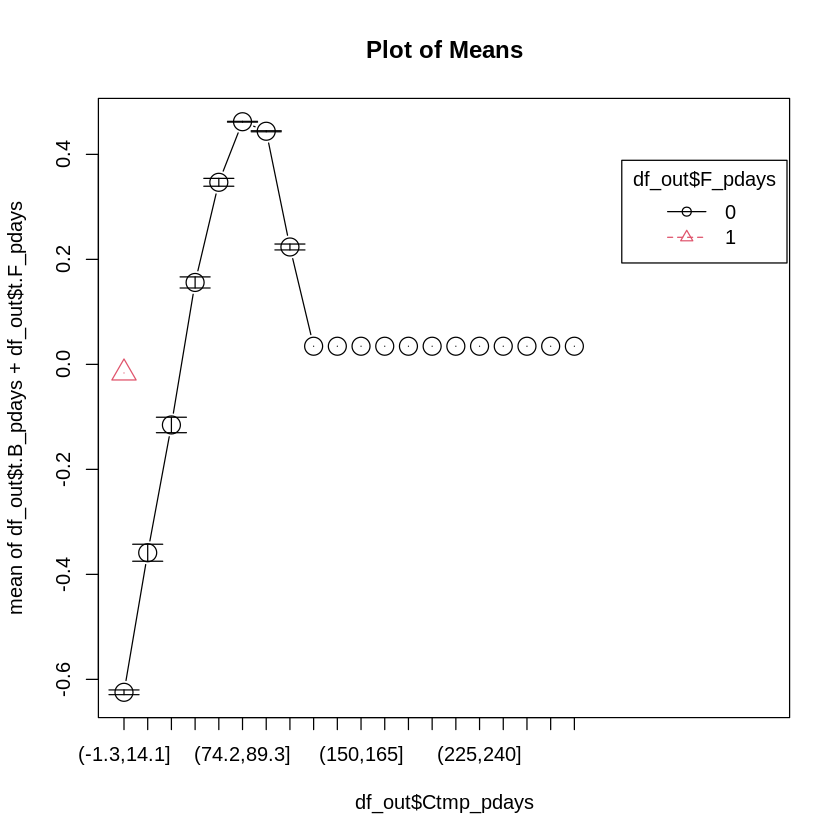

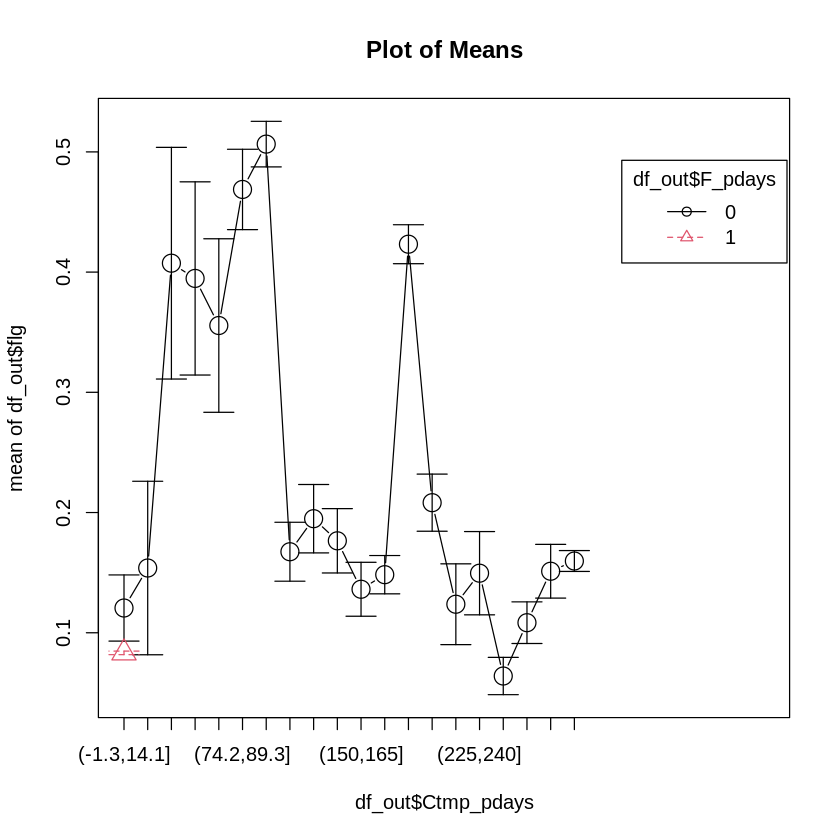

In [ ]:
df_out$Ctmp_pdays <- bin.var(df_out$pdays_300,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_pdays + df_out$t.F_pdays,df_out$Ctmp_pdays,df_out$F_pdays,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_pdays,df_out$F_pdays,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

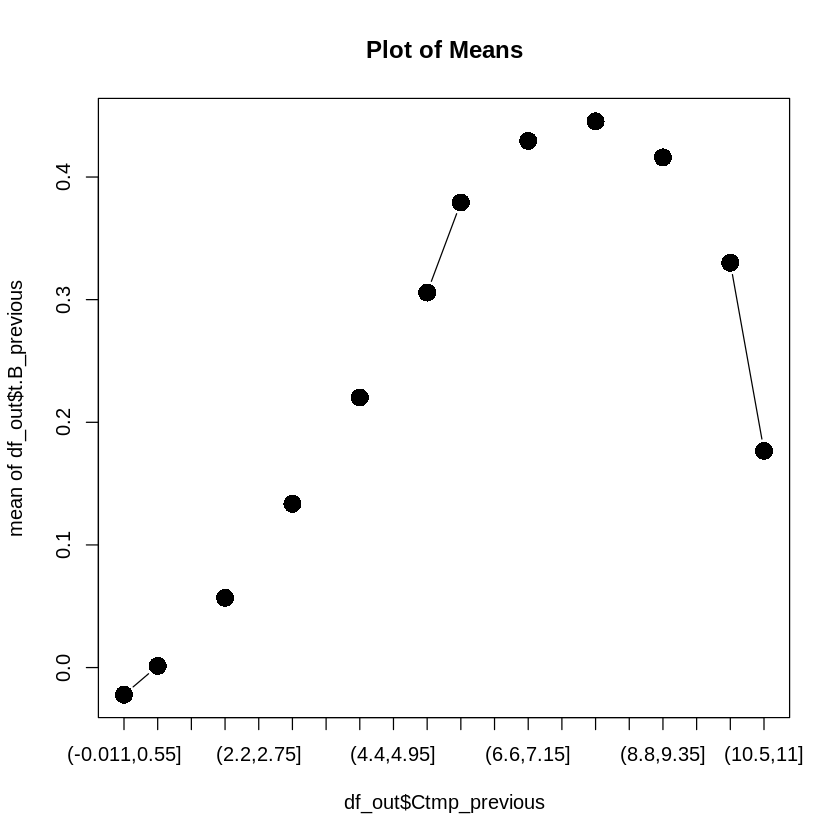

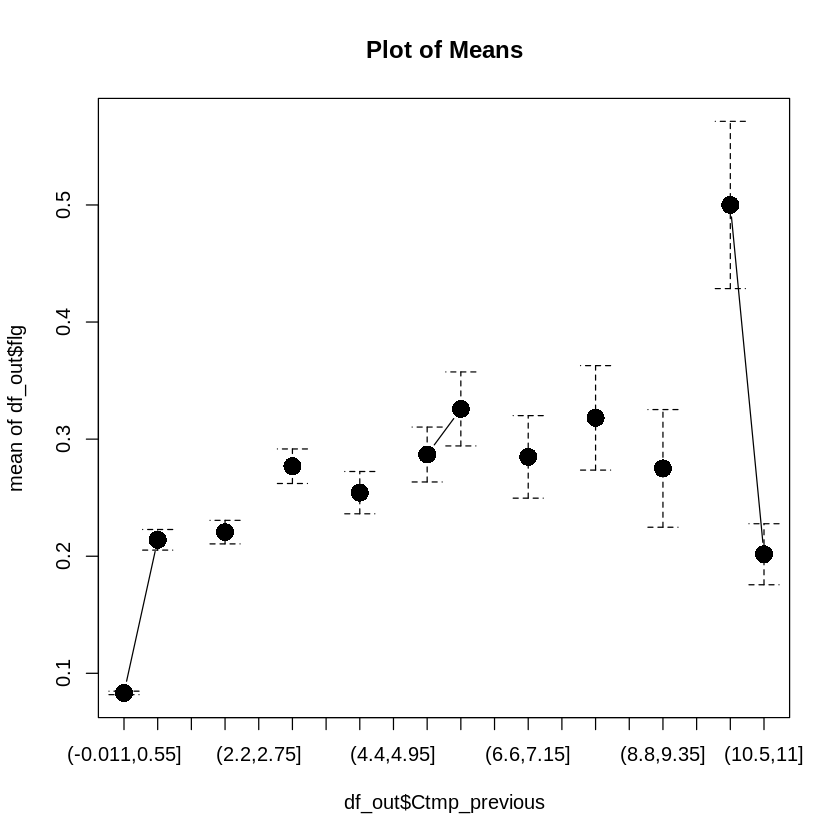

In [ ]:
df_out$Ctmp_previous <- bin.var(df_out$previous_11,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_previous,df_out$Ctmp_previous,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_previous,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


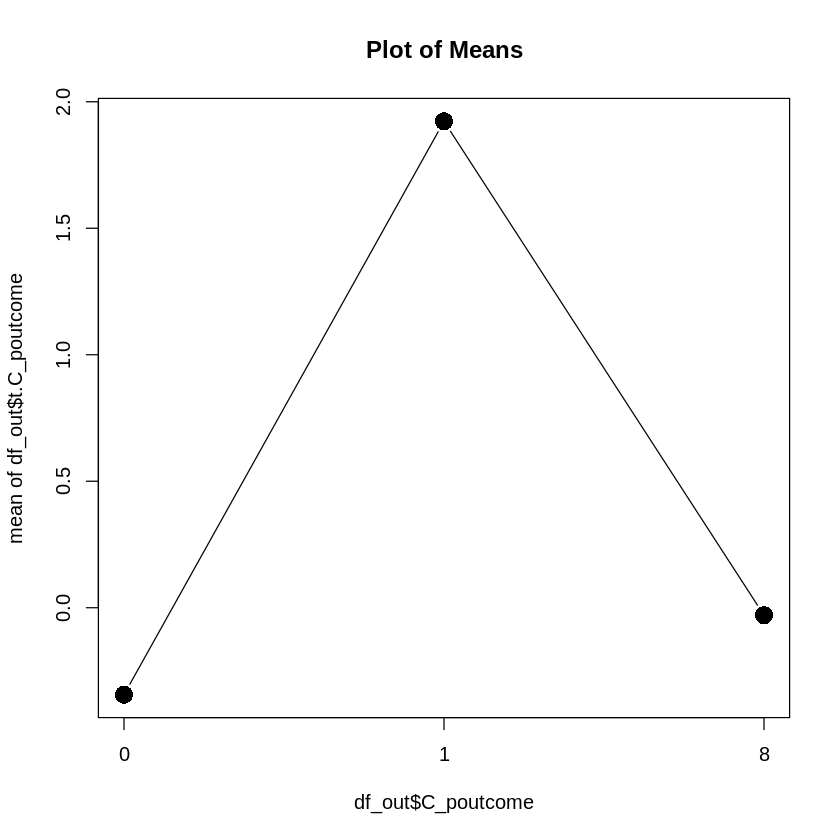

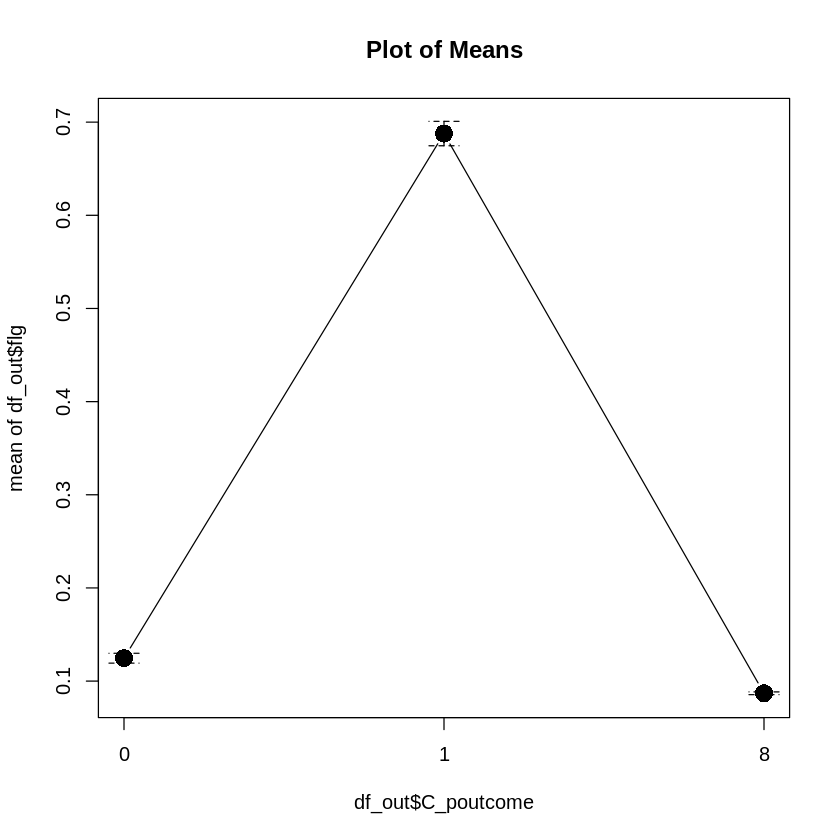

In [ ]:
plotMeans(df_out$t.C_poutcome,df_out$C_poutcome,error.bars="se")
plotMeans(df_out$flg,df_out$C_poutcome,error.bars="se")

# ３．モデル作成３回目

「C_Day」「C_month」いる？  
→　削除してモデル作成

→　モデル２回目より説目力下がる  
  
説明力  
AR　　　CAP20　　CAP30　　CAP70

51.68　　 53.77　　 63.96　　 89.33  

2回目モデルより説明力落ちる






In [ ]:
mbs <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
          #  C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
          #  C_Day +
          #  C_month +
            B_campaign +
            B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

In [ ]:

llrt <- function(mfull,m){
  loglik_full <- sum(mfull$y * log(mfull$fitted.values) + (1 - mfull$y) * log(1-mfull$fitted.values))
  logLik_dvar <- sum(m$y * log(m$fitted.values) + (1 - m$y) * log(1-m$fitted.values))
  chisq <- -2 * (logLik_dvar  - loglik_full)
  df <- summary(mfull)$df[1] - summary(m)$df[1]
  p <- 1- pchisq(chisq,df)
  round(c(chisq , df ,p ),3)
  }

  mbs_pdays <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
           # C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
          #  C_Day +
          #  C_month +
            B_campaign +
           # B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

llrt(mbs,mbs_pdays)

[1] 41.322  4.000  0.000

In [ ]:
Anova(mbs)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
B_age,111.652237,3,4.838796e-24
C_job,43.156416,8,8.208123e-07
C_dokki,41.583886,2,9.336279e-10
C_education,20.916314,3,1.095741e-04
B_balance,145.471523,3,2.497724e-31
C_housing,186.178662,1,2.170152e-42
C_loan,67.822710,1,1.788773e-16
C_contact,339.426715,2,1.969815e-74
B_campaign,143.886466,3,5.487674e-31


In [ ]:
library(ROCR)

df_out <- data.frame(df,p=predict(mbs,type="response"),t=predict(mbs,type="terms"))

d_arcap <- df_out

#目的変数名
targetName <- "flg"
targetPred <- d_arcap[,targetName]

#ソートする変数、予測確率、GNO、CR
sortName <- "p"
sortPred <- d_arcap[,sortName]

#ARの計算
pred <- prediction(sortPred,targetPred)
AUC <- as.numeric( performance(pred,"auc")@y.values )
AR <- 2 *(AUC-0.5) * 100 #AR値

#CAP値の計算
#予測確率（GNO、CR）を照準に件数等分１０分類
d_arcap$CP10 <- bin.var( sortPred, bins=10, method='proportions',labels =FALSE)

#区分別のデフォルト件数
dcount <- tapply(targetPred,list(CP10=d_arcap$CP10),sum,na.rm=TRUE)

#CAP20値
CAP20 <- sum(dcount[9:10]) / sum(dcount) * 100

#CAP30値
CAP30 <- sum(dcount[8:10]) / sum(dcount) * 100

#CAP70値
CAP70 <- sum(dcount[4:10]) / sum(dcount) * 100

#結果
round(c(AR,CAP20,CAP30,CAP70),2)

[1] 51.70 53.88 64.21 89.33

# ４．モデル作成４回目


「C_Day」「C_month」削除ではなく、
違う投入方法検討  
  
説明力  
AR　　　CAP20　　CAP30　　CAP70

53.44 　　55.63　　 65.17 　　89.67






# ５．モデル作成5回目


グラフ確認後微調整  
スコアと実績で動きが違う部分を調整  


*   pdays（最終連絡日からの経過日数）
*   C_poutcome（以前のマーケティングキャンペーンの結果）

説明力  
AR　　　CAP20　　CAP30　　CAP70  
53.45　　 55.65　　 65.40　　 89.60





In [ ]:
# 今までの流れ

df <- read.table("https://raw.githubusercontent.com/f11828my/Internalmeasures/3fbf6d8d67b83df27377c31c27ce80f9ff3e2051/Data_insample.txt",
                  header=TRUE , sep = "," , na.strings = "NA" ,dec=".",strip.white=TRUE)

# カテゴリ変数作成

df$C_dokki <- as.factor(df$C_dokki)
df$C_job <- as.factor(df$C_job)
df$C_education <- as.factor(df$C_education)
df$C_default <- as.factor(df$C_default)
df$C_housing <- as.factor(df$C_housing)
df$C_loan <- as.factor(df$C_loan)
df$C_contact <- as.factor(df$C_contact)
df$C_Day <- as.factor(df$Day)
df$C_month <- as.factor(df$C_month)
df$C_poutcome <- as.factor(df$C_poutcome)

# カテゴリ変数　まとめ
##職業（無職、不明は同カテゴリ
df$C_job <- recode(df$C_job, ' 12=11 ;  4=3 ; 8=3')

#最終連絡月　3・9・12月 / それ以外　の２区分(基礎集計グラフから)
df$C_month_02 <- Recode(df$C_month,'3 = 1 ;9 = 1 ; 12 = 1 ; else=0')

#最終連絡日付　1・10・20・30・31日 / それ以外　の２区分(基礎集計グラフから)
df$C_Day_02 <- Recode(df$C_Day,'1 = 1 ; 10 = 1 ; 20 = 1 ; 30 = 1 ; 31 = 1 ; else=0')



#連続値変数作成

#各変数　上限設定

##年齢
df$age_60 <- pmin(df$age,60)

#＃平均残高
df$balance_5000 <- pmax(df$balance,-1)
df$balance_5000 <- pmin(df$balance_5000,5000)

##現在のマーケティングキャンペーンにおける顧客への連絡回数
df$campaign_11 <- pmin(df$campaign,11)

##以前のマーケティングキャンペーンにおける顧客への最終連絡日からの経過日数
df$F_pdays <- 0
df[df$pdays == -1,]$F_pdays <- 1
df$F_pdays <- as.factor(df$F_pdays)

##以前のマーケティングキャンペーンにおける顧客への連絡回数
df$previous_11 <- pmin(df$previous,11)


#平滑化
library(splines)
i <- 3

B_age <- bs(df$age_60,df=i)
B_balance <- bs(df$balance_5000,df = i)
B_campaign <- bs(df$campaign_11,df = i)
B_previous <- bs(df$previous_11,df = i)

df[,"B_age"] <- B_age
df[,"B_balance"] <- B_balance
df[,"B_campaign"] <- B_campaign
df[,"B_previous"] <- B_previous



In [ ]:
#５回目での変更部分（変数微調整）

##以前のマーケティングキャンペーンにおける顧客への最終連絡日からの経過日数
df$pdays_120 <- pmin(df$pdays,120)

##以前のマーケティングキャンペーンの結果
df$C_poutcome <- recode(df$C_poutcome, ' 9=8')

B_pdays <- bs(df$pdays_120,df = i)

df[,"B_pdays"] <- B_pdays


In [ ]:
mbs <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
          #  C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
            C_Day_02 +
            C_month_02 +
            B_campaign +
            B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

In [ ]:
mbs_pdays <- glm(flg ~
            B_age +
            C_job +
            C_dokki +
            C_education +
           # C_default +
            B_balance +
            C_housing +
            C_loan +
            C_contact +
            C_Day_02 +
            C_month_02 +
            B_campaign +
           # B_pdays + F_pdays +
            B_previous +
            C_poutcome
            , data=df,family=binomial(link=logit))

llrt(mbs,mbs_pdays)

[1] 35.427  4.000  0.000

In [ ]:
Anova(mbs)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
B_age,84.291208,3,3.683763e-18
C_job,28.067776,8,4.615315e-04
C_dokki,42.313054,2,6.483912e-10
C_education,19.168765,3,2.522871e-04
B_balance,124.028947,3,1.046208e-26
C_housing,141.971531,1,9.865209e-33
C_loan,55.213444,1,1.081267e-13
C_contact,311.195510,2,2.659216e-68
C_Day_02,5.317832,1,2.110826e-02


In [ ]:
library(ROCR)

df_out <- data.frame(df,p=predict(mbs,type="response"),t=predict(mbs,type="terms"))

d_arcap <- df_out

#目的変数名
targetName <- "flg"
targetPred <- d_arcap[,targetName]

#ソートする変数、予測確率、GNO、CR
sortName <- "p"
sortPred <- d_arcap[,sortName]

#ARの計算
pred <- prediction(sortPred,targetPred)
AUC <- as.numeric( performance(pred,"auc")@y.values )
AR <- 2 *(AUC-0.5) * 100 #AR値

#CAP値の計算
#予測確率（GNO、CR）を照準に件数等分１０分類
d_arcap$CP10 <- bin.var( sortPred, bins=10, method='proportions',labels =FALSE)

#区分別のデフォルト件数
dcount <- tapply(targetPred,list(CP10=d_arcap$CP10),sum,na.rm=TRUE)

#CAP20値
CAP20 <- sum(dcount[9:10]) / sum(dcount) * 100

#CAP30値
CAP30 <- sum(dcount[8:10]) / sum(dcount) * 100

#CAP70値
CAP70 <- sum(dcount[4:10]) / sum(dcount) * 100

#結果
round(c(AR,CAP20,CAP30,CAP70),2)

[1] 53.45 55.65 65.40 89.60

## ５‐１．グラフ確認


Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


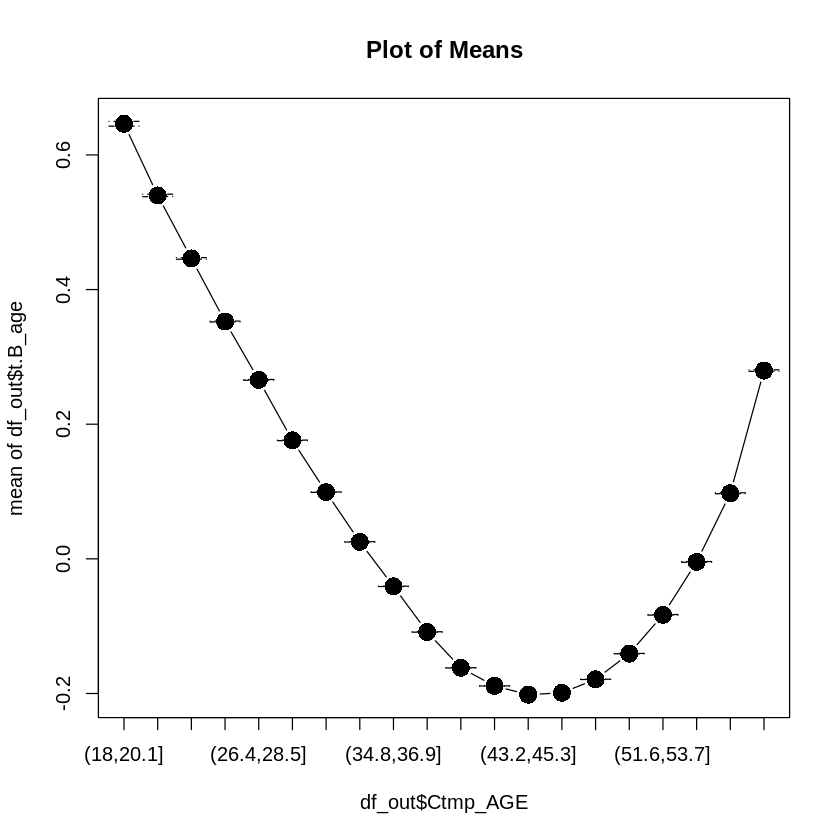

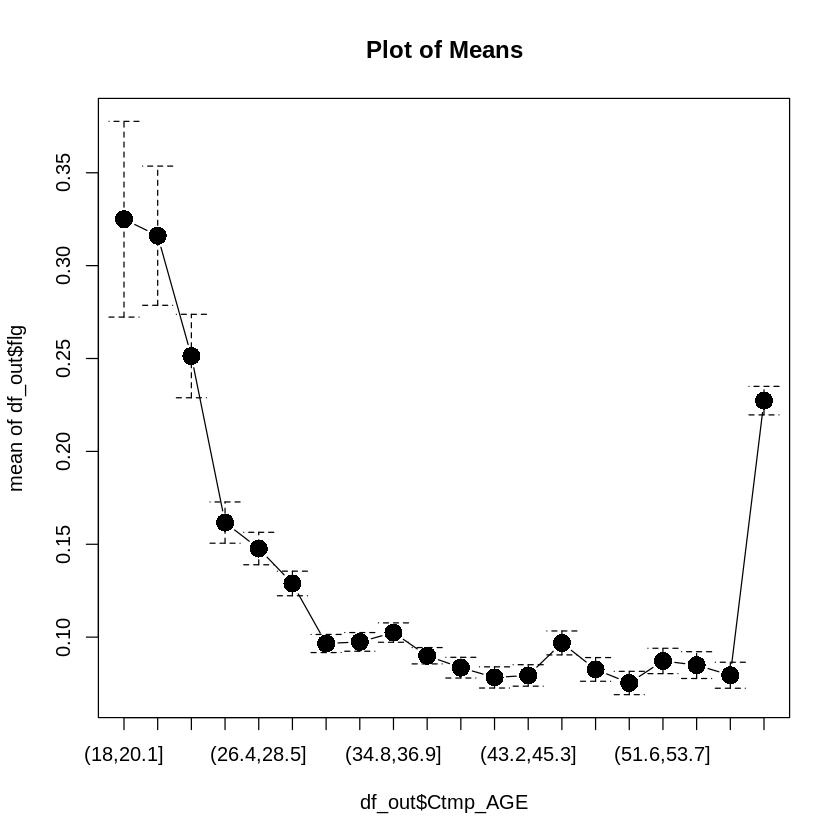

In [ ]:
df_out$Ctmp_AGE <- bin.var(df_out$age_60,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_age,df_out$Ctmp_AGE,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_AGE,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

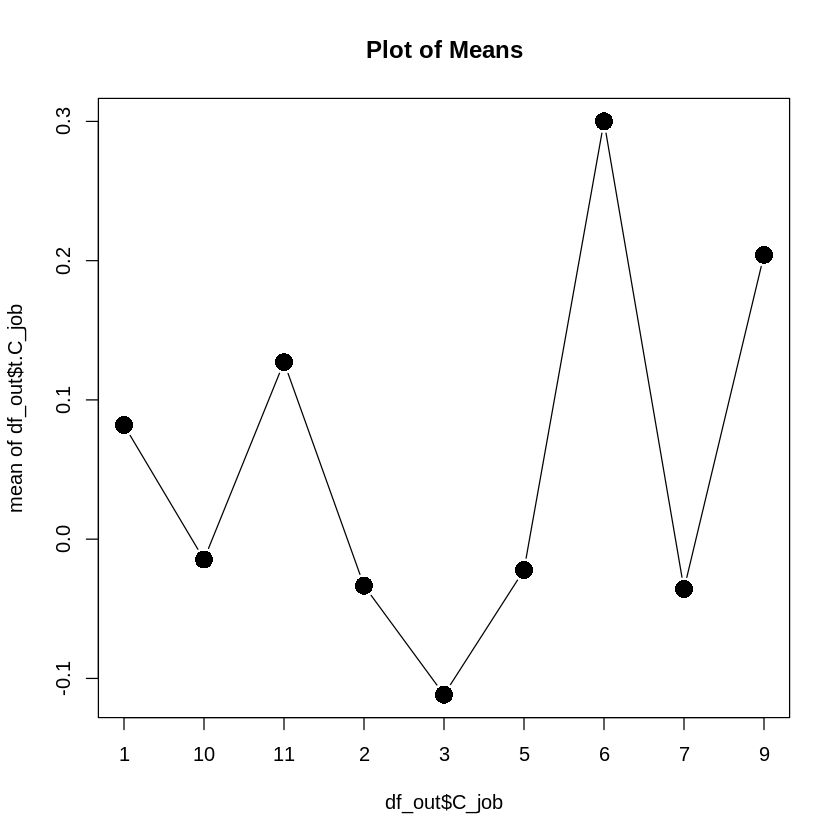

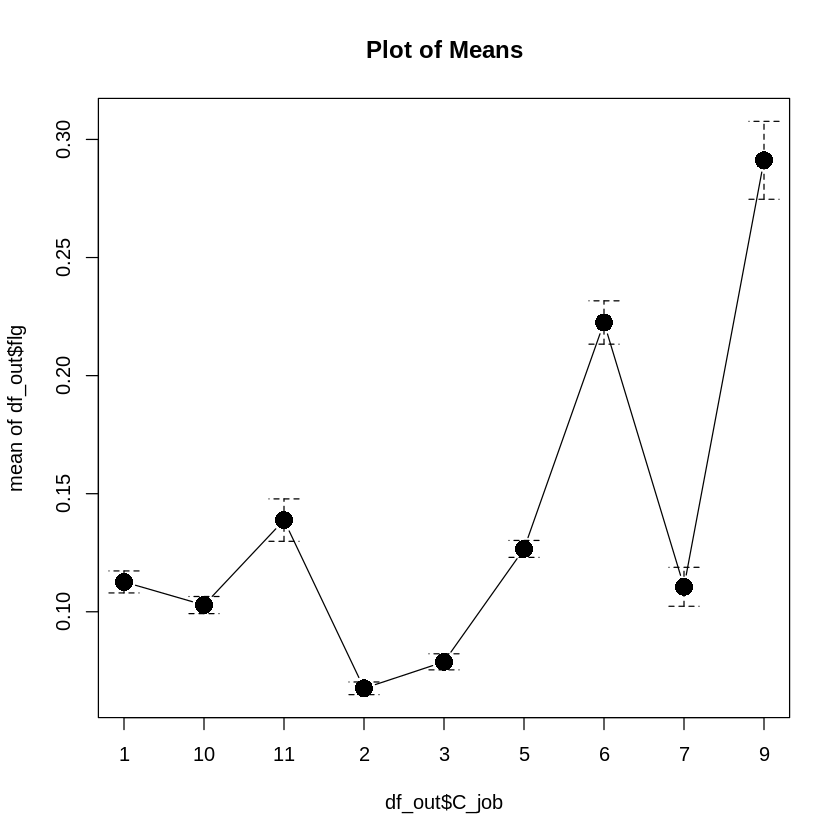

In [ ]:
plotMeans(df_out$t.C_job,df_out$C_job,error.bars="se")
plotMeans(df_out$flg,df_out$C_job,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


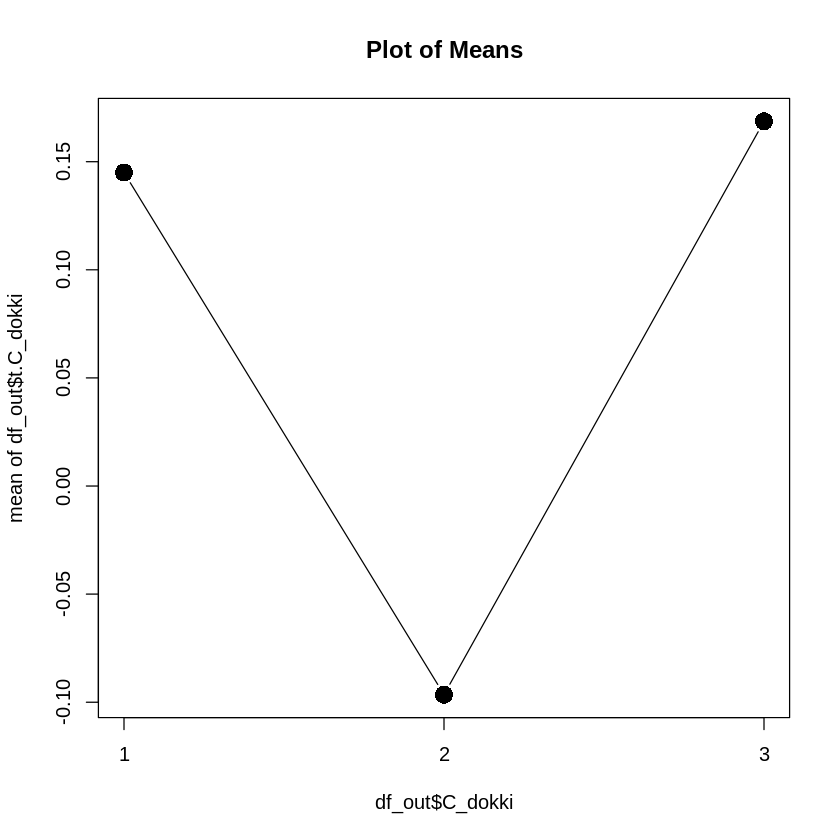

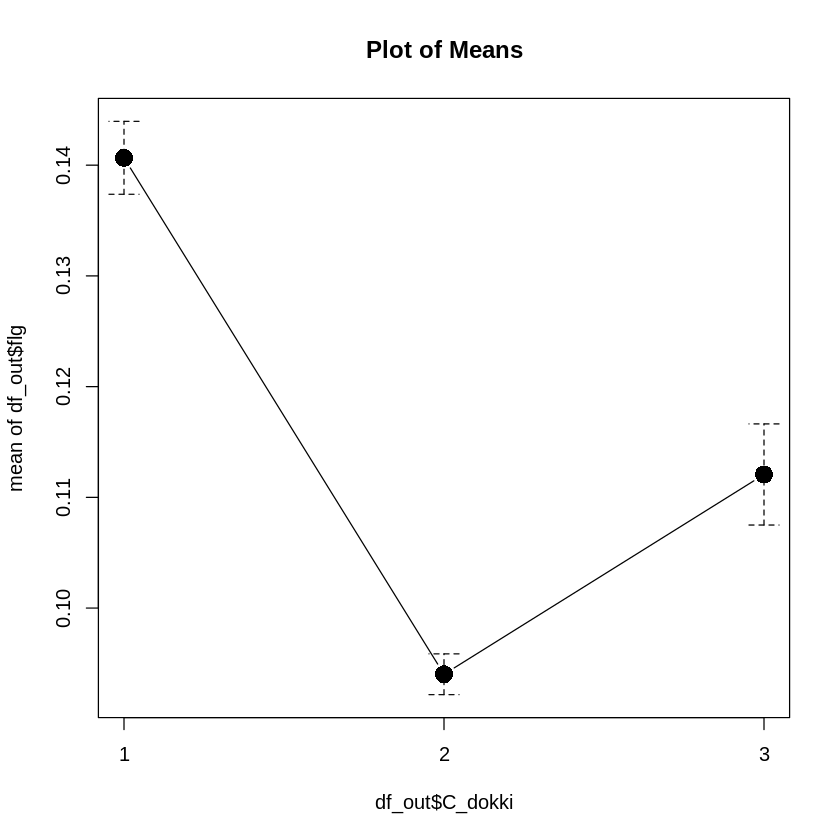

In [ ]:
plotMeans(df_out$t.C_dokki,df_out$C_dokki,error.bars="se")
plotMeans(df_out$flg,df_out$C_dokki,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


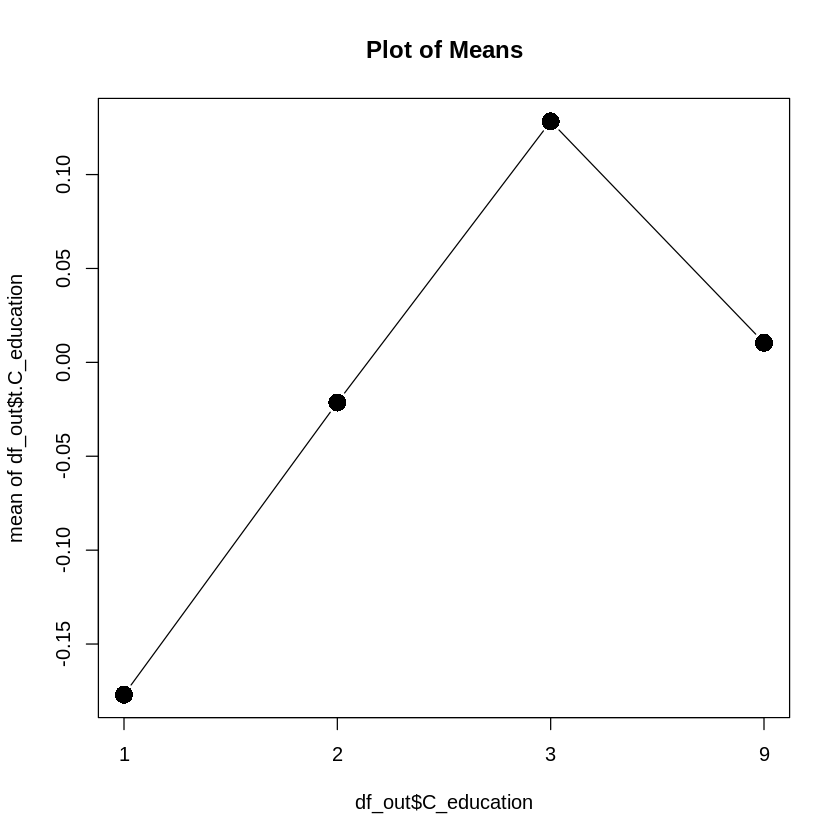

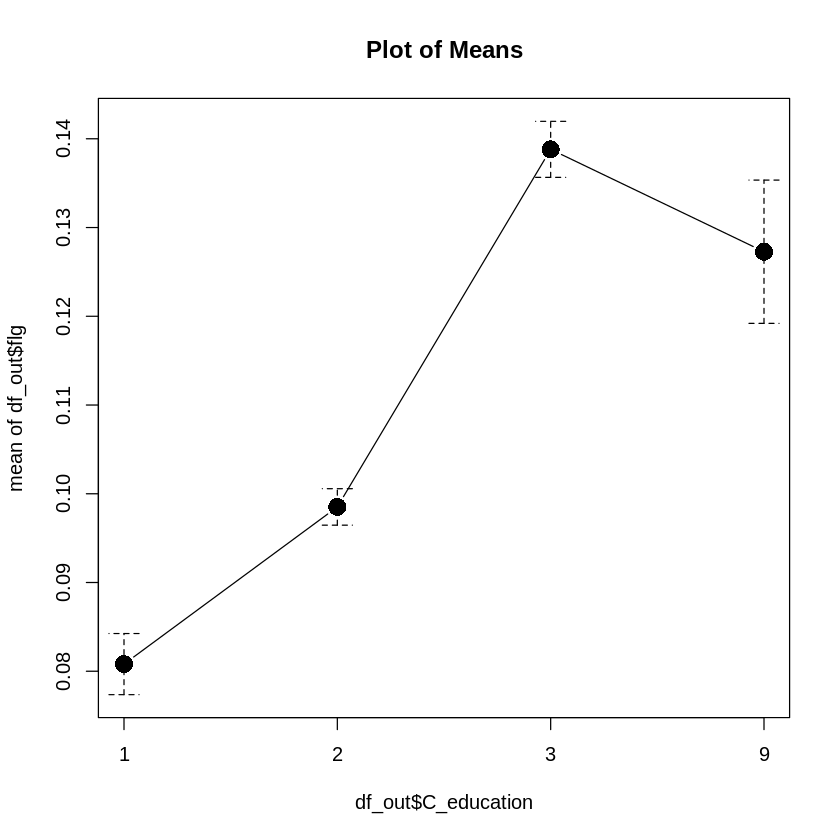

In [ ]:
plotMeans(df_out$t.C_education,df_out$C_education,error.bars="se")
plotMeans(df_out$flg,df_out$C_education,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


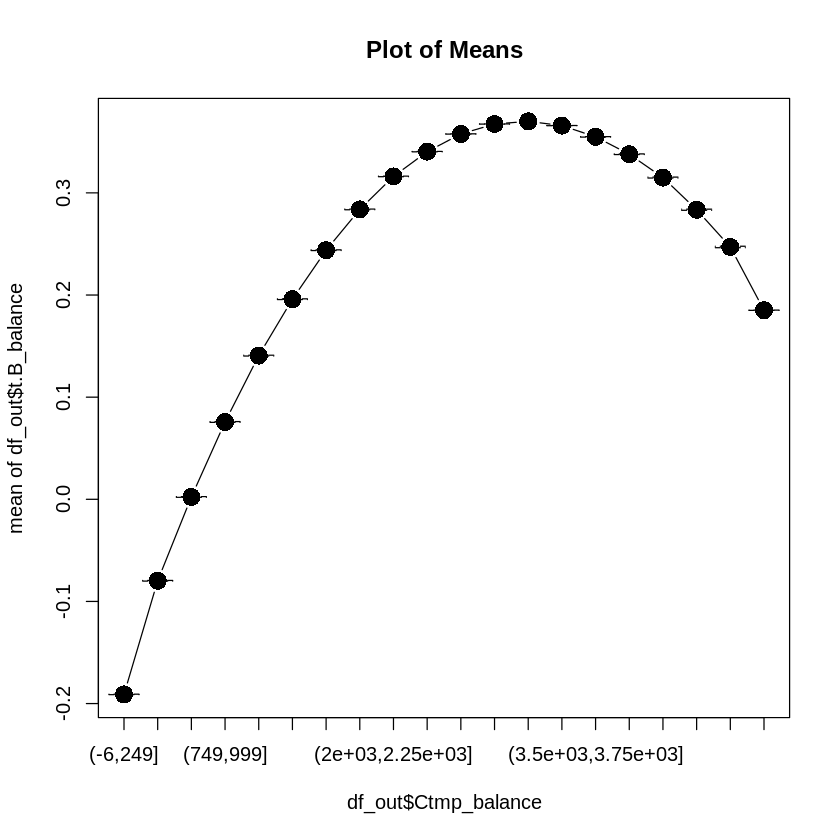

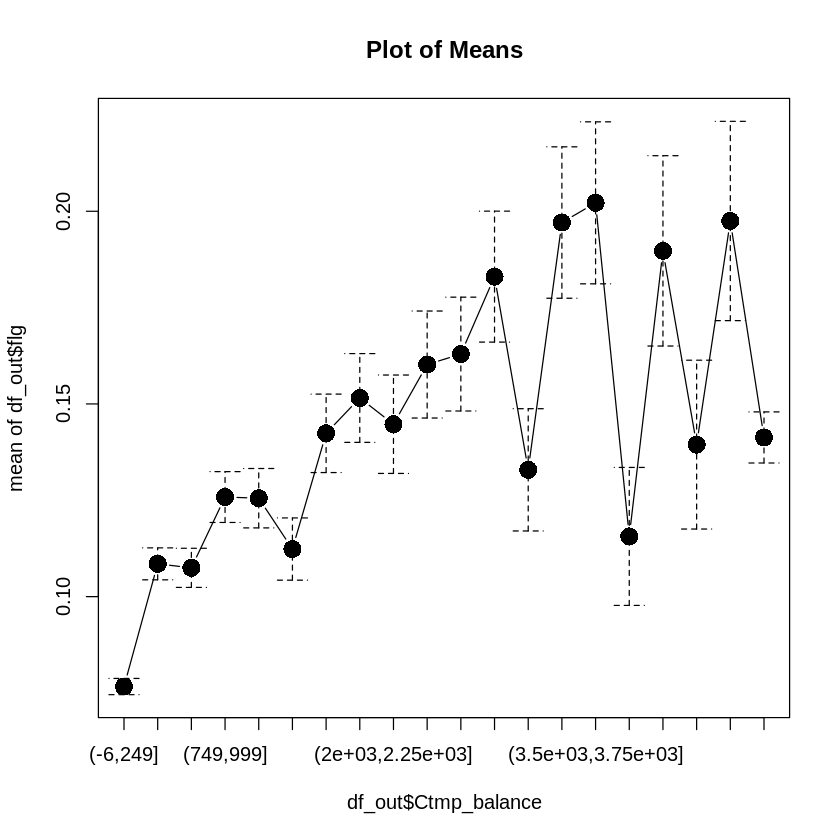

In [ ]:
df_out$Ctmp_balance <- bin.var(df_out$balance_5000,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_balance,df_out$Ctmp_balance,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_balance,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


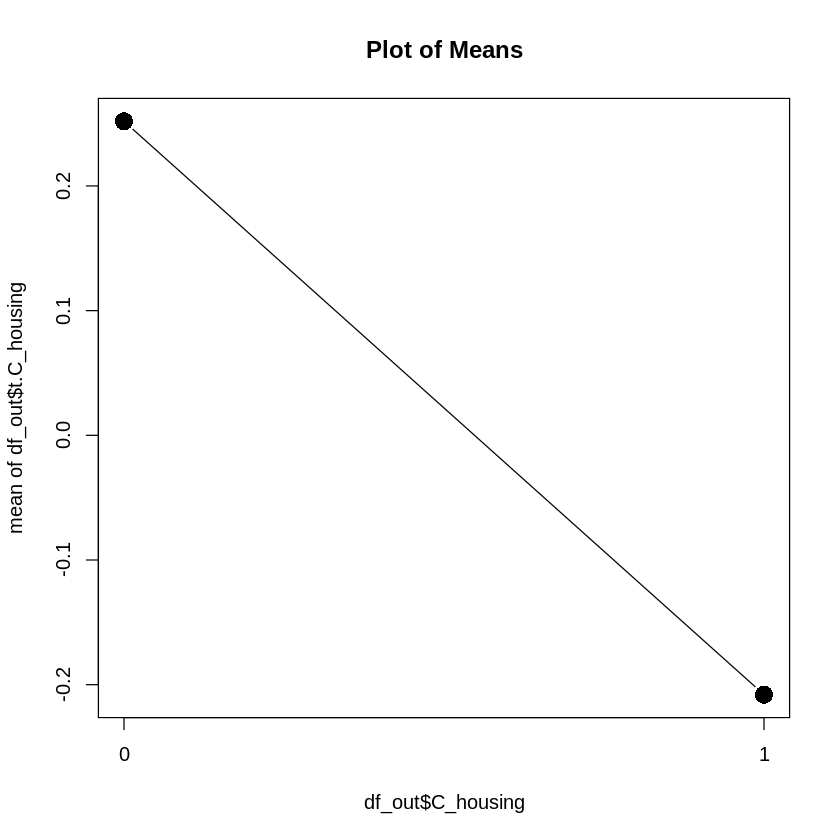

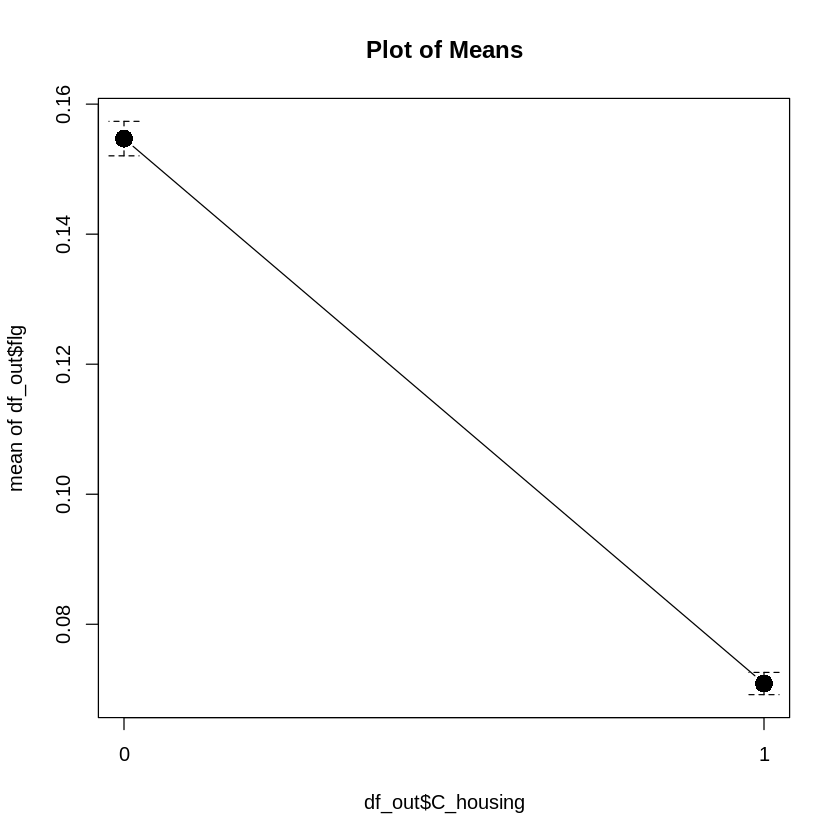

In [ ]:
plotMeans(df_out$t.C_housing,df_out$C_housing,error.bars="se")
plotMeans(df_out$flg,df_out$C_housing,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


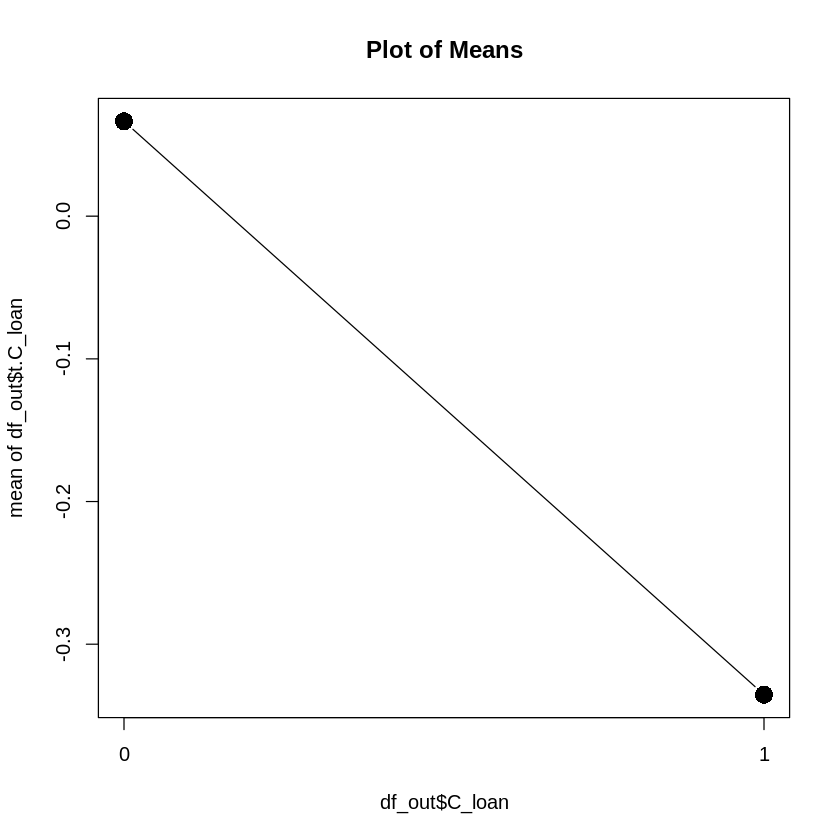

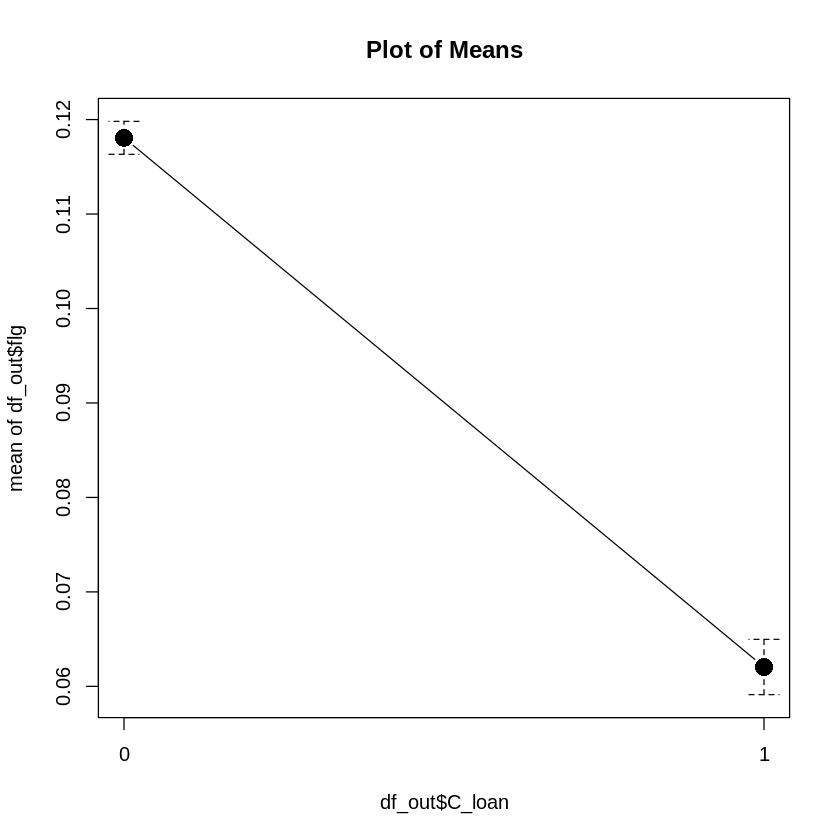

In [ ]:
plotMeans(df_out$t.C_loan,df_out$C_loan,error.bars="se")
plotMeans(df_out$flg,df_out$C_loan,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


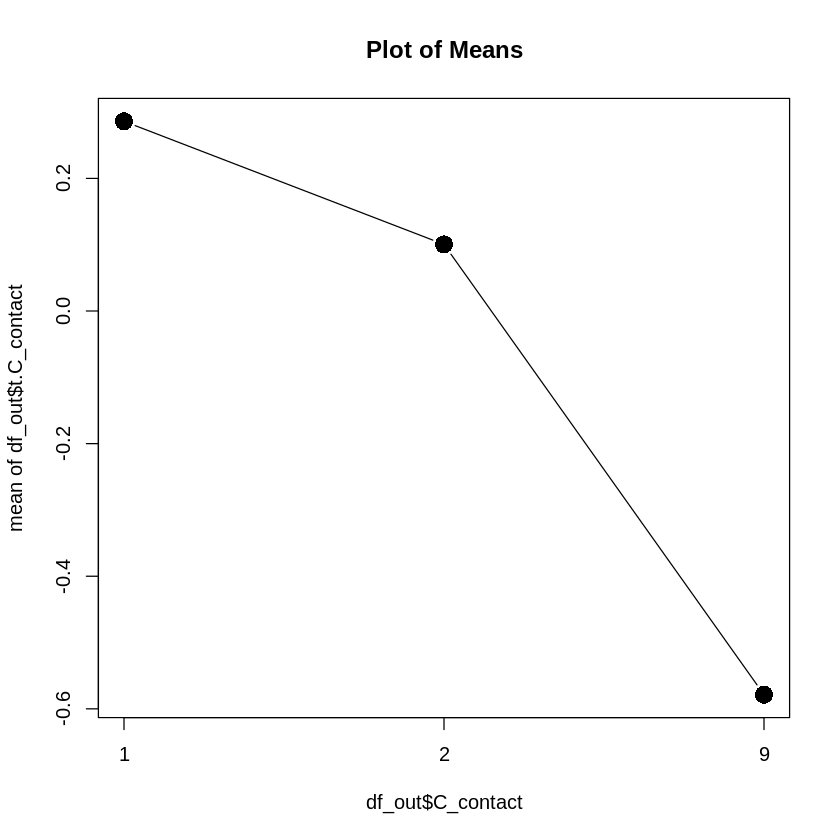

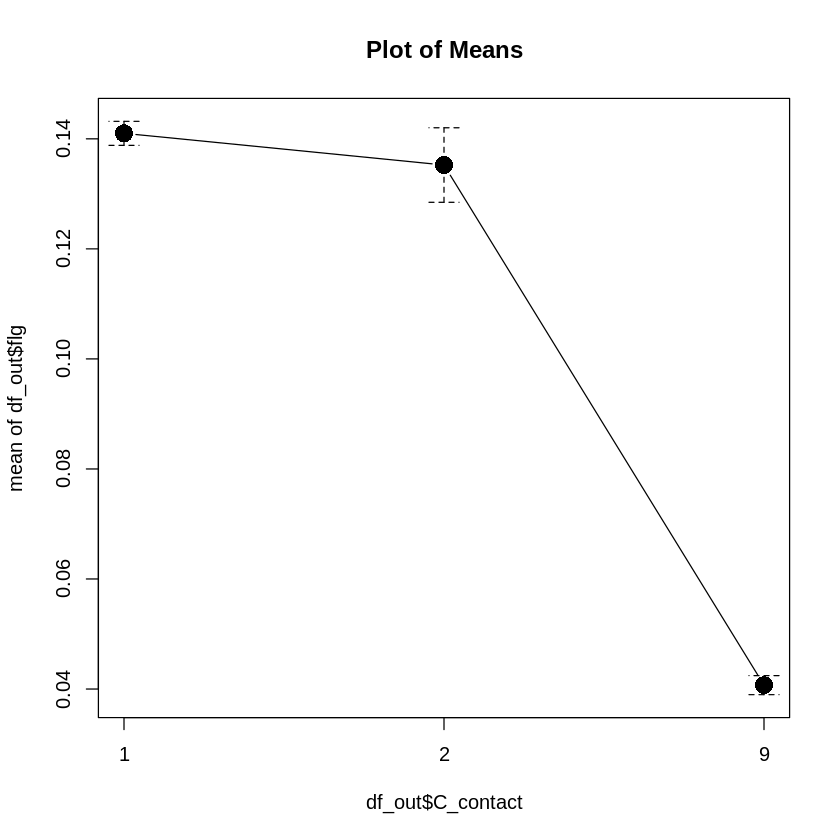

In [ ]:
plotMeans(df_out$t.C_contact,df_out$C_contact,error.bars="se")
plotMeans(df_out$flg,df_out$C_contact,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


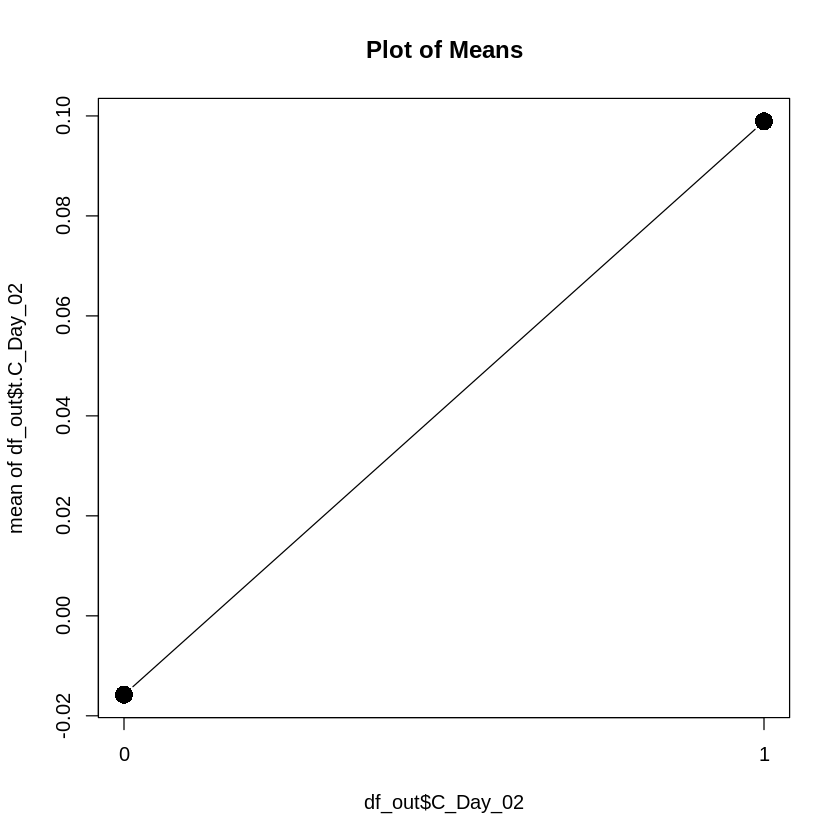

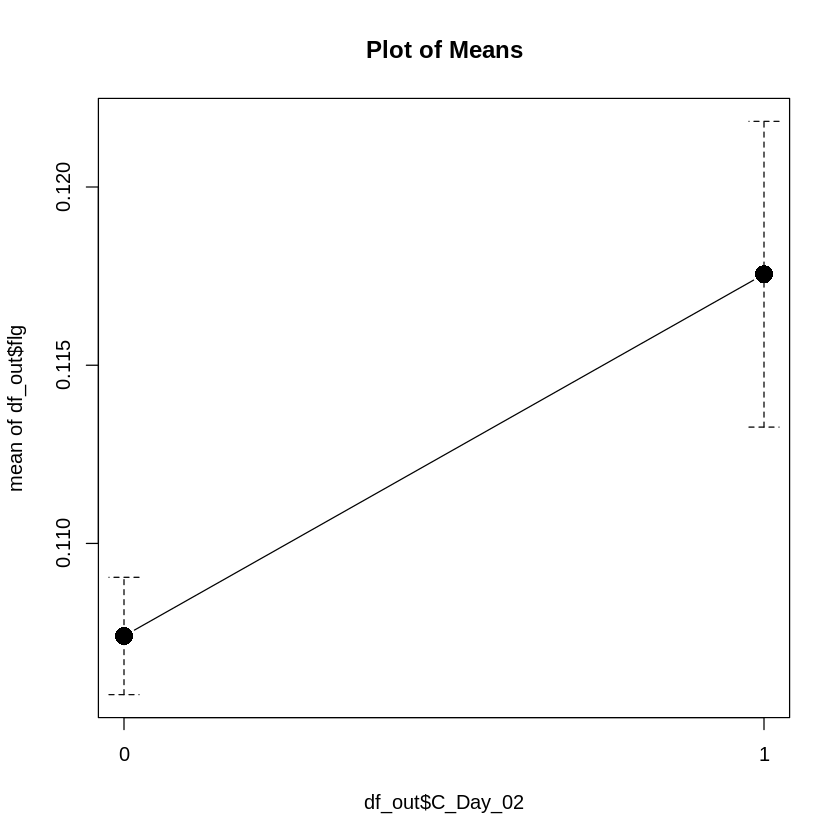

In [ ]:
plotMeans(df_out$t.C_Day_02,df_out$C_Day_02,error.bars="se")
plotMeans(df_out$flg,df_out$C_Day_02,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


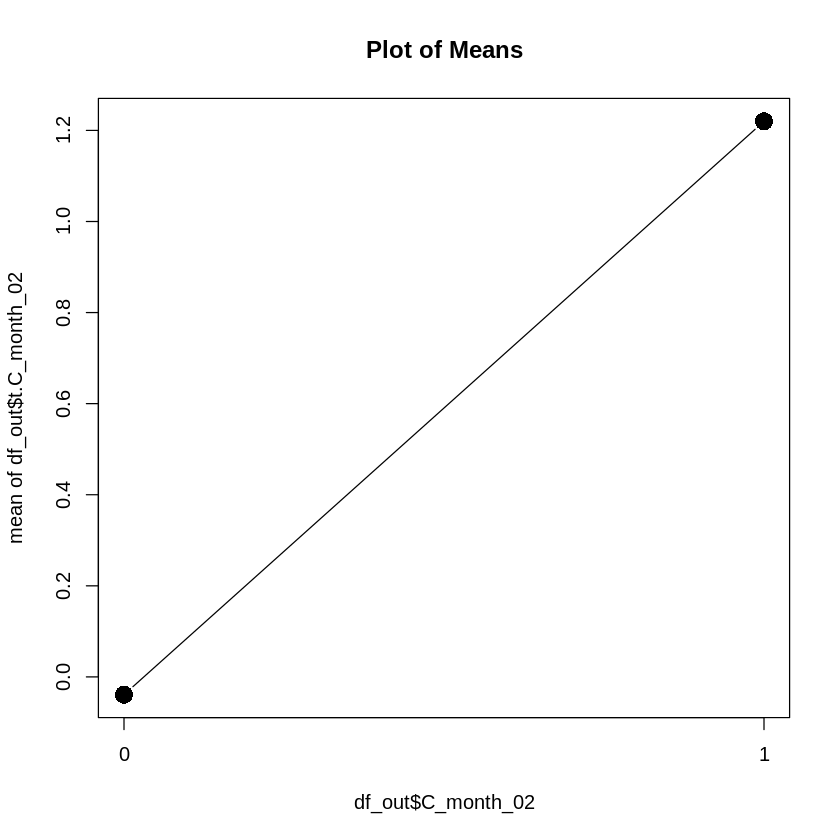

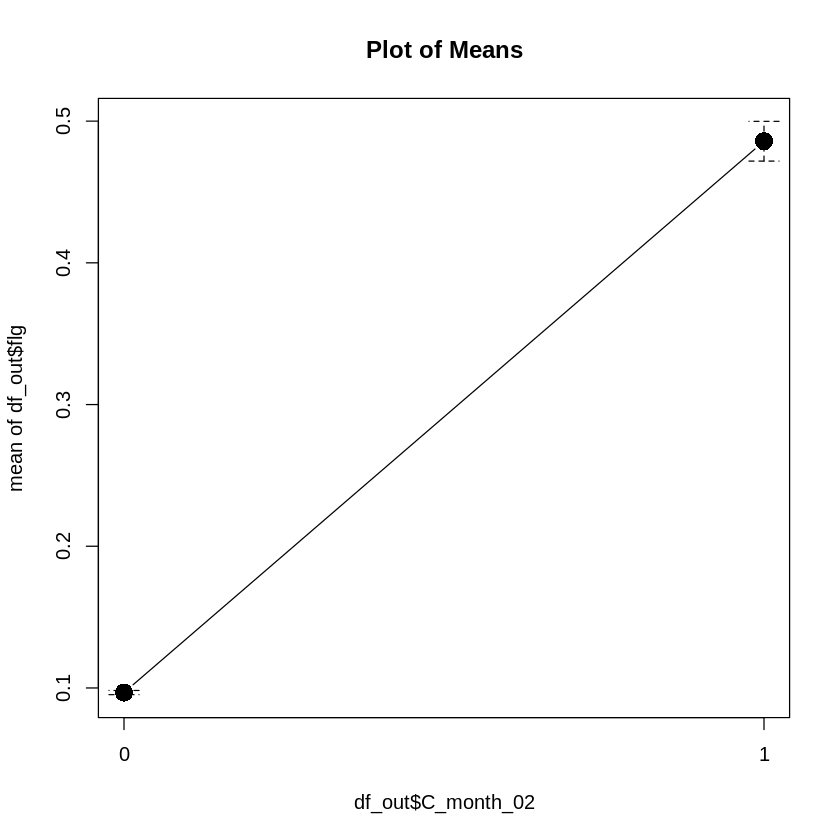

In [ ]:
plotMeans(df_out$t.C_month_02,df_out$C_month_02,error.bars="se")
plotMeans(df_out$flg,df_out$C_month_02,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

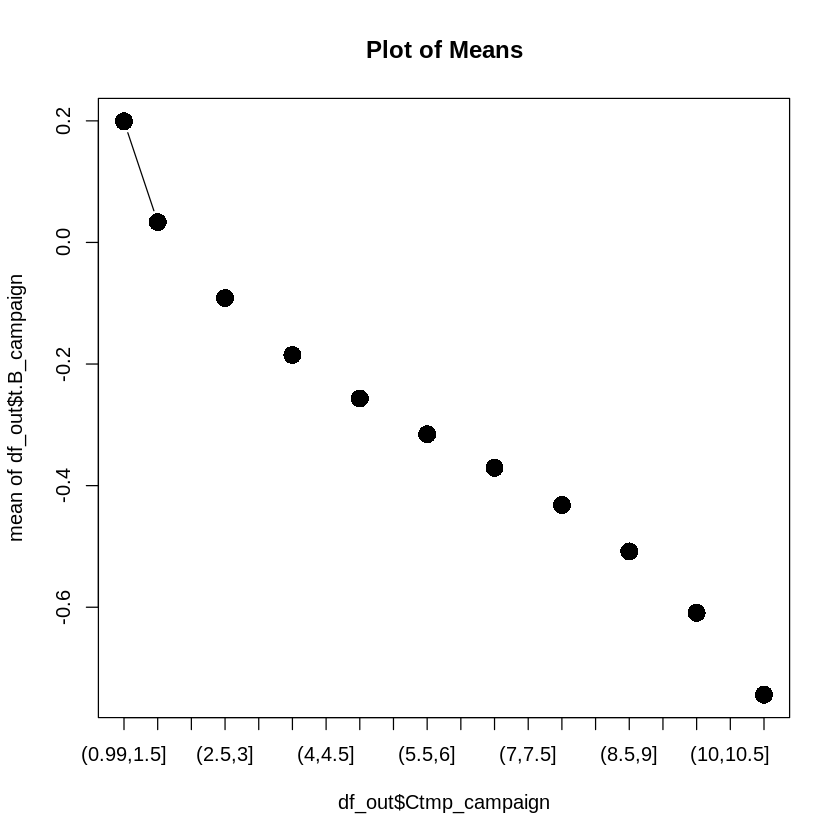

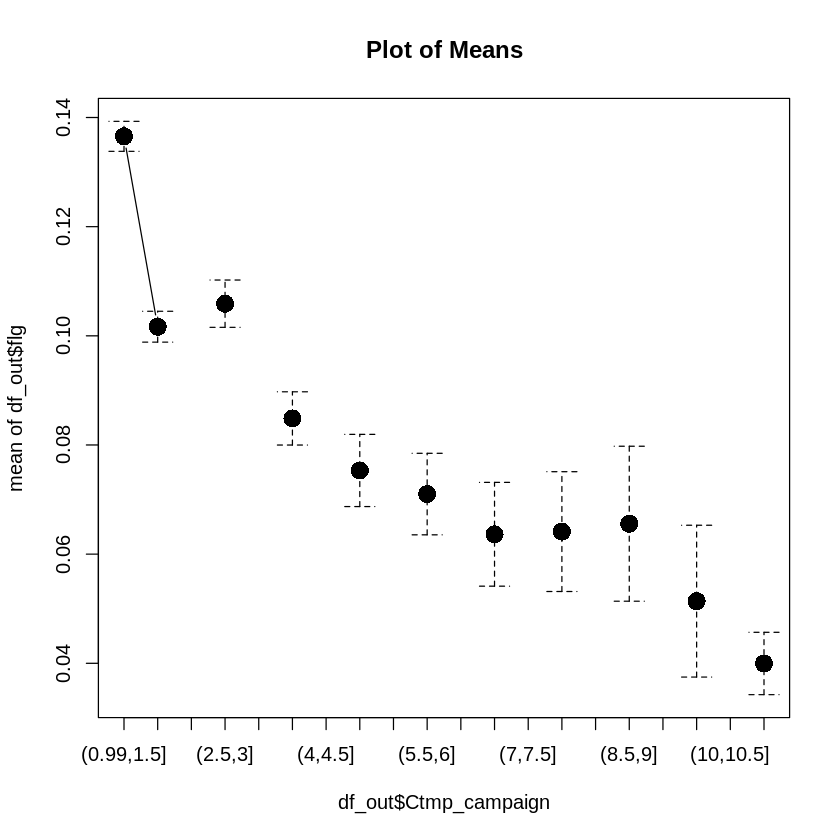

In [ ]:
df_out$Ctmp_campaign <- bin.var(df_out$campaign_11,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_campaign,df_out$Ctmp_campaign,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_campaign,error.bars="se")

Warning message in arrows(1:n.levs.1, means[, i] - sds[, i], 1:n.levs.1, means[, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs.1, means[, i] - sds[, i], 1:n.levs.1, means[, :
“zero-length arrow is of indeterminate angle and so skipped”


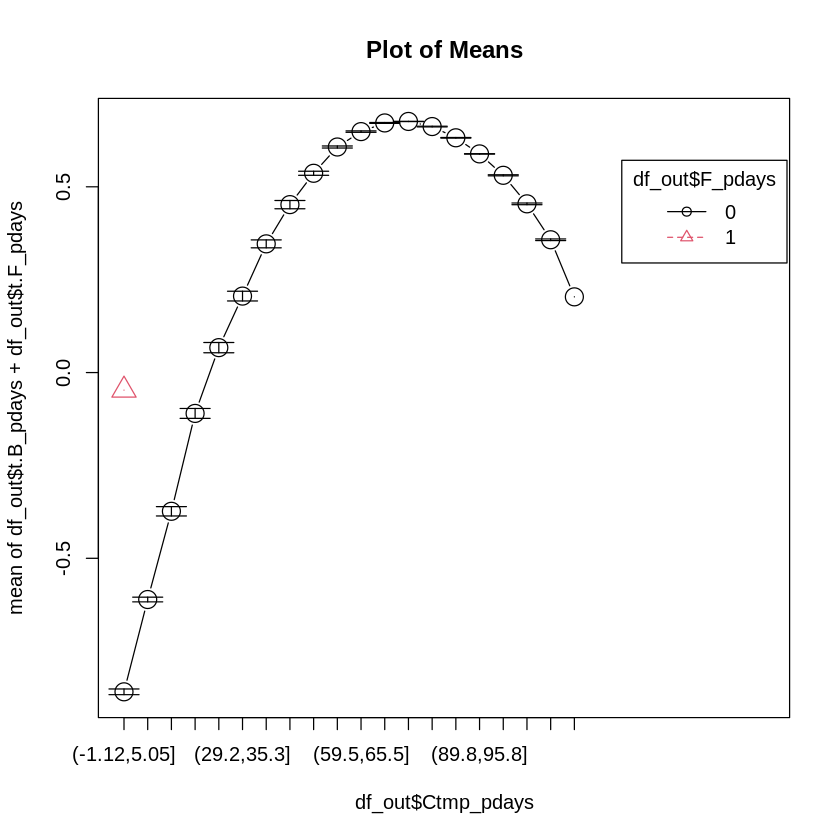

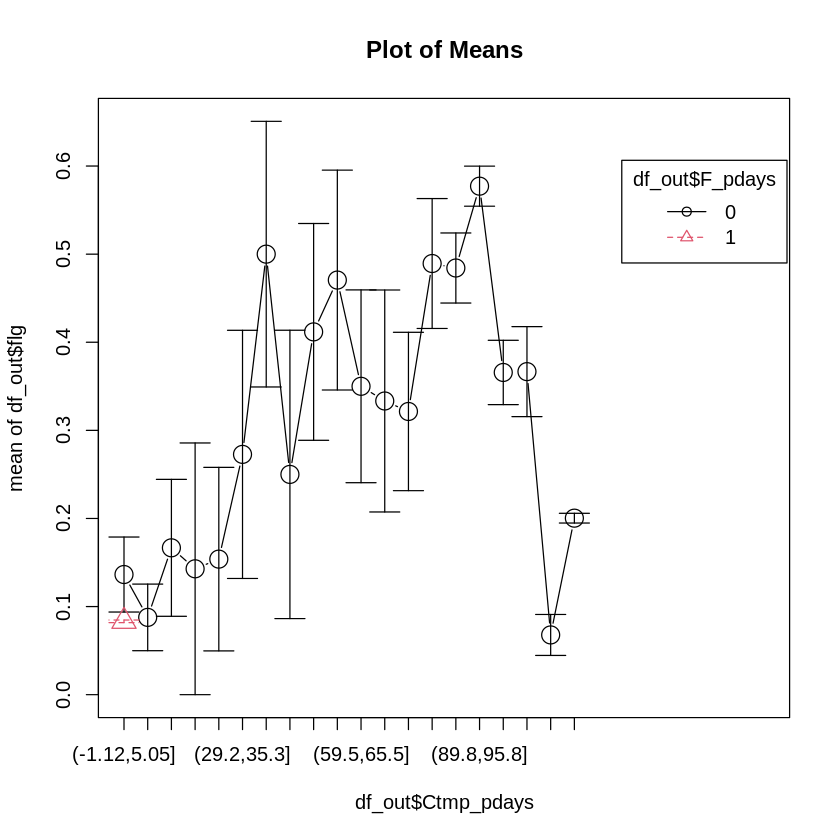

In [ ]:
df_out$Ctmp_pdays <- bin.var(df_out$pdays_120,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_pdays + df_out$t.F_pdays,df_out$Ctmp_pdays,df_out$F_pdays,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_pdays,df_out$F_pdays,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeter

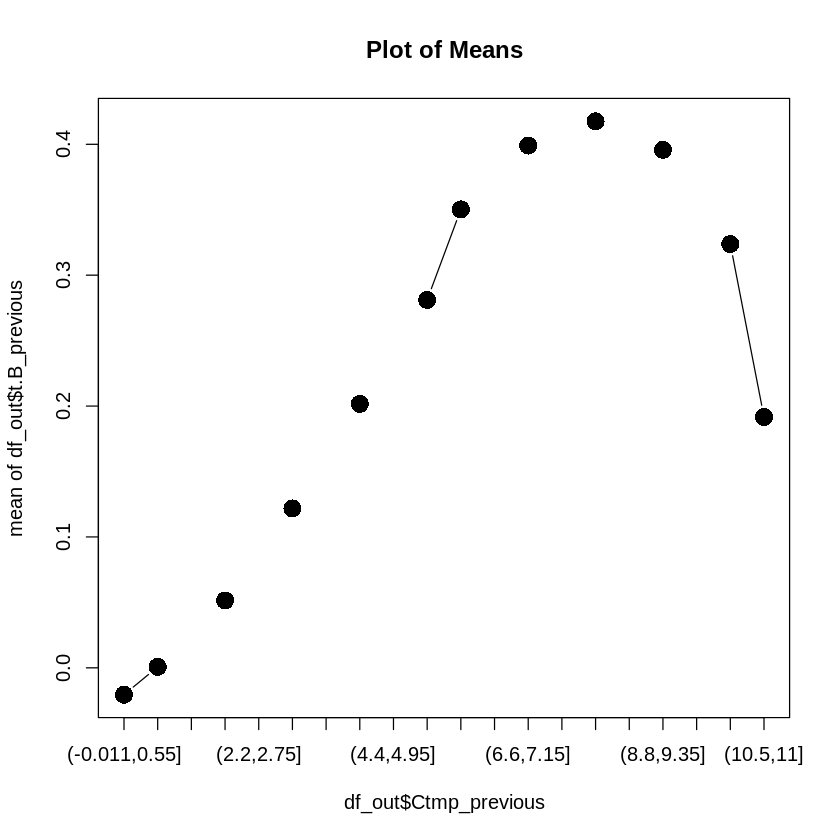

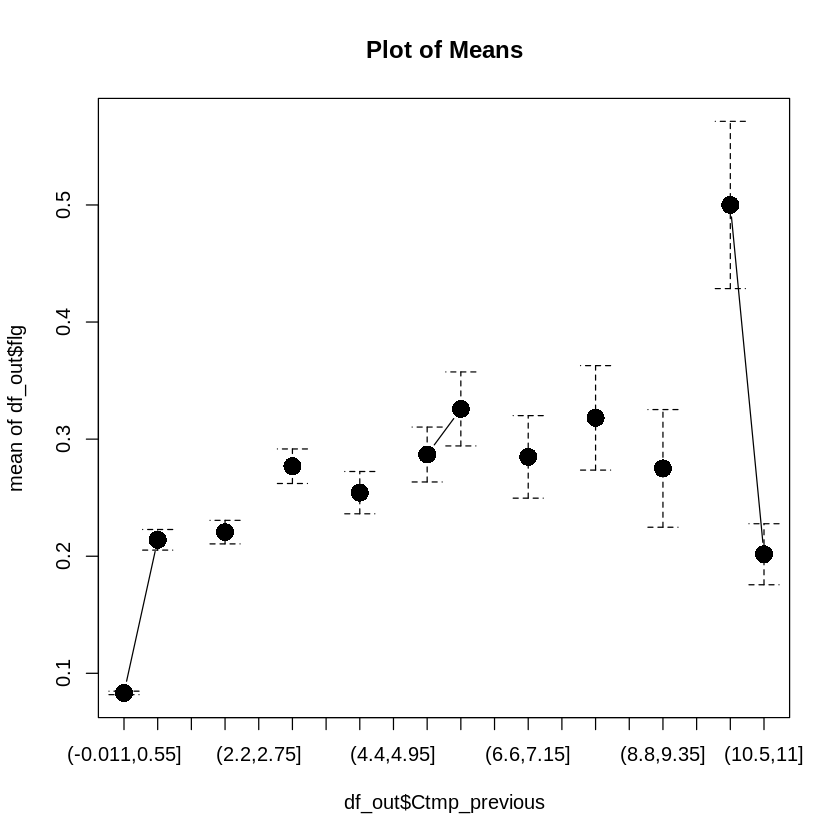

In [ ]:
df_out$Ctmp_previous <- bin.var(df_out$previous_11,bins=20,method='intervals',labels=NULL)
plotMeans(df_out$t.B_previous,df_out$Ctmp_previous,error.bars="se")
plotMeans(df_out$flg,df_out$Ctmp_previous,error.bars="se")

Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(1:n.levs, means - sds, 1:n.levs, means + sds, angle = 90, :
“zero-length arrow is of indeterminate angle and so skipped”


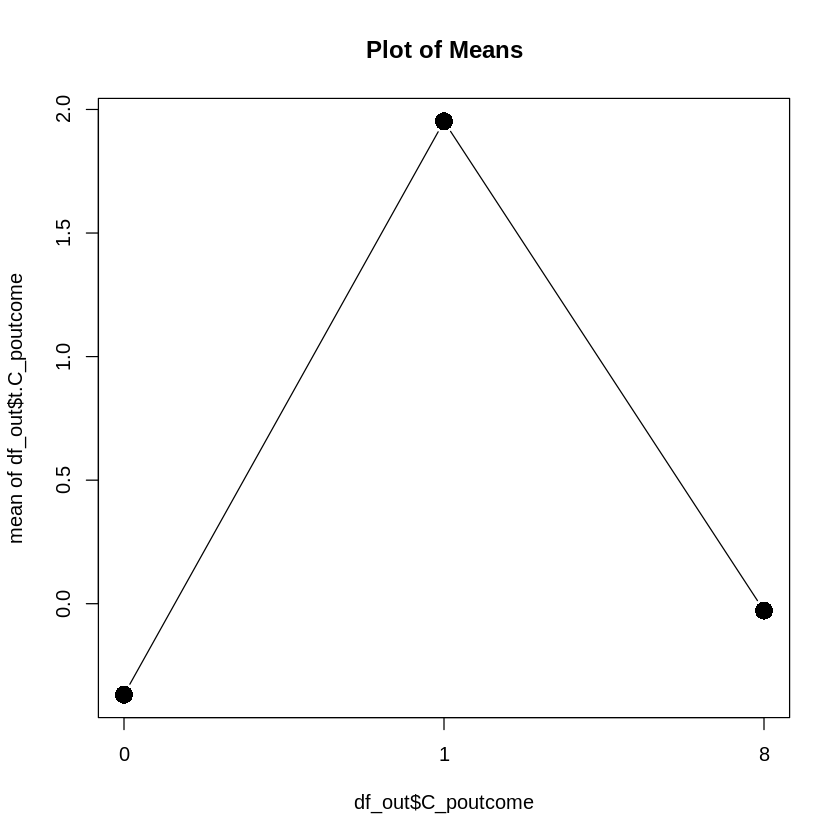

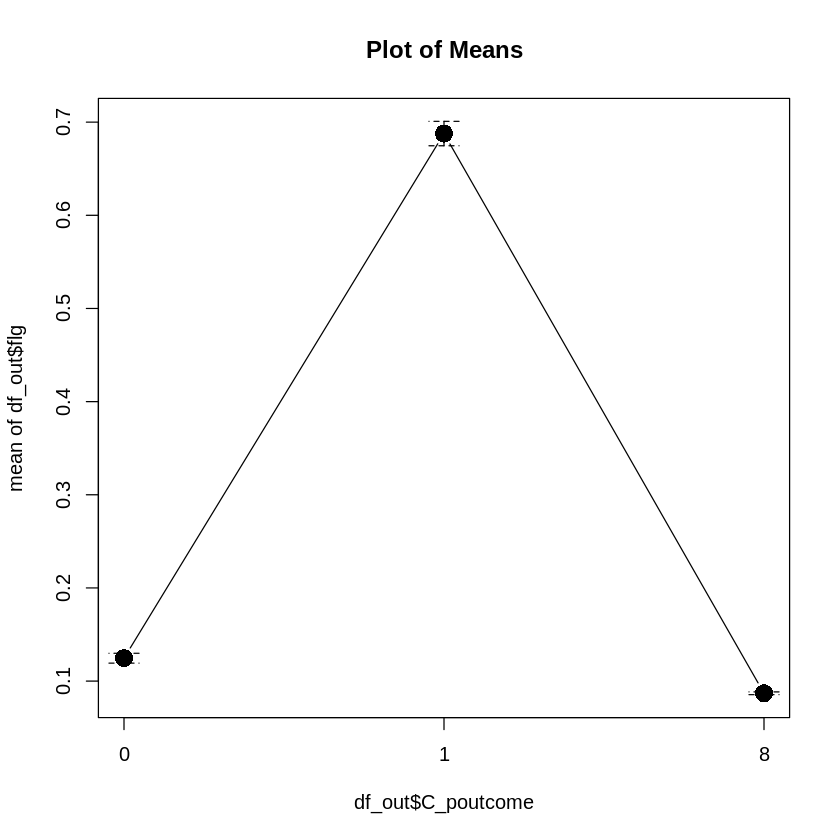

In [ ]:
plotMeans(df_out$t.C_poutcome,df_out$C_poutcome,error.bars="se")
plotMeans(df_out$flg,df_out$C_poutcome,error.bars="se")

##５‐２．アウトサンプルあてはめ

In [ ]:
#アウトサンプルデータ読み込み
df_o <- read.table("https://raw.githubusercontent.com/f11828my/Internalmeasures/b8ccb77e44e4ab2cb06165b4003b31a63c9c2979/Data_outsample.txt",
        header = TRUE , sep = ",",na.strings="NA",dec=".",strip.white=TRUE)

# カテゴリ変数作成

df_o$C_dokki <- as.factor(df_o$C_dokki)
df_o$C_job <- as.factor(df_o$C_job)
df_o$C_education <- as.factor(df_o$C_education)
df_o$C_default <- as.factor(df_o$C_default)
df_o$C_housing <- as.factor(df_o$C_housing)
df_o$C_loan <- as.factor(df_o$C_loan)
df_o$C_contact <- as.factor(df_o$C_contact)
df_o$C_Day <- as.factor(df_o$Day)
df_o$C_month <- as.factor(df_o$C_month)
df_o$C_poutcome <- as.factor(df_o$C_poutcome)

# カテゴリ変数　まとめ
##職業（無職、不明は同カテゴリ
df_o$C_job <- recode(df_o$C_job, ' 12=11 ;  4=3 ; 8=3')

#最終連絡月　3・9・12月 / それ以外　の２区分(基礎集計グラフから)
df_o$C_month_02 <- Recode(df_o$C_month,'3 = 1 ;9 = 1 ; 12 = 1 ; else=0')

#最終連絡日付　1・10・20・30・31日 / それ以外　の２区分(基礎集計グラフから)
df_o$C_Day_02 <- Recode(df_o$C_Day,'1 = 1 ; 10 = 1 ; 20 = 1 ; 30 = 1 ; 31 = 1 ; else=0')

##以前のマーケティングキャンペーンの結果
df_o$C_poutcome <- recode(df_o$C_poutcome, ' 9=8')


#連続値変数作成

#各変数　上限設定

##年齢
df_o$age_60 <- pmin(df_o$age,60)

#＃平均残高
df_o$balance_5000 <- pmax(df_o$balance,-1)
df_o$balance_5000 <- pmin(df_o$balance_5000,5000)

##現在のマーケティングキャンペーンにおける顧客への連絡回数
df_o$campaign_11 <- pmin(df_o$campaign,11)

##以前のマーケティングキャンペーンにおける顧客への最終連絡日からの経過日数
df_o$pdays_120 <- pmin(df_o$pdays,120)

df_o$F_pdays <- 0
df_o[df_o$pdays == -1,]$F_pdays <- 1
df_o$F_pdays <- as.factor(df_o$F_pdays)

##以前のマーケティングキャンペーンにおける顧客への連絡回数
df_o$previous_11 <- pmin(df_o$previous,11)


#平滑化
library(splines)
i <- 3

B_age_o <- predict(B_age,df_o$age_60)
B_balance_o <- predict(B_balance,df_o$balance_5000)
B_campaign_o <- predict(B_campaign,df_o$campaign_11)
B_pdays_o <- predict(B_pdays,df_o$pdays_120)
B_previous_o <- predict(B_previous,df_o$previous_11)

df_o[,"B_age"] <- B_age_o
df_o[,"B_balance"] <- B_balance_o
df_o[,"B_campaign"] <- B_campaign_o
df_o[,"B_pdays"] <- B_pdays_o
df_o[,"B_previous"] <- B_previous_o



In [ ]:
library(ROCR)

df_o_out <- data.frame(df_o,p=predict(mbs,newdata = df_o,type="response"))
#df_o_out <- data.frame(df_o,p=predict(mbs,newdata = df_o,type="response"),t=predict(mbs,newdata = df_o,type="terms"))

d_arcap <- df_o_out

#目的変数名
targetName <- "flg"
targetPred <- d_arcap[,targetName]

#ソートする変数、予測確率、GNO、CR
sortName <- "p"
sortPred <- d_arcap[,sortName]

#ARの計算
pred <- prediction(sortPred,targetPred)
AUC <- as.numeric( performance(pred,"auc")@y.values )
AR <- 2 *(AUC-0.5) * 100 #AR値

#CAP値の計算
#予測確率（GNO、CR）を照準に件数等分１０分類
d_arcap$CP10 <- bin.var( sortPred, bins=10, method='proportions',labels =FALSE)

#区分別のデフォルト件数
dcount <- tapply(targetPred,list(CP10=d_arcap$CP10),sum,na.rm=TRUE)

#CAP20値
CAP20 <- sum(dcount[9:10]) / sum(dcount) * 100

#CAP30値
CAP30 <- sum(dcount[8:10]) / sum(dcount) * 100

#CAP70値
CAP70 <- sum(dcount[4:10]) / sum(dcount) * 100

#アウトサンプル説明力結果
round(c(AR,CAP20,CAP30,CAP70),2)

[1] 35.13 36.03 48.85 84.76

# ６．モデル作成ステップワイズ









In [ ]:
library(Rcmdr)
# library(Boruta)
library(dplyr)
library(ROCR)
library(splines)
library(stringr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
samp <- read.table("https://raw.githubusercontent.com/f11828my/Internalmeasures/main/Data.txt",
                  header=TRUE , sep = "," , na.strings = "NA" ,dec=".",strip.white=TRUE)

head(samp)

,ID,age,C_job,C_dokki,C_education,C_default,balance,C_housing,C_loan,C_contact,Day,C_month,duration,campaign,pdays,previous,C_poutcome,flg
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,58,5,2,3,0,2143,1,0,9,5,5,261,1,-1,0,9,0
2,2,44,10,1,2,0,29,1,0,9,5,5,151,1,-1,0,9,0
3,3,33,3,2,2,0,2,1,1,9,5,5,76,1,-1,0,9,0
4,4,47,2,2,9,0,1506,1,0,9,5,5,92,1,-1,0,9,0
5,5,33,12,1,9,0,1,0,0,9,5,5,198,1,-1,0,9,0
6,6,35,5,2,3,0,231,1,0,9,5,5,139,1,-1,0,9,0


2022/06/30
めも

0.25版と変更したところ  
・C_day　…　0/1区分　→　31区分  
・C_job　…　一部まとめてた　→　まとめなくす  



In [ ]:


# カテゴリ変数作成

samp$C_marital <- as.factor(samp$C_dokki)
samp$C_job <- as.factor(samp$C_job)
samp$C_education <- as.factor(samp$C_education)
samp$C_default <- as.factor(samp$C_default)
samp$C_housing <- as.factor(samp$C_housing)
samp$C_loan <- as.factor(samp$C_loan)
samp$C_contact <- as.factor(samp$C_contact)
samp$C_day <- as.factor(samp$Day)
samp$C_month <- as.factor(samp$C_month)
samp$C_poutcome <- as.factor(samp$C_poutcome)

samp$yF <- samp$flg

# カテゴリ変数　まとめ
##職業（無職、不明は同カテゴリ
samp$C_job_02 <- Recode(samp$C_job, ' 12=11 ;  4=3 ; 8=3')

#最終連絡月　3・9・12月 / それ以外　の２区分(基礎集計グラフから)
samp$C_month_02 <- Recode(samp$C_month,'3 = 1 ;9 = 1 ; 12 = 1 ; else=0')

#最終連絡日付　1・10・20・30・31日 / それ以外　の２区分(基礎集計グラフから)
samp$C_day_02 <- Recode(samp$C_day,'1 = 1 ; 10 = 1 ; 20 = 1 ; 30 = 1 ; 31 = 1 ; else=0')



#連続値変数作成

#各変数　上限設定

##年齢
samp$age_60 <- pmin(samp$age,60)

#＃平均残高
samp$balance_5000 <- pmax(samp$balance,-1)
samp$balance_5000 <- pmin(samp$balance_5000,5000)

##現在のマーケティングキャンペーンにおける顧客への連絡回数
samp$campaign_11 <- pmin(samp$campaign,11)

##以前のマーケティングキャンペーンにおける顧客への最終連絡日からの経過日数
samp$F_pdays <- 0
samp[samp$pdays == -1,]$F_pdays <- 1
samp$F_pdays <- as.factor(samp$F_pdays)

##以前のマーケティングキャンペーンにおける顧客への連絡回数
samp$previous_11 <- pmin(samp$previous,11)


#平滑化
library(splines)
i <- 3

B_age <- bs(samp$age_60,df=i)
B_balance <- bs(samp$balance_5000,df = i)
B_campaign <- bs(samp$campaign_11,df = i)
B_previous <- bs(samp$previous_11,df = i)

samp[,"B_age"] <- B_age
samp[,"B_balance"] <- B_balance
samp[,"B_campaign"] <- B_campaign
samp[,"B_previous"] <- B_previous

#５回目での変更部分（変数微調整）

##以前のマーケティングキャンペーンにおける顧客への最終連絡日からの経過日数
samp$pdays_120 <- pmin(samp$pdays,120)

##以前のマーケティングキャンペーンの結果
samp$C_poutcome <- Recode(samp$C_poutcome, ' 9=8')

B_pdays <- bs(samp$pdays_120,df = i)

samp[,"B_pdays"] <- B_pdays

In [ ]:
names(samp)

[1] "ID"           "age"          "C_job"        "C_dokki"      "C_education" 
 [6] "C_default"    "balance"      "C_housing"    "C_loan"       "C_contact"   
[11] "Day"          "C_month"      "duration"     "campaign"     "pdays"       
[16] "previous"     "C_poutcome"   "flg"          "C_marital"    "C_day"       
[21] "yF"           "C_job_02"     "C_month_02"   "C_day_02"     "age_60"      
[26] "balance_5000" "campaign_11"  "F_pdays"      "previous_11"  "B_age"       
[31] "B_balance"    "B_campaign"   "B_previous"   "pdays_120"    "B_pdays"

In [ ]:

#サンプリング
set.seed(3)
samp50 <- samp



#全部の組み合わせの変数作成
crossstring <-"B_age + C_marital+ C_education + B_balance + C_housing + C_loan + C_contact + C_day + C_month + B_campaign + B_pdays + B_previous + C_poutcome"


for (i in 1:5) {
  for (j in 1:8) {
    w <- str_flatten(c(switch(i,               # 指定された条件
         "1"  = ("B_age"),
         "2"  = ("B_balance"),
         "3"  = ("B_campaign"),
         "4" = ("B_pdays"),
         "5" = ("B_previous"))
,
        switch(j,               # 指定された条件
           "1"  = ("C_marital"),
           "2"  = ("C_education"),
           "3"  = ("C_housing"),
           "4" = ("C_loan"),
           "5" = ("C_contact"),
           "6" = ("C_day"),
           "7" = ("C_month"),
           "8" = ("C_poutcome")))," * ")

    crossstring <- str_flatten(c(w,crossstring)," + ") }
}




#モデル_組み合わせ全部
P_model3 <- glm(paste("yF ~",crossstring, sep="")
                ,data=samp50,family=binomial(link=logit))


#ステップワイズ
step.P_model3 <- step(P_model3)
summaryStep.P_model3 <- summary(step.P_model3)

#ステップワイズ結果
coef <- summaryStep.P_model3$coefficients
r.squared <- summaryStep.P_model3$r.squared
adj.r.squared <- summaryStep.P_model3$adj.r.squared
resultTable <- cbind(coef, r.squared = r.squared, adj.r.squared = adj.r.squared)



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Start:  AIC=26813.63
yF ~ B_previous * C_poutcome + B_previous * C_month + B_previous * 
    C_day + B_previous * C_contact + B_previous * C_loan + B_previous * 
    C_housing + B_previous * C_education + B_previous * C_marital + 
    B_pdays * C_poutcome + B_pdays * C_month + B_pdays * C_day + 
    B_pdays * C_contact + B_pdays * C_loan + B_pdays * C_housing + 
    B_pdays * C_education + B_pdays * C_marital + B_campaign * 
    C_poutcome + B_campaign * C_month + B_campaign * C_day + 
    B_campaign * C_contact + B_campaign * C_loan + B_campaign * 
    C_housing + B_campaign * C_education + B_campaign * C_marital + 
    B_balance * C_poutcome + B_balance * C_month + B_balance * 
    C_day + B_balance * C_contact + B_balance * C_loan + B_balance * 
    C_housing + B_balance * C_education + B_balance * C_marital + 
    B_age * C_poutcome + B_age * C_month + B_age * C_day + B_age * 
    C_contact + B_age * C_loan + B_age * C_housing + B_age * 
    C_education + B_age * C_marital + B_age 

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_day:B_balance        90    25221 26737
- B_previous:C_day       90    25231 26747
- C_day:B_campaign       90    25256 26772
- C_day:B_pdays          90    25270 26786
- C_month:B_balance      33    25161 26791
- C_education:B_age       9    25122 26800
- C_marital:B_campaign    6    25121 26805
- C_marital:B_pdays       6    25121 26805
- B_previous:C_month     33    25175 26805
- C_poutcome:B_pdays      6    25121 26805
- C_marital:B_balance     6    25122 26806
- C_education:B_balance   9    25128 26806
- B_previous:C_marital    6    25124 26808
- B_previous:C_poutcome   6    25124 26808
- C_housing:B_age         3    25119 26809
- B_previous:C_housing    3    25120 26810
- C_contact:B_pdays       6    25126 26810
- C_loan:B_age            3    25120 26810
- C_housing:B_campaign    3    25120 26810
- C_contact:B_campaign    6    25127 26811
- C_housing:B_pdays       3    25121 26811
- C_loan:B_balance        3    25122 26812
- C_housing

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=26737.38
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_day + B_previous:C_contact + 
    B_previous:C_loan + B_previous:C_housing + B_previous:C_education + 
    B_previous:C_marital + C_poutcome:B_pdays + C_month:B_pdays + 
    C_day:B_pdays + C_contact:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_marital:B_pdays + C_poutcome:B_campaign + 
    C_month:B_campaign + C_day:B_campaign + C_contact:B_campaign + 
    C_loan:B_campaign + C_housing:B_campaign + C_education:B_campaign + 
    C_marital:B_campaign + C_poutcome:B_balance + C_month:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_marital:B_balance + C_poutcome:B_age + 
    C_month:B_age + C_day:B_age + C_contact:B_age + C_loan:B_age + 
    C_housing:B_ag

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- B_previous:C_day       90    25334 26670
- C_day:B_campaign       90    25358 26694
- C_day:B_pdays          90    25372 26708
- C_education:B_age       9    25226 26724
- C_marital:B_pdays       6    25224 26728
- C_marital:B_campaign    6    25224 26728
- C_poutcome:B_pdays      6    25225 26729
- B_previous:C_month     33    25279 26729
- C_marital:B_balance     6    25226 26730
- C_month:B_balance      33    25280 26730
- C_education:B_balance   9    25232 26730
- B_previous:C_marital    6    25227 26731
- B_previous:C_poutcome   6    25228 26732
- C_housing:B_age         3    25222 26732
- C_day:B_age            90    25398 26734
- B_previous:C_housing    3    25224 26734
- C_contact:B_pdays       6    25230 26734
- C_loan:B_age            3    25224 26734
- C_contact:B_campaign    6    25230 26734
- C_housing:B_campaign    3    25224 26734
- C_housing:B_pdays       3    25225 26735
- C_contact:B_balance     6    25231 26735
- C_loan:B_

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=26669.98
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_day:B_campaign + C_contact:B_campaign + C_loan:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_marital:B_campaign + 
    C_poutcome:B_balance + C_month:B_balance + C_contact:B_balance + 
    C_loan:B_balance + C_housing:B_balance + C_education:B_balance + 
    C_marital:B_balance + C_poutcome:B_age + C_month:B_age + 
    C_day:B_age + C_contact:B_age + C_loan:B_age + C_housing:B_age + 
    C_education:B_a

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_day:B_campaign       90    25473 26629
- B_previous:C_month     33    25378 26648
- C_education:B_age       9    25338 26656
- C_marital:B_pdays       6    25336 26660
- C_day:B_age            90    25504 26660
- C_marital:B_campaign    6    25337 26661
- B_previous:C_poutcome   6    25338 26662
- C_marital:B_balance     6    25338 26662
- C_poutcome:B_pdays      6    25338 26662
- C_education:B_balance   9    25345 26663
- B_previous:C_marital    6    25340 26664
- C_month:B_balance      33    25394 26664
- C_housing:B_age         3    25335 26665
- B_previous:C_housing    3    25336 26666
- C_contact:B_campaign    6    25343 26667
- C_loan:B_age            3    25337 26667
- C_housing:B_campaign    3    25337 26667
- C_contact:B_pdays       6    25343 26667
- C_contact:B_balance     6    25344 26668
- C_housing:B_pdays       3    25338 26668
- C_loan:B_balance        3    25338 26668
- C_housing:B_balance     3    25338 26668
- C_day:B_p

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=26628.64
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_loan:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_marital:B_campaign + C_poutcome:B_balance + 
    C_month:B_balance + C_contact:B_balance + C_loan:B_balance + 
    C_housing:B_balance + C_education:B_balance + C_marital:B_balance + 
    C_poutcome:B_age + C_month:B_age + C_day:B_age + C_contact:B_age + 
    C_loan:B_age + C_housing:B_age + C_education:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- B_previous:C_month     33    25516 26606
- C_education:B_age       9    25477 26615
- C_marital:B_pdays       6    25474 26618
- C_day:B_age            90    25643 26619
- C_marital:B_campaign    6    25476 26620
- C_month:B_balance      33    25530 26620
- B_previous:C_poutcome   6    25477 26621
- C_marital:B_balance     6    25478 26622
- C_poutcome:B_pdays      6    25478 26622
- B_previous:C_marital    6    25478 26622
- C_education:B_balance   9    25484 26622
- C_housing:B_age         3    25474 26624
- B_previous:C_housing    3    25474 26624
- C_loan:B_age            3    25475 26625
- C_contact:B_pdays       6    25482 26626
- C_contact:B_campaign    6    25482 26626
- C_housing:B_campaign    3    25476 26626
- C_education:B_pdays     9    25488 26626
- C_loan:B_balance        3    25477 26627
- C_housing:B_pdays       3    25477 26627
- C_housing:B_balance     3    25477 26627
- C_contact:B_balance     6    25483 26627
- C_loan:B_

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=26605.68
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + C_loan:B_pdays + 
    C_housing:B_pdays + C_education:B_pdays + C_marital:B_pdays + 
    C_poutcome:B_campaign + C_month:B_campaign + C_contact:B_campaign + 
    C_loan:B_campaign + C_housing:B_campaign + C_education:B_campaign + 
    C_marital:B_campaign + C_poutcome:B_balance + C_month:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_marital:B_balance + C_poutcome:B_age + 
    C_month:B_age + C_day:B_age + C_contact:B_age + C_loan:B_age + 
    C_housing:B_age + C_education:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_education:B_age       9    25520 26592
- C_day:B_age            90    25685 26595
- C_marital:B_pdays       6    25517 26595
- C_marital:B_campaign    6    25519 26597
- C_month:B_balance      33    25573 26597
- C_marital:B_balance     6    25520 26598
- B_previous:C_marital    6    25521 26599
- B_previous:C_poutcome   6    25521 26599
- C_education:B_balance   9    25528 26600
- C_poutcome:B_pdays      6    25522 26600
- C_housing:B_age         3    25517 26601
- B_previous:C_housing    3    25518 26602
- C_loan:B_age            3    25518 26602
- C_contact:B_campaign    6    25525 26603
- C_contact:B_pdays       6    25525 26603
- C_education:B_pdays     9    25531 26603
- C_housing:B_campaign    3    25520 26604
- C_loan:B_balance        3    25520 26604
- C_housing:B_balance     3    25520 26604
- C_loan:B_pdays          3    25520 26604
- C_housing:B_pdays       3    25520 26604
- C_contact:B_balance     6    25527 26605
- B_previou

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=26591.96
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + C_loan:B_pdays + 
    C_housing:B_pdays + C_education:B_pdays + C_marital:B_pdays + 
    C_poutcome:B_campaign + C_month:B_campaign + C_contact:B_campaign + 
    C_loan:B_campaign + C_housing:B_campaign + C_education:B_campaign + 
    C_marital:B_campaign + C_poutcome:B_balance + C_month:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_marital:B_balance + C_poutcome:B_age + 
    C_month:B_age + C_day:B_age + C_contact:B_age + C_loan:B_age + 
    C_housing:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_day:B_age            90    25688 26580
- C_marital:B_pdays       6    25521 26581
- C_marital:B_campaign    6    25523 26583
- C_month:B_balance      33    25577 26583
- C_marital:B_balance     6    25525 26585
- B_previous:C_marital    6    25525 26585
- B_previous:C_poutcome   6    25525 26585
- C_poutcome:B_pdays      6    25526 26586
- C_education:B_balance   9    25532 26586
- C_housing:B_age         3    25522 26588
- B_previous:C_housing    3    25522 26588
- C_loan:B_age            3    25522 26588
- C_contact:B_campaign    6    25529 26589
- C_contact:B_pdays       6    25530 26590
- C_housing:B_campaign    3    25524 26590
- C_education:B_pdays     9    25536 26590
- C_loan:B_balance        3    25524 26590
- C_housing:B_balance     3    25524 26590
- C_loan:B_pdays          3    25524 26590
- C_housing:B_pdays       3    25525 26591
- C_contact:B_balance     6    25531 26591
- B_previous:C_loan       3    25525 26591
- C_loan:B_

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=26580.34
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + C_loan:B_pdays + 
    C_housing:B_pdays + C_education:B_pdays + C_marital:B_pdays + 
    C_poutcome:B_campaign + C_month:B_campaign + C_contact:B_campaign + 
    C_loan:B_campaign + C_housing:B_campaign + C_education:B_campaign + 
    C_marital:B_campaign + C_poutcome:B_balance + C_month:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_marital:B_balance + C_poutcome:B_age + 
    C_month:B_age + C_contact:B_age + C_loan:B_age + C_housing:B_age + 
    C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_marital:B_pdays       6    25690 26570
- C_month:B_balance      33    25745 26571
- C_marital:B_campaign    6    25691 26571
- B_previous:C_marital    6    25693 26573
- B_previous:C_poutcome   6    25693 26573
- C_marital:B_balance     6    25693 26573
- C_poutcome:B_pdays      6    25694 26574
- C_education:B_balance   9    25701 26575
- B_previous:C_housing    3    25690 26576
- C_loan:B_age            3    25691 26577
- C_contact:B_campaign    6    25697 26577
- C_housing:B_age         3    25691 26577
- C_housing:B_campaign    3    25692 26578
- C_education:B_pdays     9    25704 26578
- C_contact:B_pdays       6    25698 26578
- C_housing:B_balance     3    25692 26578
- C_loan:B_balance        3    25693 26579
- C_housing:B_pdays       3    25693 26579
- C_loan:B_pdays          3    25693 26579
- C_loan:B_campaign       3    25694 26580
- B_previous:C_loan       3    25694 26580
<none>                         25688 26580
- C_contact

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=26569.66
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + C_loan:B_pdays + 
    C_housing:B_pdays + C_education:B_pdays + C_poutcome:B_campaign + 
    C_month:B_campaign + C_contact:B_campaign + C_loan:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_marital:B_campaign + 
    C_poutcome:B_balance + C_month:B_balance + C_contact:B_balance + 
    C_loan:B_balance + C_housing:B_balance + C_education:B_balance + 
    C_marital:B_balance + C_poutcome:B_age + C_month:B_age + 
    C_contact:B_age + C_loan:B_age + C_housing:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_month:B_balance      33    25746 26560
- C_marital:B_campaign    6    25692 26560
- B_previous:C_poutcome   6    25694 26562
- C_marital:B_balance     6    25695 26563
- C_poutcome:B_pdays      6    25696 26564
- C_education:B_balance   9    25702 26564
- B_previous:C_housing    3    25691 26565
- C_loan:B_age            3    25692 26566
- C_contact:B_campaign    6    25698 26566
- C_housing:B_age         3    25693 26567
- C_housing:B_campaign    3    25693 26567
- C_education:B_pdays     9    25705 26567
- C_contact:B_pdays       6    25699 26567
- C_housing:B_balance     3    25694 26568
- C_loan:B_balance        3    25694 26568
- C_housing:B_pdays       3    25694 26568
- C_loan:B_pdays          3    25694 26568
- C_loan:B_campaign       3    25695 26569
- B_previous:C_loan       3    25695 26569
- C_contact:B_balance     6    25702 26570
<none>                         25690 26570
- C_poutcome:B_campaign   6    25702 26570
- C_educati

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=26560.37
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + C_loan:B_pdays + 
    C_housing:B_pdays + C_education:B_pdays + C_poutcome:B_campaign + 
    C_month:B_campaign + C_contact:B_campaign + C_loan:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_marital:B_campaign + 
    C_poutcome:B_balance + C_contact:B_balance + C_loan:B_balance + 
    C_housing:B_balance + C_education:B_balance + C_marital:B_balance + 
    C_poutcome:B_age + C_month:B_age + C_contact:B_age + C_loan:B_age + 
    C_housing:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_marital:B_campaign    6    25750 26552
- C_marital:B_balance     6    25751 26553
- B_previous:C_poutcome   6    25751 26553
- C_poutcome:B_pdays      6    25752 26554
- C_education:B_balance   9    25760 26556
- B_previous:C_housing    3    25748 26556
- C_loan:B_age            3    25749 26557
- C_housing:B_age         3    25749 26557
- C_contact:B_campaign    6    25755 26557
- C_education:B_pdays     9    25762 26558
- C_housing:B_campaign    3    25750 26558
- C_loan:B_balance        3    25750 26558
- C_housing:B_pdays       3    25751 26559
- C_contact:B_pdays       6    25757 26559
- C_loan:B_pdays          3    25751 26559
- B_previous:C_loan       3    25752 26560
- C_loan:B_campaign       3    25752 26560
- C_poutcome:B_campaign   6    25758 26560
<none>                         25746 26560
- B_previous:C_education  9    25765 26561
- C_housing:B_balance     3    25753 26561
- B_previous:C_contact    6    25760 26562
- C_educati

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=26551.49
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + C_loan:B_pdays + 
    C_housing:B_pdays + C_education:B_pdays + C_poutcome:B_campaign + 
    C_month:B_campaign + C_contact:B_campaign + C_loan:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_poutcome:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_marital:B_balance + C_poutcome:B_age + 
    C_month:B_age + C_contact:B_age + C_loan:B_age + C_housing:B_age + 
    C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_marital:B_balance     6    25754 26544
- B_previous:C_poutcome   6    25754 26544
- C_poutcome:B_pdays      6    25755 26545
- C_education:B_balance   9    25762 26546
- B_previous:C_housing    3    25751 26547
- C_loan:B_age            3    25752 26548
- C_housing:B_age         3    25752 26548
- C_contact:B_campaign    6    25758 26548
- C_education:B_pdays     9    25765 26549
- C_loan:B_balance        3    25753 26549
- C_housing:B_campaign    3    25753 26549
- C_contact:B_pdays       6    25760 26550
- C_housing:B_pdays       3    25754 26550
- C_loan:B_pdays          3    25754 26550
- C_loan:B_campaign       3    25755 26551
- B_previous:C_loan       3    25755 26551
- C_poutcome:B_campaign   6    25761 26551
<none>                         25750 26552
- B_previous:C_education  9    25768 26552
- C_housing:B_balance     3    25756 26552
- B_previous:C_contact    6    25763 26553
- C_education:B_campaign  9    25769 26553
- C_contact

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=26544.24
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + C_loan:B_pdays + 
    C_housing:B_pdays + C_education:B_pdays + C_poutcome:B_campaign + 
    C_month:B_campaign + C_contact:B_campaign + C_loan:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_poutcome:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_poutcome:B_age + C_month:B_age + 
    C_contact:B_age + C_loan:B_age + C_housing:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


 2022/07/01 17:33  
 AIC=26591.96 の結果まで出てた

In [ ]:
write.csv(resultTable, "/content/ステップワイズ法（ロジスティック回帰分析）.csv")

In [ ]:
resultTable

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),1.666743e+00,1.76418470,0.94476673,3.447780e-01
B_previous1,-2.909783e+01,21.07896417,-1.38042016,1.674573e-01
B_previous2,9.612634e+01,63.72987560,1.50834030,1.314675e-01
B_previous3,-3.244276e+02,231.34375385,-1.40236155,1.608073e-01
C_poutcome1,-9.031713e-02,2.30905296,-0.03911436,9.687992e-01
C_poutcome8,-3.234795e+00,1.70683976,-1.89519577,5.806647e-02
C_month2,3.647810e-01,0.26057853,1.39988885,1.615466e-01
C_month3,2.216550e+00,0.33240329,6.66825476,2.588632e-11
C_month4,9.771929e-01,0.24838412,3.93420025,8.347417e-05
C_month5,5.597204e-01,0.24219861,2.31099742,2.083300e-02


# ６．モデル作成ステップワイズ_50%









In [ ]:
library(Rcmdr)
# library(Boruta)
library(dplyr)
library(ROCR)
library(splines)
library(stringr)

In [ ]:
samp <-
  read.table("https://raw.githubusercontent.com/f11828my/Internalmeasures/main/bank-full.csv",
                  header=TRUE, stringsAsFactors=TRUE, sep=";", na.strings="NA", dec=".",
             strip.white=TRUE)

head(samp)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [ ]:


# カテゴリ変数作成

#カテゴリ化
samp$C_age <- as.factor(samp$age)
samp$C_job <- as.factor(samp$job)
samp$C_marital <- as.factor(samp$marital)
samp$C_education <- as.factor(samp$education)
samp$C_default <- as.factor(samp$default)
samp$C_balance <- as.factor(samp$balance)
samp$C_housing <- as.factor(samp$housing)
samp$C_loan<- as.factor(samp$loan)
samp$C_contact <- as.factor(samp$contact)
samp$C_day <- as.factor(samp$day)
samp$C_month <- as.factor(samp$month)
samp$C_duration <- as.factor(samp$duration)
samp$C_campaign <- as.factor(samp$campaign)
samp$C_pdays <- as.factor(samp$pdays)
samp$C_previous <- as.factor(samp$previous)
samp$C_poutcome <- as.factor(samp$poutcome)
samp$C_y <- as.factor(samp$y)

#目的変数をフラグに
samp$yF <- if_else(samp$y == "yes",1,0)
samp$Ｃ_yF <- as.factor(samp$yF)



# カテゴリ変数　まとめ
##職業（無職、不明は同カテゴリ
# samp$C_job_02 <- Recode(samp$C_job, ' 12=11 ;  4=3 ; 8=3')

#最終連絡月　3・9・12月 / それ以外　の２区分(基礎集計グラフから)
# samp$C_month_02 <- Recode(samp$C_month,'3 = 1 ;9 = 1 ; 12 = 1 ; else=0')

#最終連絡日付　1・10・20・30・31日 / それ以外　の２区分(基礎集計グラフから)
# samp$C_day_02 <- Recode(samp$C_day,'1 = 1 ; 10 = 1 ; 20 = 1 ; 30 = 1 ; 31 = 1 ; else=0')



#連続値変数作成

#各変数　上限設定

##年齢
samp$age_60 <- pmin(samp$age,60)

#＃平均残高
samp$balance_5000 <- pmax(samp$balance,-1)
samp$balance_5000 <- pmin(samp$balance_5000,5000)

##現在のマーケティングキャンペーンにおける顧客への連絡回数
samp$campaign_11 <- pmin(samp$campaign,11)

##以前のマーケティングキャンペーンにおける顧客への最終連絡日からの経過日数
samp$F_pdays <- 0
samp[samp$pdays == -1,]$F_pdays <- 1
samp$F_pdays <- as.factor(samp$F_pdays)

##以前のマーケティングキャンペーンにおける顧客への連絡回数
samp$previous_11 <- pmin(samp$previous,11)


#平滑化
library(splines)
i <- 3

B_age <- bs(samp$age_60,df=i)
B_balance <- bs(samp$balance_5000,df = i)
B_campaign <- bs(samp$campaign_11,df = i)
B_previous <- bs(samp$previous_11,df = i)

samp[,"B_age"] <- B_age
samp[,"B_balance"] <- B_balance
samp[,"B_campaign"] <- B_campaign
samp[,"B_previous"] <- B_previous

#５回目での変更部分（変数微調整）

##以前のマーケティングキャンペーンにおける顧客への最終連絡日からの経過日数
samp$pdays_120 <- pmin(samp$pdays,120)

##以前のマーケティングキャンペーンの結果
# samp$C_poutcome <- Recode(samp$C_poutcome, ' 9=8')

B_pdays <- bs(samp$pdays_120,df = i)

samp[,"B_pdays"] <- B_pdays

In [ ]:
names(samp)

[1] "ID"           "age"          "C_job"        "C_dokki"      "C_education" 
 [6] "C_default"    "balance"      "C_housing"    "C_loan"       "C_contact"   
[11] "Day"          "C_month"      "duration"     "campaign"     "pdays"       
[16] "previous"     "C_poutcome"   "flg"          "C_marital"    "C_day"       
[21] "yF"           "C_job_02"     "C_month_02"   "C_day_02"     "age_60"      
[26] "balance_5000" "campaign_11"  "F_pdays"      "previous_11"  "B_age"       
[31] "B_balance"    "B_campaign"   "B_previous"   "pdays_120"    "B_pdays"

In [ ]:
set.seed(3)
samp50 <- samp %>% sample_frac(0.5)

In [ ]:
nrow(samp)
nrow(samp50)

[1] 45211

[1] 22606

In [ ]:

#サンプリング
set.seed(3)
samp50 <- samp %>% sample_frac(0.5)



#全部の組み合わせの変数作成
crossstring <-"B_age + C_marital+ C_education + B_balance + C_housing + C_loan + C_contact + C_day + C_month + B_campaign + B_pdays + B_previous + C_poutcome"


for (i in 1:5) {
  for (j in 1:8) {
    w <- str_flatten(c(switch(i,               # 指定された条件
         "1"  = ("B_age"),
         "2"  = ("B_balance"),
         "3"  = ("B_campaign"),
         "4" = ("B_pdays"),
         "5" = ("B_previous"))
,
        switch(j,               # 指定された条件
           "1"  = ("C_marital"),
           "2"  = ("C_education"),
           "3"  = ("C_housing"),
           "4" = ("C_loan"),
           "5" = ("C_contact"),
           "6" = ("C_day"),
           "7" = ("C_month"),
           "8" = ("C_poutcome")))," * ")

    crossstring <- str_flatten(c(w,crossstring)," + ") }
}




#モデル_組み合わせ全部
P_model3 <- glm(paste("yF ~",crossstring, sep="")
                ,data=samp50,family=binomial(link=logit))


#ステップワイズ
step.P_model3 <- step(P_model3)
summaryStep.P_model3 <- summary(step.P_model3)

#ステップワイズ結果
coef <- summaryStep.P_model3$coefficients
r.squared <- summaryStep.P_model3$r.squared
adj.r.squared <- summaryStep.P_model3$adj.r.squared
resultTable <- cbind(coef, r.squared = r.squared, adj.r.squared = adj.r.squared)



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Start:  AIC=13608.7
yF ~ B_previous * C_poutcome + B_previous * C_month + B_previous * 
    C_day + B_previous * C_contact + B_previous * C_loan + B_previous * 
    C_housing + B_previous * C_education + B_previous * C_marital + 
    B_pdays * C_poutcome + B_pdays * C_month + B_pdays * C_day + 
    B_pdays * C_contact + B_pdays * C_loan + B_pdays * C_housing + 
    B_pdays * C_education + B_pdays * C_marital + B_campaign * 
    C_poutcome + B_campaign * C_month + B_campaign * C_day + 
    B_campaign * C_contact + B_campaign * C_loan + B_campaign * 
    C_housing + B_campaign * C_education + B_campaign * C_marital + 
    B_balance * C_poutcome + B_balance * C_month + B_balance * 
    C_day + B_balance * C_contact + B_balance * C_loan + B_balance * 
    C_housing + B_balance * C_education + B_balance * C_marital + 
    B_age * C_poutcome + B_age * C_month + B_age * C_day + B_age * 
    C_contact + B_age * C_loan + B_age * C_housing + B_age * 
    C_education + B_age * C_marital + B_age +

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- B_previous:C_day       90    12022 13562
- C_day:B_age            90    12023 13563
- C_day:B_pdays          90    12044 13584
- C_day:B_campaign       90    12048 13588
- C_month:B_balance      33    11936 13590
- C_month:B_age          33    11943 13597
- C_education:B_age       9    11898 13600
- C_marital:B_campaign    6    11892 13600
- B_previous:C_poutcome   6    11893 13601
- C_marital:B_balance     6    11894 13602
- C_housing:B_age         3    11889 13603
- C_loan:B_campaign       3    11890 13604
- C_contact:B_pdays       6    11896 13604
- B_previous:C_housing    3    11890 13604
- C_loan:B_balance        3    11891 13605
- C_housing:B_balance     3    11891 13605
- C_loan:B_age            3    11892 13606
- C_housing:B_campaign    3    11892 13606
- C_housing:B_pdays       3    11893 13607
- C_education:B_pdays     9    11905 13607
- C_education:B_balance   9    11905 13607
- C_marital:B_age         6    11900 13608
- B_previou

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13561.96
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_day:B_campaign + C_contact:B_campaign + C_loan:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_marital:B_campaign + 
    C_poutcome:B_balance + C_month:B_balance + C_day:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_marital:B_balance + C_poutcome:B_age + 
    C_month:B_age + C_day:B_age + C_contact:B_age + C_loan:B_age + 
    C_housing:B_age

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_day:B_balance        90    12145 13505
- C_day:B_age            90    12152 13512
- C_day:B_campaign       90    12170 13530
- C_month:B_balance      33    12067 13541
- C_day:B_pdays          90    12192 13552
- C_education:B_age       9    12030 13552
- C_month:B_age          33    12078 13552
- C_marital:B_campaign    6    12025 13553
- C_marital:B_balance     6    12027 13555
- C_housing:B_age         3    12022 13556
- B_previous:C_housing    3    12023 13557
- C_loan:B_campaign       3    12023 13557
- B_previous:C_poutcome   6    12030 13558
- C_housing:B_balance     3    12024 13558
- C_loan:B_balance        3    12024 13558
- C_education:B_balance   9    12036 13558
- C_marital:B_pdays       6    12030 13558
- C_contact:B_pdays       6    12031 13559
- C_loan:B_age            3    12025 13559
- C_housing:B_campaign    3    12025 13559
- C_housing:B_pdays       3    12026 13560
- C_education:B_pdays     9    12039 13561
- C_marital

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13504.62
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_day:B_campaign + C_contact:B_campaign + C_loan:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_marital:B_campaign + 
    C_poutcome:B_balance + C_month:B_balance + C_contact:B_balance + 
    C_loan:B_balance + C_housing:B_balance + C_education:B_balance + 
    C_marital:B_balance + C_poutcome:B_age + C_month:B_age + 
    C_day:B_age + C_contact:B_age + C_loan:B_age + C_housing:B_age + 
    C_education:B_a

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_day:B_age            90    12276 13456
- C_day:B_campaign       90    12295 13475
- C_month:B_balance      33    12197 13491
- C_day:B_pdays          90    12313 13493
- C_education:B_age       9    12152 13494
- C_marital:B_campaign    6    12148 13496
- C_month:B_age          33    12202 13496
- C_marital:B_balance     6    12149 13497
- C_housing:B_age         3    12145 13499
- B_previous:C_housing    3    12146 13500
- C_loan:B_campaign       3    12146 13500
- C_loan:B_balance        3    12146 13500
- B_previous:C_poutcome   6    12153 13501
- C_marital:B_pdays       6    12153 13501
- C_housing:B_balance     3    12147 13501
- C_education:B_balance   9    12160 13502
- C_education:B_pdays     9    12160 13502
- C_contact:B_balance     6    12154 13502
- C_contact:B_pdays       6    12154 13502
- C_housing:B_campaign    3    12148 13502
- C_loan:B_age            3    12148 13502
- C_housing:B_pdays       3    12149 13503
- C_marital

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13456.25
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_day:B_campaign + C_contact:B_campaign + C_loan:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_marital:B_campaign + 
    C_poutcome:B_balance + C_month:B_balance + C_contact:B_balance + 
    C_loan:B_balance + C_housing:B_balance + C_education:B_balance + 
    C_marital:B_balance + C_poutcome:B_age + C_month:B_age + 
    C_contact:B_age + C_loan:B_age + C_housing:B_age + C_education:B_age + 
    C_marital

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_day:B_campaign       90    12424 13424
- C_month:B_balance      33    12326 13440
- C_education:B_age       9    12285 13447
- C_month:B_age          33    12334 13448
- C_marital:B_campaign    6    12280 13448
- C_marital:B_balance     6    12280 13448
- C_day:B_pdays          90    12450 13450
- C_housing:B_age         3    12277 13451
- B_previous:C_housing    3    12277 13451
- C_loan:B_campaign       3    12277 13451
- C_loan:B_balance        3    12278 13452
- B_previous:C_poutcome   6    12284 13452
- C_marital:B_pdays       6    12284 13452
- C_housing:B_balance     3    12279 13453
- C_education:B_balance   9    12291 13453
- C_education:B_pdays     9    12291 13453
- C_contact:B_pdays       6    12285 13453
- C_loan:B_age            3    12280 13454
- C_housing:B_campaign    3    12280 13454
- C_housing:B_pdays       3    12280 13454
- C_contact:B_balance     6    12287 13455
- C_marital:B_age         6    12287 13455
- B_previou

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13423.87
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_loan:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_marital:B_campaign + C_poutcome:B_balance + 
    C_month:B_balance + C_contact:B_balance + C_loan:B_balance + 
    C_housing:B_balance + C_education:B_balance + C_marital:B_balance + 
    C_poutcome:B_age + C_month:B_age + C_contact:B_age + C_loan:B_age + 
    C_housing:B_age + C_education:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_month:B_balance      33    12473 13407
- C_day:B_pdays          90    12592 13412
- C_education:B_age       9    12432 13414
- C_marital:B_campaign    6    12428 13416
- C_marital:B_balance     6    12428 13416
- B_previous:C_housing    3    12425 13419
- C_housing:B_age         3    12425 13419
- C_month:B_age          33    12485 13419
- C_loan:B_campaign       3    12426 13420
- B_previous:C_month     33    12486 13420
- C_housing:B_balance     3    12426 13420
- C_loan:B_balance        3    12426 13420
- C_education:B_pdays     9    12438 13420
- B_previous:C_poutcome   6    12433 13421
- C_contact:B_pdays       6    12433 13421
- C_loan:B_age            3    12427 13421
- C_marital:B_pdays       6    12433 13421
- C_education:B_balance   9    12440 13422
- C_marital:B_age         6    12434 13422
- C_housing:B_pdays       3    12428 13422
- C_contact:B_balance     6    12434 13422
<none>                         12424 13424
- B_previou

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13406.89
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_loan:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_marital:B_campaign + C_poutcome:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_marital:B_balance + C_poutcome:B_age + 
    C_month:B_age + C_contact:B_age + C_loan:B_age + C_housing:B_age + 
    C_education:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_day:B_pdays          90    12641 13395
- C_education:B_age       9    12480 13396
- C_marital:B_campaign    6    12477 13399
- C_marital:B_balance     6    12477 13399
- B_previous:C_housing    3    12474 13402
- C_month:B_age          33    12534 13402
- C_loan:B_balance        3    12474 13402
- C_housing:B_age         3    12474 13402
- B_previous:C_month     33    12534 13402
- C_contact:B_balance     6    12480 13402
- C_loan:B_campaign       3    12474 13402
- C_education:B_pdays     9    12487 13403
- C_marital:B_pdays       6    12481 13403
- C_contact:B_pdays       6    12482 13404
- B_previous:C_poutcome   6    12482 13404
- C_loan:B_age            3    12476 13404
- C_housing:B_balance     3    12476 13404
- C_marital:B_age         6    12483 13405
- C_housing:B_pdays       3    12477 13405
- C_education:B_balance   9    12490 13406
<none>                         12473 13407
- B_previous:C_loan       3    12480 13408
- C_contact

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13394.83
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_loan:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_marital:B_campaign + C_poutcome:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_marital:B_balance + C_poutcome:B_age + 
    C_month:B_age + C_contact:B_age + C_loan:B_age + C_housing:B_age + 
    C_education:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_education:B_age       9    12648 13384
- C_marital:B_campaign    6    12644 13386
- C_contact:B_pdays       6    12645 13387
- C_marital:B_balance     6    12645 13387
- C_month:B_age          33    12699 13387
- B_previous:C_housing    3    12641 13389
- C_marital:B_pdays       6    12647 13389
- C_loan:B_balance        3    12642 13390
- C_housing:B_age         3    12642 13390
- C_loan:B_campaign       3    12642 13390
- B_previous:C_poutcome   6    12649 13391
- C_contact:B_balance     6    12649 13391
- C_marital:B_age         6    12649 13391
- C_housing:B_balance     3    12644 13392
- C_loan:B_age            3    12644 13392
- C_housing:B_pdays       3    12645 13393
- C_education:B_pdays     9    12657 13393
- C_poutcome:B_pdays      6    12651 13393
- C_education:B_balance   9    12657 13393
- B_previous:C_month     33    12706 13394
<none>                         12641 13395
- B_previous:C_loan       3    12647 13395
- C_poutcom

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13383.82
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_loan:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_marital:B_campaign + C_poutcome:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_marital:B_balance + C_poutcome:B_age + 
    C_month:B_age + C_contact:B_age + C_loan:B_age + C_housing:B_age + 
    C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_marital:B_campaign    6    12651 13375
- C_contact:B_pdays       6    12651 13375
- C_marital:B_balance     6    12652 13376
- C_month:B_age          33    12708 13378
- C_marital:B_pdays       6    12654 13378
- B_previous:C_housing    3    12648 13378
- C_loan:B_balance        3    12649 13379
- C_loan:B_campaign       3    12650 13380
- C_housing:B_age         3    12650 13380
- B_previous:C_poutcome   6    12656 13380
- C_contact:B_balance     6    12656 13380
- C_housing:B_balance     3    12650 13380
- C_loan:B_age            3    12651 13381
- C_marital:B_age         6    12657 13381
- C_education:B_pdays     9    12663 13381
- C_housing:B_pdays       3    12652 13382
- C_education:B_balance   9    12664 13382
- C_poutcome:B_pdays      6    12658 13382
- B_previous:C_month     33    12713 13383
<none>                         12648 13384
- B_previous:C_loan       3    12654 13384
- C_poutcome:B_campaign   9    12666 13384
- C_contact

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13375.22
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_loan:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_poutcome:B_balance + C_contact:B_balance + 
    C_loan:B_balance + C_housing:B_balance + C_education:B_balance + 
    C_marital:B_balance + C_poutcome:B_age + C_month:B_age + 
    C_contact:B_age + C_loan:B_age + C_housing:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [ ]:
write.csv(resultTable, "/content/ステップワイズ法（ロジスティック回帰分析）_0.5.csv")

# ６．モデル作成ステップワイズ_50%＿backward









In [ ]:
library(Rcmdr)
# library(Boruta)
library(dplyr)
library(ROCR)
library(splines)
library(stringr)

In [ ]:
samp <-
  read.table("https://raw.githubusercontent.com/PortugalJip2022/Portugal2022/main/bank-full.csv",
                  header=TRUE, stringsAsFactors=TRUE, sep=";", na.strings="NA", dec=".",
             strip.white=TRUE)

head(samp)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [ ]:


# カテゴリ変数作成

#カテゴリ化
samp$C_age <- as.factor(samp$age)
samp$C_job <- as.factor(samp$job)
samp$C_marital <- as.factor(samp$marital)
samp$C_education <- as.factor(samp$education)
samp$C_default <- as.factor(samp$default)
samp$C_balance <- as.factor(samp$balance)
samp$C_housing <- as.factor(samp$housing)
samp$C_loan<- as.factor(samp$loan)
samp$C_contact <- as.factor(samp$contact)
samp$C_day <- as.factor(samp$day)
samp$C_month <- as.factor(samp$month)
samp$C_duration <- as.factor(samp$duration)
samp$C_campaign <- as.factor(samp$campaign)
samp$C_pdays <- as.factor(samp$pdays)
samp$C_previous <- as.factor(samp$previous)
samp$C_poutcome <- as.factor(samp$poutcome)
samp$C_y <- as.factor(samp$y)

#目的変数をフラグに
samp$yF <- if_else(samp$y == "yes",1,0)
samp$Ｃ_yF <- as.factor(samp$yF)



# カテゴリ変数　まとめ
##職業（無職、不明は同カテゴリ
# samp$C_job_02 <- Recode(samp$C_job, ' 12=11 ;  4=3 ; 8=3')

#最終連絡月　3・9・12月 / それ以外　の２区分(基礎集計グラフから)
# samp$C_month_02 <- Recode(samp$C_month,'3 = 1 ;9 = 1 ; 12 = 1 ; else=0')

#最終連絡日付　1・10・20・30・31日 / それ以外　の２区分(基礎集計グラフから)
# samp$C_day_02 <- Recode(samp$C_day,'1 = 1 ; 10 = 1 ; 20 = 1 ; 30 = 1 ; 31 = 1 ; else=0')



#連続値変数作成

#各変数　上限設定

##年齢
samp$age_60 <- pmin(samp$age,60)

#＃平均残高
samp$balance_5000 <- pmax(samp$balance,-1)
samp$balance_5000 <- pmin(samp$balance_5000,5000)

##現在のマーケティングキャンペーンにおける顧客への連絡回数
samp$campaign_11 <- pmin(samp$campaign,11)

##以前のマーケティングキャンペーンにおける顧客への最終連絡日からの経過日数
samp$F_pdays <- 0
samp[samp$pdays == -1,]$F_pdays <- 1
samp$F_pdays <- as.factor(samp$F_pdays)

##以前のマーケティングキャンペーンにおける顧客への連絡回数
samp$previous_11 <- pmin(samp$previous,11)


#平滑化
library(splines)
i <- 3

B_age <- bs(samp$age_60,df=i)
B_balance <- bs(samp$balance_5000,df = i)
B_campaign <- bs(samp$campaign_11,df = i)
B_previous <- bs(samp$previous_11,df = i)

samp[,"B_age"] <- B_age
samp[,"B_balance"] <- B_balance
samp[,"B_campaign"] <- B_campaign
samp[,"B_previous"] <- B_previous

#５回目での変更部分（変数微調整）

##以前のマーケティングキャンペーンにおける顧客への最終連絡日からの経過日数
samp$pdays_120 <- pmin(samp$pdays,120)

##以前のマーケティングキャンペーンの結果
# samp$C_poutcome <- Recode(samp$C_poutcome, ' 9=8')

B_pdays <- bs(samp$pdays_120,df = i)

samp[,"B_pdays"] <- B_pdays

In [ ]:
names(samp)

[1] "age"          "job"          "marital"      "education"    "default"     
 [6] "balance"      "housing"      "loan"         "contact"      "day"         
[11] "month"        "duration"     "campaign"     "pdays"        "previous"    
[16] "poutcome"     "y"            "C_age"        "C_job"        "C_marital"   
[21] "C_education"  "C_default"    "C_balance"    "C_housing"    "C_loan"      
[26] "C_contact"    "C_day"        "C_month"      "C_duration"   "C_campaign"  
[31] "C_pdays"      "C_previous"   "C_poutcome"   "C_y"          "yF"          
[36] "Ｃ_yF"        "age_60"       "balance_5000" "campaign_11"  "F_pdays"     
[41] "previous_11"  "B_age"        "B_balance"    "B_campaign"   "B_previous"  
[46] "pdays_120"    "B_pdays"

In [ ]:
set.seed(3)
samp50 <- samp %>% sample_frac(0.5)

In [ ]:
nrow(samp)
nrow(samp50)

[1] 45211

[1] 22606

In [ ]:

#サンプリング
set.seed(3)
samp50 <- samp %>% sample_frac(0.5)



#全部の組み合わせの変数作成
crossstring <-"B_age + C_marital+ C_education + B_balance + C_housing + C_loan + C_contact + C_day + C_month + B_campaign + B_pdays + B_previous + C_poutcome"


for (i in 1:5) {
  for (j in 1:8) {
    w <- str_flatten(c(switch(i,               # 指定された条件
         "1"  = ("B_age"),
         "2"  = ("B_balance"),
         "3"  = ("B_campaign"),
         "4" = ("B_pdays"),
         "5" = ("B_previous"))
,
        switch(j,               # 指定された条件
           "1"  = ("C_marital"),
           "2"  = ("C_education"),
           "3"  = ("C_housing"),
           "4" = ("C_loan"),
           "5" = ("C_contact"),
           "6" = ("C_day"),
           "7" = ("C_month"),
           "8" = ("C_poutcome")))," * ")

    crossstring <- str_flatten(c(w,crossstring)," + ") }
}




#モデル_組み合わせ全部
P_model3 <- glm(paste("yF ~",crossstring, sep="")
                ,data=samp50,family=binomial(link=logit))


#ステップワイズ
step.P_model3 <- step(P_model3,direction =c("backward"),trace = 1)
summaryStep.P_model3 <- summary(step.P_model3)

#ステップワイズ結果
coef <- summaryStep.P_model3$coefficients
r.squared <- summaryStep.P_model3$r.squared
adj.r.squared <- summaryStep.P_model3$adj.r.squared
resultTable <- cbind(coef, r.squared = r.squared, adj.r.squared = adj.r.squared)

write.csv(resultTable, "/content/ステップワイズ法（ロジスティック回帰分析）_0.5_b.csv")

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Start:  AIC=13608.7
yF ~ B_previous * C_poutcome + B_previous * C_month + B_previous * 
    C_day + B_previous * C_contact + B_previous * C_loan + B_previous * 
    C_housing + B_previous * C_education + B_previous * C_marital + 
    B_pdays * C_poutcome + B_pdays * C_month + B_pdays * C_day + 
    B_pdays * C_contact + B_pdays * C_loan + B_pdays * C_housing + 
    B_pdays * C_education + B_pdays * C_marital + B_campaign * 
    C_poutcome + B_campaign * C_month + B_campaign * C_day + 
    B_campaign * C_contact + B_campaign * C_loan + B_campaign * 
    C_housing + B_campaign * C_education + B_campaign * C_marital + 
    B_balance * C_poutcome + B_balance * C_month + B_balance * 
    C_day + B_balance * C_contact + B_balance * C_loan + B_balance * 
    C_housing + B_balance * C_education + B_balance * C_marital + 
    B_age * C_poutcome + B_age * C_month + B_age * C_day + B_age * 
    C_contact + B_age * C_loan + B_age * C_housing + B_age * 
    C_education + B_age * C_marital + B_age +

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- B_previous:C_day       90    12022 13562
- C_day:B_age            90    12023 13563
- C_day:B_pdays          90    12044 13584
- C_day:B_campaign       90    12048 13588
- C_month:B_balance      33    11936 13590
- C_month:B_age          33    11943 13597
- C_education:B_age       9    11898 13600
- C_marital:B_campaign    6    11892 13600
- B_previous:C_poutcome   6    11893 13601
- C_marital:B_balance     6    11894 13602
- C_housing:B_age         3    11889 13603
- C_loan:B_campaign       3    11890 13604
- C_contact:B_pdays       6    11896 13604
- B_previous:C_housing    3    11890 13604
- C_loan:B_balance        3    11891 13605
- C_housing:B_balance     3    11891 13605
- C_loan:B_age            3    11892 13606
- C_housing:B_campaign    3    11892 13606
- C_housing:B_pdays       3    11893 13607
- C_education:B_pdays     9    11905 13607
- C_education:B_balance   9    11905 13607
- C_marital:B_age         6    11900 13608
- B_previou

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13561.96
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_day:B_campaign + C_contact:B_campaign + C_loan:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_marital:B_campaign + 
    C_poutcome:B_balance + C_month:B_balance + C_day:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_marital:B_balance + C_poutcome:B_age + 
    C_month:B_age + C_day:B_age + C_contact:B_age + C_loan:B_age + 
    C_housing:B_age

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_day:B_balance        90    12145 13505
- C_day:B_age            90    12152 13512
- C_day:B_campaign       90    12170 13530
- C_month:B_balance      33    12067 13541
- C_day:B_pdays          90    12192 13552
- C_education:B_age       9    12030 13552
- C_month:B_age          33    12078 13552
- C_marital:B_campaign    6    12025 13553
- C_marital:B_balance     6    12027 13555
- C_housing:B_age         3    12022 13556
- B_previous:C_housing    3    12023 13557
- C_loan:B_campaign       3    12023 13557
- B_previous:C_poutcome   6    12030 13558
- C_housing:B_balance     3    12024 13558
- C_loan:B_balance        3    12024 13558
- C_education:B_balance   9    12036 13558
- C_marital:B_pdays       6    12030 13558
- C_contact:B_pdays       6    12031 13559
- C_loan:B_age            3    12025 13559
- C_housing:B_campaign    3    12025 13559
- C_housing:B_pdays       3    12026 13560
- C_education:B_pdays     9    12039 13561
- C_marital

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13504.62
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_day:B_campaign + C_contact:B_campaign + C_loan:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_marital:B_campaign + 
    C_poutcome:B_balance + C_month:B_balance + C_contact:B_balance + 
    C_loan:B_balance + C_housing:B_balance + C_education:B_balance + 
    C_marital:B_balance + C_poutcome:B_age + C_month:B_age + 
    C_day:B_age + C_contact:B_age + C_loan:B_age + C_housing:B_age + 
    C_education:B_a

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_day:B_age            90    12276 13456
- C_day:B_campaign       90    12295 13475
- C_month:B_balance      33    12197 13491
- C_day:B_pdays          90    12313 13493
- C_education:B_age       9    12152 13494
- C_marital:B_campaign    6    12148 13496
- C_month:B_age          33    12202 13496
- C_marital:B_balance     6    12149 13497
- C_housing:B_age         3    12145 13499
- B_previous:C_housing    3    12146 13500
- C_loan:B_campaign       3    12146 13500
- C_loan:B_balance        3    12146 13500
- B_previous:C_poutcome   6    12153 13501
- C_marital:B_pdays       6    12153 13501
- C_housing:B_balance     3    12147 13501
- C_education:B_balance   9    12160 13502
- C_education:B_pdays     9    12160 13502
- C_contact:B_balance     6    12154 13502
- C_contact:B_pdays       6    12154 13502
- C_housing:B_campaign    3    12148 13502
- C_loan:B_age            3    12148 13502
- C_housing:B_pdays       3    12149 13503
- C_marital

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13456.25
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_day:B_campaign + C_contact:B_campaign + C_loan:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_marital:B_campaign + 
    C_poutcome:B_balance + C_month:B_balance + C_contact:B_balance + 
    C_loan:B_balance + C_housing:B_balance + C_education:B_balance + 
    C_marital:B_balance + C_poutcome:B_age + C_month:B_age + 
    C_contact:B_age + C_loan:B_age + C_housing:B_age + C_education:B_age + 
    C_marital

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_day:B_campaign       90    12424 13424
- C_month:B_balance      33    12326 13440
- C_education:B_age       9    12285 13447
- C_month:B_age          33    12334 13448
- C_marital:B_campaign    6    12280 13448
- C_marital:B_balance     6    12280 13448
- C_day:B_pdays          90    12450 13450
- C_housing:B_age         3    12277 13451
- B_previous:C_housing    3    12277 13451
- C_loan:B_campaign       3    12277 13451
- C_loan:B_balance        3    12278 13452
- B_previous:C_poutcome   6    12284 13452
- C_marital:B_pdays       6    12284 13452
- C_housing:B_balance     3    12279 13453
- C_education:B_balance   9    12291 13453
- C_education:B_pdays     9    12291 13453
- C_contact:B_pdays       6    12285 13453
- C_loan:B_age            3    12280 13454
- C_housing:B_campaign    3    12280 13454
- C_housing:B_pdays       3    12280 13454
- C_contact:B_balance     6    12287 13455
- C_marital:B_age         6    12287 13455
- B_previou

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13423.87
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_loan:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_marital:B_campaign + C_poutcome:B_balance + 
    C_month:B_balance + C_contact:B_balance + C_loan:B_balance + 
    C_housing:B_balance + C_education:B_balance + C_marital:B_balance + 
    C_poutcome:B_age + C_month:B_age + C_contact:B_age + C_loan:B_age + 
    C_housing:B_age + C_education:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_month:B_balance      33    12473 13407
- C_day:B_pdays          90    12592 13412
- C_education:B_age       9    12432 13414
- C_marital:B_campaign    6    12428 13416
- C_marital:B_balance     6    12428 13416
- B_previous:C_housing    3    12425 13419
- C_housing:B_age         3    12425 13419
- C_month:B_age          33    12485 13419
- C_loan:B_campaign       3    12426 13420
- B_previous:C_month     33    12486 13420
- C_housing:B_balance     3    12426 13420
- C_loan:B_balance        3    12426 13420
- C_education:B_pdays     9    12438 13420
- B_previous:C_poutcome   6    12433 13421
- C_contact:B_pdays       6    12433 13421
- C_loan:B_age            3    12427 13421
- C_marital:B_pdays       6    12433 13421
- C_education:B_balance   9    12440 13422
- C_marital:B_age         6    12434 13422
- C_housing:B_pdays       3    12428 13422
- C_contact:B_balance     6    12434 13422
<none>                         12424 13424
- B_previou

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13406.89
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_loan:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_marital:B_campaign + C_poutcome:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_marital:B_balance + C_poutcome:B_age + 
    C_month:B_age + C_contact:B_age + C_loan:B_age + C_housing:B_age + 
    C_education:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_day:B_pdays          90    12641 13395
- C_education:B_age       9    12480 13396
- C_marital:B_campaign    6    12477 13399
- C_marital:B_balance     6    12477 13399
- B_previous:C_housing    3    12474 13402
- C_month:B_age          33    12534 13402
- C_loan:B_balance        3    12474 13402
- C_housing:B_age         3    12474 13402
- B_previous:C_month     33    12534 13402
- C_contact:B_balance     6    12480 13402
- C_loan:B_campaign       3    12474 13402
- C_education:B_pdays     9    12487 13403
- C_marital:B_pdays       6    12481 13403
- C_contact:B_pdays       6    12482 13404
- B_previous:C_poutcome   6    12482 13404
- C_loan:B_age            3    12476 13404
- C_housing:B_balance     3    12476 13404
- C_marital:B_age         6    12483 13405
- C_housing:B_pdays       3    12477 13405
- C_education:B_balance   9    12490 13406
<none>                         12473 13407
- B_previous:C_loan       3    12480 13408
- C_contact

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13394.83
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_loan:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_marital:B_campaign + C_poutcome:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_marital:B_balance + C_poutcome:B_age + 
    C_month:B_age + C_contact:B_age + C_loan:B_age + C_housing:B_age + 
    C_education:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_education:B_age       9    12648 13384
- C_marital:B_campaign    6    12644 13386
- C_contact:B_pdays       6    12645 13387
- C_marital:B_balance     6    12645 13387
- C_month:B_age          33    12699 13387
- B_previous:C_housing    3    12641 13389
- C_marital:B_pdays       6    12647 13389
- C_loan:B_balance        3    12642 13390
- C_housing:B_age         3    12642 13390
- C_loan:B_campaign       3    12642 13390
- B_previous:C_poutcome   6    12649 13391
- C_contact:B_balance     6    12649 13391
- C_marital:B_age         6    12649 13391
- C_housing:B_balance     3    12644 13392
- C_loan:B_age            3    12644 13392
- C_housing:B_pdays       3    12645 13393
- C_education:B_pdays     9    12657 13393
- C_poutcome:B_pdays      6    12651 13393
- C_education:B_balance   9    12657 13393
- B_previous:C_month     33    12706 13394
<none>                         12641 13395
- B_previous:C_loan       3    12647 13395
- C_poutcom

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13383.82
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_loan:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_marital:B_campaign + C_poutcome:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_marital:B_balance + C_poutcome:B_age + 
    C_month:B_age + C_contact:B_age + C_loan:B_age + C_housing:B_age + 
    C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_marital:B_campaign    6    12651 13375
- C_contact:B_pdays       6    12651 13375
- C_marital:B_balance     6    12652 13376
- C_month:B_age          33    12708 13378
- C_marital:B_pdays       6    12654 13378
- B_previous:C_housing    3    12648 13378
- C_loan:B_balance        3    12649 13379
- C_loan:B_campaign       3    12650 13380
- C_housing:B_age         3    12650 13380
- B_previous:C_poutcome   6    12656 13380
- C_contact:B_balance     6    12656 13380
- C_housing:B_balance     3    12650 13380
- C_loan:B_age            3    12651 13381
- C_marital:B_age         6    12657 13381
- C_education:B_pdays     9    12663 13381
- C_housing:B_pdays       3    12652 13382
- C_education:B_balance   9    12664 13382
- C_poutcome:B_pdays      6    12658 13382
- B_previous:C_month     33    12713 13383
<none>                         12648 13384
- B_previous:C_loan       3    12654 13384
- C_poutcome:B_campaign   9    12666 13384
- C_contact

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13375.22
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_loan:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_poutcome:B_balance + C_contact:B_balance + 
    C_loan:B_balance + C_housing:B_balance + C_education:B_balance + 
    C_marital:B_balance + C_poutcome:B_age + C_month:B_age + 
    C_contact:B_age + C_loan:B_age + C_housing:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_contact:B_pdays       6    12655 13367
- C_marital:B_balance     6    12656 13368
- C_month:B_age          33    12712 13370
- C_marital:B_pdays       6    12658 13370
- B_previous:C_housing    3    12652 13370
- C_loan:B_balance        3    12653 13371
- C_loan:B_campaign       3    12653 13371
- B_previous:C_poutcome   6    12659 13371
- C_housing:B_age         3    12653 13371
- C_contact:B_balance     6    12659 13371
- C_housing:B_balance     3    12654 13372
- C_loan:B_age            3    12654 13372
- C_marital:B_age         6    12660 13372
- C_education:B_pdays     9    12666 13372
- C_housing:B_pdays       3    12655 13373
- C_education:B_balance   9    12667 13373
- C_poutcome:B_pdays      6    12661 13373
- B_previous:C_month     33    12717 13375
<none>                         12651 13375
- B_previous:C_loan       3    12657 13375
- C_poutcome:B_campaign   9    12670 13376
- C_contact:B_campaign    6    12664 13376
- C_housing

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13366.7
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_marital:B_pdays + C_poutcome:B_campaign + 
    C_month:B_campaign + C_contact:B_campaign + C_loan:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_poutcome:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_marital:B_balance + C_poutcome:B_age + 
    C_month:B_age + C_contact:B_age + C_loan:B_age + C_housing:B_age + 
    C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_marital:B_balance     6    12660 13360
- C_month:B_age          33    12715 13361
- B_previous:C_housing    3    12655 13361
- C_marital:B_pdays       6    12661 13361
- C_loan:B_balance        3    12656 13362
- B_previous:C_poutcome   6    12662 13362
- C_loan:B_campaign       3    12656 13362
- C_housing:B_age         3    12656 13362
- C_contact:B_balance     6    12662 13362
- C_housing:B_balance     3    12657 13363
- C_loan:B_age            3    12657 13363
- C_education:B_pdays     9    12669 13363
- C_marital:B_age         6    12664 13364
- C_poutcome:B_pdays      6    12664 13364
- C_housing:B_pdays       3    12658 13364
- C_education:B_balance   9    12671 13365
- B_previous:C_month     33    12719 13365
- B_previous:C_loan       3    12661 13367
<none>                         12655 13367
- C_poutcome:B_campaign   9    12674 13368
- C_contact:B_campaign    6    12668 13368
- C_housing:B_campaign    3    12662 13368
- C_loan:B_

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13359.53
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_marital:B_pdays + C_poutcome:B_campaign + 
    C_month:B_campaign + C_contact:B_campaign + C_loan:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_poutcome:B_balance + 
    C_contact:B_balance + C_loan:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_poutcome:B_age + C_month:B_age + 
    C_contact:B_age + C_loan:B_age + C_housing:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- B_previous:C_housing    3    12660 13354
- C_marital:B_pdays       6    12666 13354
- C_month:B_age          33    12720 13354
- C_loan:B_balance        3    12661 13355
- B_previous:C_poutcome   6    12667 13355
- C_housing:B_age         3    12661 13355
- C_loan:B_campaign       3    12661 13355
- C_contact:B_balance     6    12667 13355
- C_housing:B_balance     3    12662 13356
- C_loan:B_age            3    12662 13356
- C_education:B_pdays     9    12674 13356
- C_marital:B_age         6    12668 13356
- C_poutcome:B_pdays      6    12669 13357
- C_education:B_balance   9    12675 13357
- C_housing:B_pdays       3    12663 13357
- B_previous:C_month     33    12724 13358
- B_previous:C_loan       3    12666 13360
<none>                         12660 13360
- C_poutcome:B_campaign   9    12678 13360
- C_contact:B_campaign    6    12673 13361
- C_housing:B_campaign    3    12667 13361
- C_loan:B_pdays          3    12668 13362
- B_previou

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13354.08
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_loan:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_poutcome:B_balance + C_contact:B_balance + 
    C_loan:B_balance + C_housing:B_balance + C_education:B_balance + 
    C_poutcome:B_age + C_month:B_age + C_contact:B_age + C_loan:B_age + 
    C_housing:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_marital:B_pdays       6    12667 13349
- C_month:B_age          33    12721 13349
- C_loan:B_balance        3    12662 13350
- B_previous:C_poutcome   6    12668 13350
- C_housing:B_age         3    12662 13350
- C_contact:B_balance     6    12668 13350
- C_loan:B_campaign       3    12662 13350
- C_housing:B_balance     3    12663 13351
- C_loan:B_age            3    12663 13351
- C_education:B_pdays     9    12675 13351
- C_marital:B_age         6    12669 13351
- C_poutcome:B_pdays      6    12670 13352
- C_education:B_balance   9    12676 13352
- B_previous:C_month     33    12724 13352
- B_previous:C_loan       3    12666 13354
<none>                         12660 13354
- C_poutcome:B_campaign   9    12679 13355
- C_contact:B_campaign    6    12673 13355
- C_housing:B_campaign    3    12668 13356
- C_loan:B_pdays          3    12669 13357
- B_previous:C_contact    6    12676 13358
- C_poutcome:B_age        9    12682 13358
- B_previou

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13348.64
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_poutcome:B_campaign + C_month:B_campaign + C_contact:B_campaign + 
    C_loan:B_campaign + C_housing:B_campaign + C_education:B_campaign + 
    C_poutcome:B_balance + C_contact:B_balance + C_loan:B_balance + 
    C_housing:B_balance + C_education:B_balance + C_poutcome:B_age + 
    C_month:B_age + C_contact:B_age + C_loan:B_age + C_housing:B_age + 
    C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_month:B_age          33    12727 13343
- B_previous:C_poutcome   6    12674 13344
- C_loan:B_balance        3    12668 13344
- C_contact:B_balance     6    12674 13344
- C_loan:B_campaign       3    12668 13344
- C_housing:B_age         3    12668 13344
- C_education:B_pdays     9    12681 13345
- C_housing:B_balance     3    12669 13345
- C_loan:B_age            3    12669 13345
- C_marital:B_age         6    12676 13346
- B_previous:C_month     33    12730 13346
- C_poutcome:B_pdays      6    12676 13346
- C_education:B_balance   9    12683 13347
- C_poutcome:B_campaign   9    12684 13348
<none>                         12667 13349
- B_previous:C_loan       3    12673 13349
- C_contact:B_campaign    6    12680 13350
- C_housing:B_campaign    3    12674 13350
- B_previous:C_marital    6    12682 13352
- C_loan:B_pdays          3    12676 13352
- B_previous:C_contact    6    12683 13353
- C_poutcome:B_age        9    12689 13353
- B_previou

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13343.31
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_poutcome:B_campaign + C_month:B_campaign + C_contact:B_campaign + 
    C_loan:B_campaign + C_housing:B_campaign + C_education:B_campaign + 
    C_poutcome:B_balance + C_contact:B_balance + C_loan:B_balance + 
    C_housing:B_balance + C_education:B_balance + C_poutcome:B_age + 
    C_contact:B_age + C_loan:B_age + C_housing:B_age + C_marital:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_marital:B_age         6    12734 13338
- B_previous:C_poutcome   6    12735 13339
- C_loan:B_balance        3    12729 13339
- B_previous:C_month     33    12789 13339
- C_loan:B_campaign       3    12729 13339
- C_housing:B_age         3    12729 13339
- C_contact:B_balance     6    12735 13339
- C_housing:B_balance     3    12730 13340
- C_loan:B_age            3    12730 13340
- C_education:B_pdays     9    12743 13341
- C_poutcome:B_pdays      6    12737 13341
- C_education:B_balance   9    12744 13342
- C_poutcome:B_campaign   9    12745 13343
- B_previous:C_loan       3    12733 13343
<none>                         12727 13343
- C_contact:B_campaign    6    12740 13344
- C_housing:B_campaign    3    12735 13345
- B_previous:C_marital    6    12742 13346
- C_loan:B_pdays          3    12737 13347
- C_poutcome:B_age        9    12750 13348
- B_previous:C_contact    6    12744 13348
- C_education:B_campaign  9    12752 13350
- B_previou

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13338.22
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_poutcome:B_campaign + C_month:B_campaign + C_contact:B_campaign + 
    C_loan:B_campaign + C_housing:B_campaign + C_education:B_campaign + 
    C_poutcome:B_balance + C_contact:B_balance + C_loan:B_balance + 
    C_housing:B_balance + C_education:B_balance + C_poutcome:B_age + 
    C_contact:B_age + C_loan:B_age + C_housing:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [ ]:
write.csv(resultTable, "/content/ステップワイズ法（ロジスティック回帰分析）_0.5_b.csv")

In [ ]:

#サンプリング
set.seed(3)
samp50 <- samp %>% sample_frac(0.5)



#全部の組み合わせの変数作成(ステップワイズ続き)
#crossstring <-"B_age + C_marital+ C_education + B_balance + C_housing + C_loan + C_contact + C_day + C_month + B_campaign + B_pdays + B_previous + C_poutcome"

crossstring <-"B_previous + C_poutcome + C_month + C_day + C_contact +
    C_loan + C_housing + C_education + C_marital + B_pdays +
    B_campaign + B_balance + B_age + B_previous:C_poutcome +
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan +
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays +
    C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays +
    C_poutcome:B_campaign + C_month:B_campaign + C_contact:B_campaign +
    C_loan:B_campaign + C_housing:B_campaign + C_education:B_campaign +
    C_poutcome:B_balance + C_contact:B_balance + C_loan:B_balance +
    C_housing:B_balance + C_education:B_balance + C_poutcome:B_age +
    C_contact:B_age + C_loan:B_age + C_housing:B_age"

#for (i in 1:5) {
#  for (j in 1:8) {
#    w <- str_flatten(c(switch(i,               # 指定された条件
#         "1"  = ("B_age"),
#         "2"  = ("B_balance"),
#         "3"  = ("B_campaign"),
#         "4" = ("B_pdays"),
#         "5" = ("B_previous"))
#,
#        switch(j,               # 指定された条件
#           "1"  = ("C_marital"),
#           "2"  = ("C_education"),
#           "3"  = ("C_housing"),
#           "4" = ("C_loan"),
#           "5" = ("C_contact"),
#           "6" = ("C_day"),
#           "7" = ("C_month"),
#           "8" = ("C_poutcome")))," * ")
#
#    crossstring <- str_flatten(c(w,crossstring)," + ") }
#}




#モデル_組み合わせ全部
P_model3 <- glm(paste("yF ~",crossstring, sep="")
                ,data=samp50,family=binomial(link=logit))


#ステップワイズ
step.P_model3 <- step(P_model3,direction =c("backward"),trace = 1)
summaryStep.P_model3 <- summary(step.P_model3)

#ステップワイズ結果
coef <- summaryStep.P_model3$coefficients
r.squared <- summaryStep.P_model3$r.squared
adj.r.squared <- summaryStep.P_model3$adj.r.squared
resultTable <- cbind(coef, r.squared = r.squared, adj.r.squared = adj.r.squared)

write.csv(resultTable, "/content/ステップワイズ法（ロジスティック回帰分析）_0.5_b.csv")

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Start:  AIC=13338.22
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_poutcome:B_campaign + C_month:B_campaign + C_contact:B_campaign + 
    C_loan:B_campaign + C_housing:B_campaign + C_education:B_campaign + 
    C_poutcome:B_balance + C_contact:B_balance + C_loan:B_balance + 
    C_housing:B_balance + C_education:B_balance + C_poutcome:B_age + 
    C_contact:B_age + C_loan:B_age + C_housing:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- B_previous:C_poutcome   6    12741 13333
- B_previous:C_month     33    12796 13334
- C_loan:B_balance        3    12736 13334
- C_contact:B_balance     6    12742 13334
- C_loan:B_campaign       3    12736 13334
- C_housing:B_age         3    12736 13334
- C_housing:B_balance     3    12736 13334
- C_loan:B_age            3    12737 13335
- C_poutcome:B_pdays      6    12744 13336
- C_education:B_pdays     9    12750 13336
- C_education:B_balance   9    12750 13336
- C_poutcome:B_campaign   9    12752 13338
- B_previous:C_loan       3    12740 13338
<none>                         12734 13338
- C_contact:B_campaign    6    12747 13339
- C_housing:B_campaign    3    12742 13340
- B_previous:C_marital    6    12748 13340
- C_loan:B_pdays          3    12744 13342
- C_poutcome:B_age        9    12758 13344
- B_previous:C_contact    6    12752 13344
- C_education:B_campaign  9    12759 13345
- B_previous:C_education  9    12760 13346
- C_contact

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13333.41
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_month + B_previous:C_contact + 
    B_previous:C_loan + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_loan:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_poutcome:B_balance + C_contact:B_balance + 
    C_loan:B_balance + C_housing:B_balance + C_education:B_balance + 
    C_poutcome:B_age + C_contact:B_age + C_loan:B_age + C_housing:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_loan:B_balance        3    12743 13329
- C_contact:B_balance     6    12749 13329
- C_loan:B_campaign       3    12743 13329
- B_previous:C_month     33    12804 13330
- C_housing:B_age         3    12744 13330
- C_housing:B_balance     3    12744 13330
- C_loan:B_age            3    12744 13330
- C_education:B_pdays     9    12757 13331
- C_education:B_balance   9    12758 13332
- C_poutcome:B_pdays      8    12756 13332
- C_poutcome:B_campaign   9    12759 13333
- B_previous:C_loan       3    12747 13333
<none>                         12741 13333
- C_contact:B_campaign    6    12754 13334
- C_housing:B_campaign    3    12749 13335
- B_previous:C_marital    6    12757 13337
- C_loan:B_pdays          3    12751 13337
- C_poutcome:B_age        9    12764 13338
- B_previous:C_contact    6    12760 13340
- C_education:B_campaign  9    12766 13340
- C_contact:B_age         6    12761 13341
- B_previous:C_education  9    12768 13342
- C_poutcom

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13328.9
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_month + B_previous:C_contact + 
    B_previous:C_loan + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_loan:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_poutcome:B_balance + C_contact:B_balance + 
    C_housing:B_balance + C_education:B_balance + C_poutcome:B_age + 
    C_contact:B_age + C_loan:B_age + C_housing:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_contact:B_balance     6    12750 13324
- C_loan:B_campaign       3    12744 13324
- B_previous:C_month     33    12805 13325
- C_housing:B_age         3    12745 13325
- C_housing:B_balance     3    12745 13325
- C_loan:B_age            3    12746 13326
- C_education:B_pdays     9    12759 13327
- C_education:B_balance   9    12759 13327
- C_poutcome:B_pdays      8    12758 13328
- C_poutcome:B_campaign   9    12760 13328
- B_previous:C_loan       3    12749 13329
<none>                         12743 13329
- C_contact:B_campaign    6    12756 13330
- C_housing:B_campaign    3    12750 13330
- B_previous:C_marital    6    12758 13332
- C_loan:B_pdays          3    12753 13333
- C_poutcome:B_age        9    12766 13334
- B_previous:C_contact    6    12761 13335
- C_education:B_campaign  9    12768 13336
- C_contact:B_age         6    12762 13336
- B_previous:C_education  9    12769 13337
- C_poutcome:B_balance    9    12771 13339
- C_housing

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13324.37
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_month + B_previous:C_contact + 
    B_previous:C_loan + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_loan:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_poutcome:B_balance + C_housing:B_balance + 
    C_education:B_balance + C_poutcome:B_age + C_contact:B_age + 
    C_loan:B_age + C_housing:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_loan:B_campaign       3    12752 13320
- B_previous:C_month     33    12812 13320
- C_housing:B_age         3    12753 13321
- C_housing:B_balance     3    12753 13321
- C_loan:B_age            3    12754 13322
- C_education:B_pdays     9    12766 13322
- C_education:B_balance   9    12766 13322
- C_poutcome:B_pdays      8    12766 13324
- C_poutcome:B_campaign   9    12768 13324
- B_previous:C_loan       3    12756 13324
<none>                         12750 13324
- C_contact:B_campaign    6    12763 13325
- C_housing:B_campaign    3    12758 13326
- B_previous:C_marital    6    12766 13328
- C_loan:B_pdays          3    12760 13328
- B_previous:C_contact    6    12768 13330
- C_poutcome:B_age        9    12774 13330
- C_education:B_campaign  9    12775 13331
- B_previous:C_education  9    12776 13332
- C_contact:B_age         6    12771 13333
- C_poutcome:B_balance    9    12779 13335
- C_housing:B_pdays       3    12770 13338
- C_month:B

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13319.95
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_month + B_previous:C_contact + 
    B_previous:C_loan + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_poutcome:B_campaign + C_month:B_campaign + 
    C_contact:B_campaign + C_housing:B_campaign + C_education:B_campaign + 
    C_poutcome:B_balance + C_housing:B_balance + C_education:B_balance + 
    C_poutcome:B_age + C_contact:B_age + C_loan:B_age + C_housing:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- B_previous:C_month     33    12814 13316
- C_housing:B_age         3    12754 13316
- C_housing:B_balance     3    12755 13317
- C_loan:B_age            3    12755 13317
- C_education:B_pdays     9    12768 13318
- C_education:B_balance   9    12768 13318
- C_poutcome:B_pdays      8    12767 13319
- C_poutcome:B_campaign   9    12769 13319
- B_previous:C_loan       3    12758 13320
<none>                         12752 13320
- C_contact:B_campaign    6    12765 13321
- C_housing:B_campaign    3    12760 13322
- B_previous:C_marital    6    12767 13323
- C_loan:B_pdays          3    12762 13324
- B_previous:C_contact    6    12769 13325
- C_poutcome:B_age        9    12775 13325
- C_education:B_campaign  9    12777 13327
- B_previous:C_education  9    12778 13328
- C_contact:B_age         6    12773 13329
- C_poutcome:B_balance    9    12780 13330
- C_housing:B_pdays       3    12772 13334
- C_month:B_campaign     33    12841 13343
- C_day    

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13315.94
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_poutcome:B_campaign + C_month:B_campaign + C_contact:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_poutcome:B_balance + 
    C_housing:B_balance + C_education:B_balance + C_poutcome:B_age + 
    C_contact:B_age + C_loan:B_age + C_housing:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_housing:B_balance     3    12816 13312
- C_housing:B_age         3    12816 13312
- C_loan:B_age            3    12818 13314
- C_poutcome:B_campaign   9    12831 13315
- B_previous:C_marital    6    12825 13315
- C_education:B_pdays     9    12831 13315
- C_education:B_balance   9    12832 13316
- B_previous:C_loan       3    12820 13316
<none>                         12814 13316
- C_contact:B_campaign    6    12827 13317
- C_poutcome:B_pdays      8    12831 13317
- C_housing:B_campaign    3    12822 13318
- C_loan:B_pdays          3    12824 13320
- C_poutcome:B_age        9    12838 13322
- B_previous:C_contact    6    12832 13322
- B_previous:C_education  9    12838 13322
- C_education:B_campaign  9    12839 13323
- C_contact:B_age         6    12834 13324
- C_poutcome:B_balance    9    12843 13327
- C_housing:B_pdays       3    12833 13329
- C_month:B_campaign     33    12907 13343
- C_day                  30    12902 13344
- C_month:B

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13312.49
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_poutcome:B_campaign + C_month:B_campaign + C_contact:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_poutcome:B_balance + 
    C_education:B_balance + C_poutcome:B_age + C_contact:B_age + 
    C_loan:B_age + C_housing:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_housing:B_age         3    12819 13309
- C_loan:B_age            3    12820 13310
- C_education:B_balance   9    12833 13311
- C_poutcome:B_campaign   9    12833 13311
- C_education:B_pdays     9    12834 13312
- B_previous:C_marital    6    12828 13312
- B_previous:C_loan       3    12822 13312
<none>                         12816 13312
- C_contact:B_campaign    6    12830 13314
- C_poutcome:B_pdays      8    12834 13314
- C_housing:B_campaign    3    12825 13315
- C_loan:B_pdays          3    12826 13316
- C_poutcome:B_age        9    12840 13318
- B_previous:C_education  9    12841 13319
- B_previous:C_contact    6    12835 13319
- C_education:B_campaign  9    12841 13319
- C_contact:B_age         6    12837 13321
- C_poutcome:B_balance    9    12846 13324
- C_housing:B_pdays       3    12836 13326
- C_month:B_campaign     33    12910 13340
- C_day                  30    12904 13340
- C_month:B_pdays        33    12959 13389


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13309.22
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_poutcome:B_campaign + C_month:B_campaign + C_contact:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_poutcome:B_balance + 
    C_education:B_balance + C_poutcome:B_age + C_contact:B_age + 
    C_loan:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_loan:B_age            3    12823 13307
- C_education:B_balance   9    12836 13308
- C_poutcome:B_campaign   9    12836 13308
- C_education:B_pdays     9    12836 13308
- B_previous:C_marital    6    12831 13309
- B_previous:C_loan       3    12825 13309
<none>                         12819 13309
- C_contact:B_campaign    6    12833 13311
- C_poutcome:B_pdays      8    12837 13311
- C_housing:B_campaign    3    12828 13312
- C_loan:B_pdays          3    12829 13313
- C_poutcome:B_age        9    12843 13315
- B_previous:C_education  9    12844 13316
- B_previous:C_contact    6    12838 13316
- C_education:B_campaign  9    12844 13316
- C_contact:B_age         6    12839 13317
- C_poutcome:B_balance    9    12848 13320
- C_housing:B_pdays       3    12838 13322
- C_month:B_campaign     33    12912 13336
- C_day                  30    12908 13338
- C_month:B_pdays        33    12962 13386


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13306.7
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_poutcome:B_campaign + C_month:B_campaign + C_contact:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_poutcome:B_balance + 
    C_education:B_balance + C_poutcome:B_age + C_contact:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_education:B_balance   9    12840 13306
- C_poutcome:B_campaign   9    12840 13306
- B_previous:C_marital    6    12834 13306
- C_education:B_pdays     9    12840 13306
<none>                         12823 13307
- B_previous:C_loan       3    12829 13307
- C_poutcome:B_pdays      8    12840 13308
- C_contact:B_campaign    6    12836 13308
- C_housing:B_campaign    3    12831 13309
- C_loan:B_pdays          3    12832 13310
- C_poutcome:B_age        9    12846 13312
- B_previous:C_contact    6    12841 13313
- B_previous:C_education  9    12847 13313
- C_education:B_campaign  9    12848 13314
- C_contact:B_age         6    12843 13315
- C_poutcome:B_balance    9    12852 13318
- C_housing:B_pdays       3    12842 13320
- C_month:B_campaign     33    12916 13334
- C_day                  30    12912 13336
- C_month:B_pdays        33    12966 13384


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13305.45
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_poutcome:B_campaign + C_month:B_campaign + C_contact:B_campaign + 
    C_housing:B_campaign + C_education:B_campaign + C_poutcome:B_balance + 
    C_poutcome:B_age + C_contact:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_poutcome:B_campaign   9    12856 13304
- B_previous:C_marital    6    12851 13305
- C_education:B_pdays     9    12857 13305
- B_previous:C_loan       3    12845 13305
<none>                         12840 13306
- C_poutcome:B_pdays      8    12857 13307
- C_contact:B_campaign    6    12853 13307
- C_housing:B_campaign    3    12848 13308
- C_loan:B_pdays          3    12849 13309
- B_previous:C_education  9    12863 13311
- C_poutcome:B_age        9    12863 13311
- B_previous:C_contact    6    12857 13311
- C_education:B_campaign  9    12864 13312
- C_contact:B_age         6    12859 13313
- C_poutcome:B_balance    9    12869 13317
- C_housing:B_pdays       3    12858 13318
- C_month:B_campaign     33    12933 13333
- C_day                  30    12928 13334
- C_month:B_pdays        33    12983 13383


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13304.41
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_education + B_previous:C_marital + C_poutcome:B_pdays + 
    C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_month:B_campaign + C_contact:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_poutcome:B_balance + C_poutcome:B_age + 
    C_contact:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- B_previous:C_marital    6    12867 13303
- C_education:B_pdays     9    12874 13304
<none>                         12856 13304
- B_previous:C_loan       3    12863 13305
- C_contact:B_campaign    6    12869 13305
- C_poutcome:B_pdays      8    12874 13306
- C_housing:B_campaign    3    12865 13307
- C_loan:B_pdays          3    12866 13308
- B_previous:C_education  9    12880 13310
- C_education:B_campaign  9    12880 13310
- B_previous:C_contact    6    12874 13310
- C_poutcome:B_age        9    12880 13310
- C_contact:B_age         6    12876 13312
- C_poutcome:B_balance    9    12886 13316
- C_housing:B_pdays       3    12875 13317
- C_month:B_campaign     33    12950 13332
- C_day                  30    12945 13333
- C_month:B_pdays        33    13004 13386


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13303.36
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_education + C_poutcome:B_pdays + C_month:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_month:B_campaign + C_contact:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_poutcome:B_balance + C_poutcome:B_age + 
    C_contact:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- C_education:B_pdays     9    12885 13303
<none>                         12867 13303
- B_previous:C_loan       3    12874 13304
- C_poutcome:B_pdays      8    12884 13304
- C_contact:B_campaign    6    12880 13304
- C_housing:B_campaign    3    12876 13306
- C_loan:B_pdays          3    12877 13307
- B_previous:C_contact    6    12885 13309
- C_education:B_campaign  9    12891 13309
- B_previous:C_education  9    12892 13310
- C_poutcome:B_age        9    12892 13310
- C_contact:B_age         6    12887 13311
- C_poutcome:B_balance    9    12898 13316
- C_housing:B_pdays       3    12886 13316
- C_month:B_campaign     33    12961 13331
- C_day                  30    12955 13331
- C_marital               2    12904 13336
- C_month:B_pdays        33    13014 13384


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13302.68
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_education + C_poutcome:B_pdays + C_month:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_month:B_campaign + 
    C_contact:B_campaign + C_housing:B_campaign + C_education:B_campaign + 
    C_poutcome:B_balance + C_poutcome:B_age + C_contact:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- B_previous:C_education  9    12902 13302
<none>                         12885 13303
- B_previous:C_loan       3    12891 13303
- C_contact:B_campaign    6    12898 13304
- C_poutcome:B_pdays      8    12903 13305
- C_housing:B_campaign    3    12894 13306
- C_loan:B_pdays          3    12894 13306
- C_poutcome:B_age        9    12908 13308
- C_education:B_campaign  9    12909 13309
- B_previous:C_contact    6    12904 13310
- C_contact:B_age         6    12904 13310
- C_poutcome:B_balance    9    12915 13315
- C_housing:B_pdays       3    12904 13316
- C_month:B_campaign     33    12978 13330
- C_day                  30    12973 13331
- C_marital               2    12921 13335
- C_month:B_pdays        33    13034 13386


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13301.98
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_contact + B_previous:C_loan + 
    C_poutcome:B_pdays + C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_month:B_campaign + C_contact:B_campaign + C_housing:B_campaign + 
    C_education:B_campaign + C_poutcome:B_balance + C_poutcome:B_age + 
    C_contact:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
- B_previous:C_loan       3    12908 13302
<none>                         12902 13302
- C_contact:B_campaign    6    12915 13303
- C_poutcome:B_pdays      8    12920 13304
- C_housing:B_campaign    3    12911 13305
- C_loan:B_pdays          3    12911 13305
- C_education:B_campaign  9    12925 13307
- C_poutcome:B_age        9    12927 13309
- C_contact:B_age         6    12922 13310
- B_previous:C_contact    6    12922 13310
- C_poutcome:B_balance    9    12932 13314
- C_housing:B_pdays       3    12921 13315
- C_month:B_campaign     33    12995 13329
- C_day                  30    12992 13332
- C_marital               2    12938 13334
- C_month:B_pdays        33    13052 13386


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=13301.88
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_campaign + B_balance + B_age + B_previous:C_contact + C_poutcome:B_pdays + 
    C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + C_month:B_campaign + 
    C_contact:B_campaign + C_housing:B_campaign + C_education:B_campaign + 
    C_poutcome:B_balance + C_poutcome:B_age + C_contact:B_age



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance   AIC
<none>                         12908 13302
- C_loan:B_pdays          3    12914 13302
- C_poutcome:B_pdays      8    12924 13302
- C_contact:B_campaign    6    12921 13303
- C_housing:B_campaign    3    12916 13304
- C_education:B_campaign  9    12931 13307
- B_previous:C_contact    6    12927 13309
- C_contact:B_age         6    12927 13309
- C_poutcome:B_age        9    12934 13310
- C_poutcome:B_balance    9    12937 13313
- C_housing:B_pdays       3    12928 13316
- C_month:B_campaign     33    13000 13328
- C_day                  30    12997 13331
- C_marital               2    12944 13334
- C_month:B_pdays        33    13056 13384


In [ ]:
#モデル作成_ステップワイズ結果版

mbs <- glm(yF  ~
            B_previous + C_poutcome + C_month + C_day + C_contact +
    C_loan + C_housing + C_education + C_marital + B_pdays +
    B_campaign + B_balance + B_age + B_previous:C_contact + C_poutcome:B_pdays +
    C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + C_month:B_campaign +
    C_contact:B_campaign + C_housing:B_campaign + C_education:B_campaign +
    C_poutcome:B_balance + C_poutcome:B_age + C_contact:B_age
            , data=samp,family=binomial(link=logit))

In [ ]:
Anova(mbs)


,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
B_previous,8.793026,3,3.217313e-02
C_poutcome,640.685974,3,1.523166e-138
C_month,694.134819,11,9.754298e-142
C_day,175.693397,30,1.565764e-22
C_contact,421.409706,2,3.104882e-92
C_loan,37.119564,1,1.111034e-09
C_housing,144.917600,1,2.238595e-33
C_education,30.060049,3,1.340495e-06
C_marital,44.518035,2,2.152938e-10


In [ ]:
mbs_test <- glm(yF  ~
            B_previous + C_poutcome + C_month + C_day + C_contact +
    C_loan + C_housing + C_education + C_marital + B_pdays +
    B_campaign + B_balance + B_age + B_previous:C_contact + C_poutcome:B_pdays +
    C_month:B_pdays + C_loan:B_pdays + C_housing:B_pdays + C_month:B_campaign +
    C_contact:B_campaign + C_housing:B_campaign + C_education:B_campaign +
    C_poutcome:B_age + C_contact:B_age
            , data=samp,family=binomial(link=logit))

In [ ]:
llrt <- function(mfull,m){
  loglik_full <- sum(mfull$y * log(mfull$fitted.values) + (1 - mfull$y) * log(1-mfull$fitted.values))
  logLik_dvar <- sum(m$y * log(m$fitted.values) + (1 - m$y) * log(1-m$fitted.values))
  chisq <- -2 * (logLik_dvar  - loglik_full)
  df <- summary(mfull)$df[1] - summary(m)$df[1]
  p <- 1- pchisq(chisq,df)
  round(c(chisq , df ,p ),3)
  }


llrt(mbs,mbs_test)

[1] 43.464  9.000  0.000

In [ ]:
library(ROCR)

df_out <- data.frame(samp,p=predict(mbs,type="response"),t=predict(mbs,type="terms"))

d_arcap <- df_out

#目的変数名
targetName <- "yF"
targetPred <- d_arcap[,targetName]

#ソートする変数、予測確率、GNO、CR
sortName <- "p"
sortPred <- d_arcap[,sortName]

#ARの計算
pred <- prediction(sortPred,targetPred)
AUC <- as.numeric( performance(pred,"auc")@y.values )
AR <- 2 *(AUC-0.5) * 100 #AR値

#CAP値の計算
#予測確率（GNO、CR）を照準に件数等分１０分類
d_arcap$CP10 <- bin.var( sortPred, bins=10, method='proportions',labels =FALSE)

#区分別のデフォルト件数
dcount <- tapply(targetPred,list(CP10=d_arcap$CP10),sum,na.rm=TRUE)

#CAP20値
CAP20 <- sum(dcount[9:10]) / sum(dcount) * 100

#CAP30値
CAP30 <- sum(dcount[8:10]) / sum(dcount) * 100

#CAP70値
CAP70 <- sum(dcount[4:10]) / sum(dcount) * 100

#結果
round(c(AR,CAP20,CAP30,CAP70),2)

[1] 58.54 59.86 69.52 91.49

# ９．アルゴリズム確認用
Google ColabのアルゴリズムとRのアルゴリズムが一致してるか確認する


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


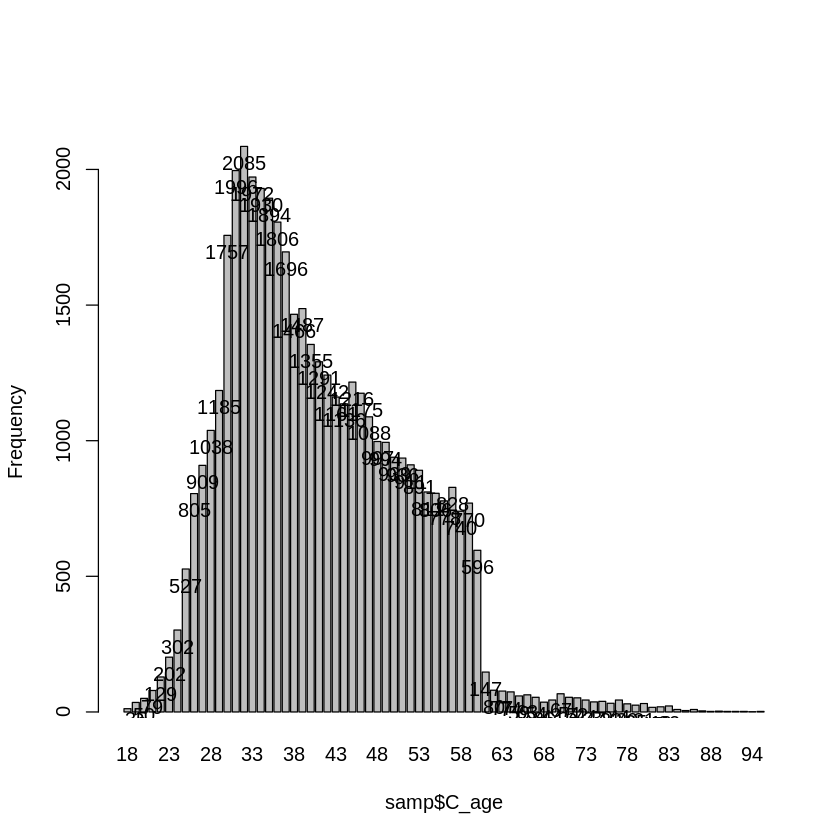

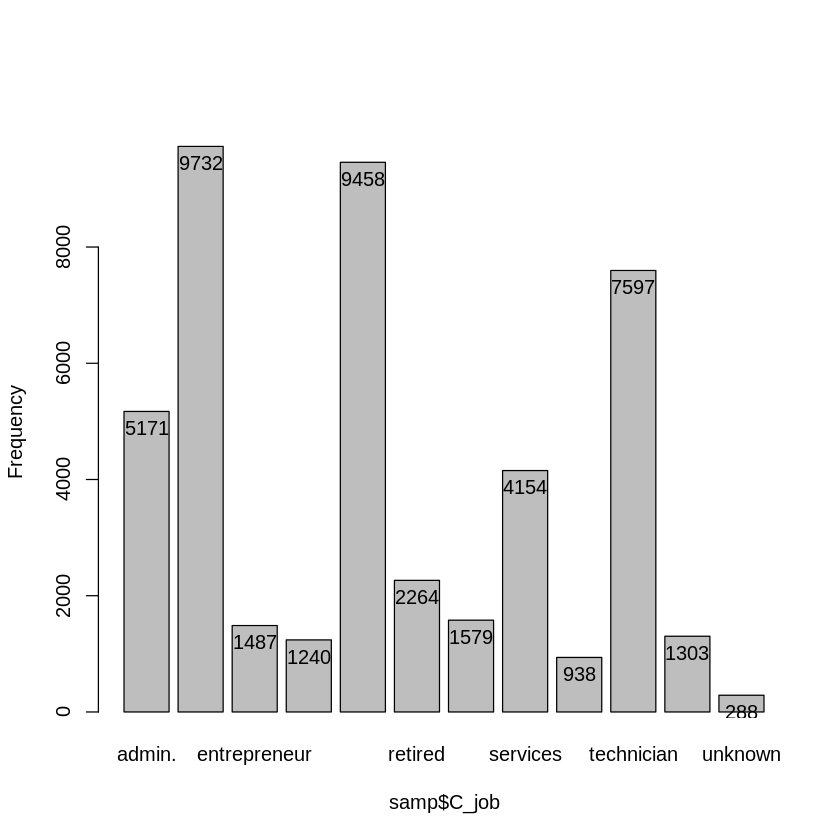

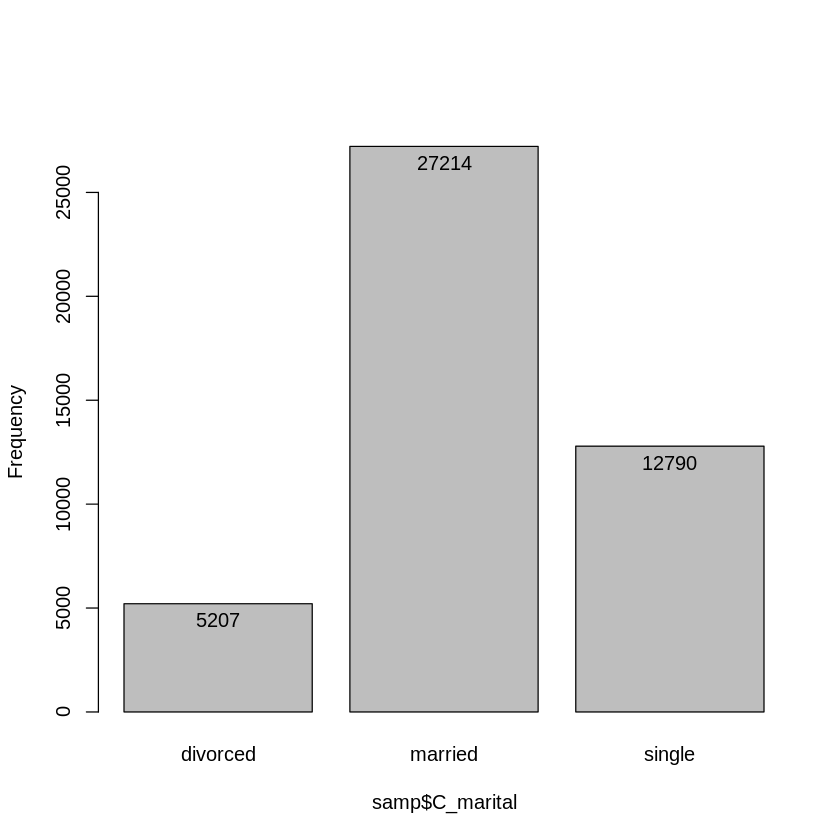

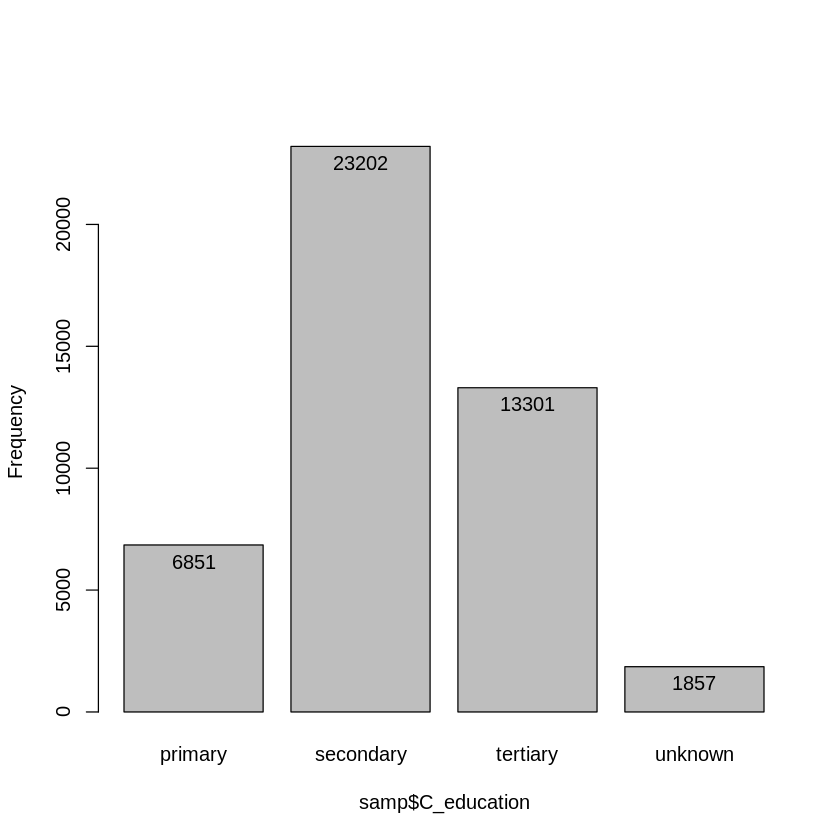

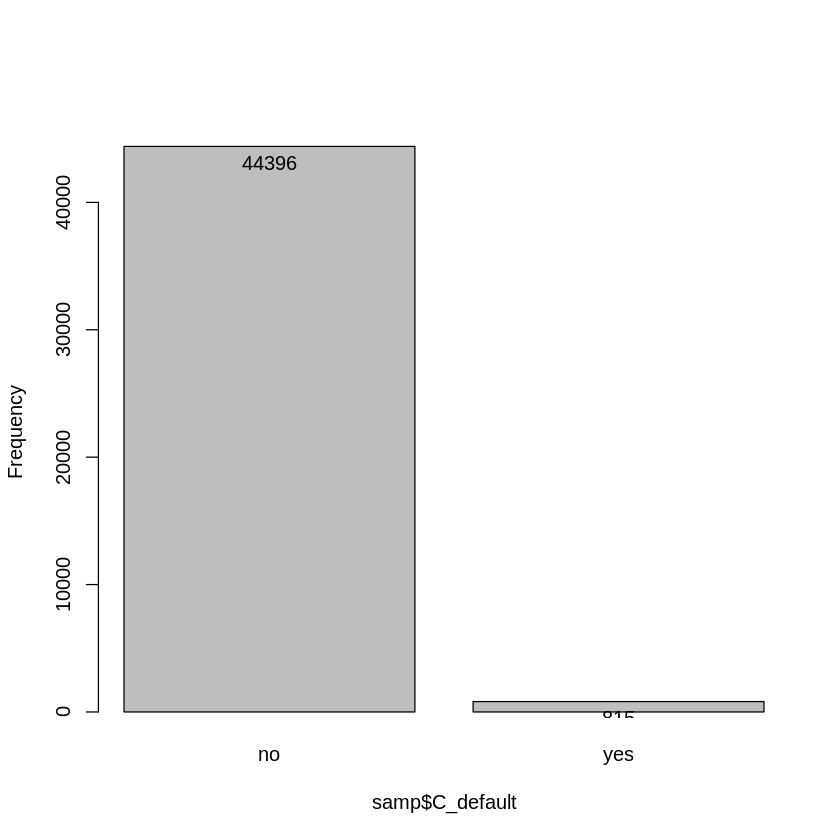

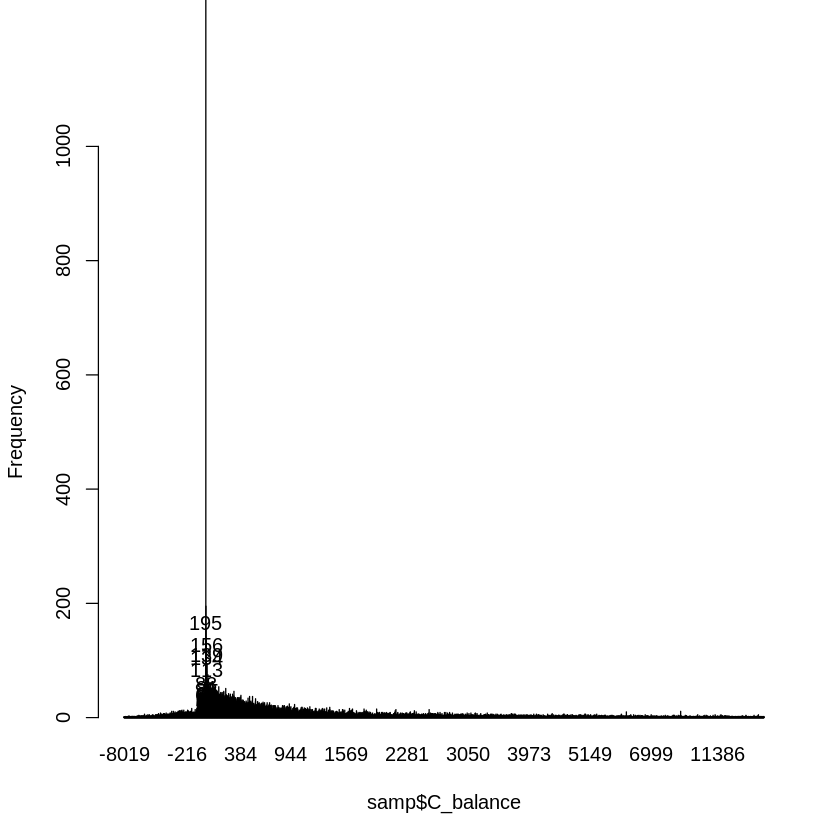

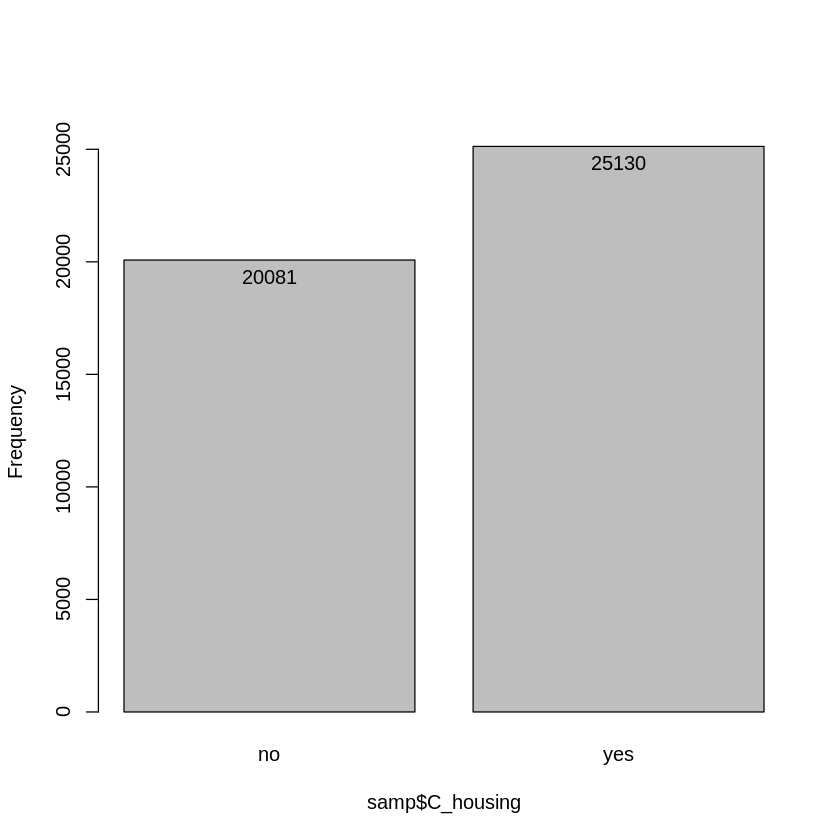

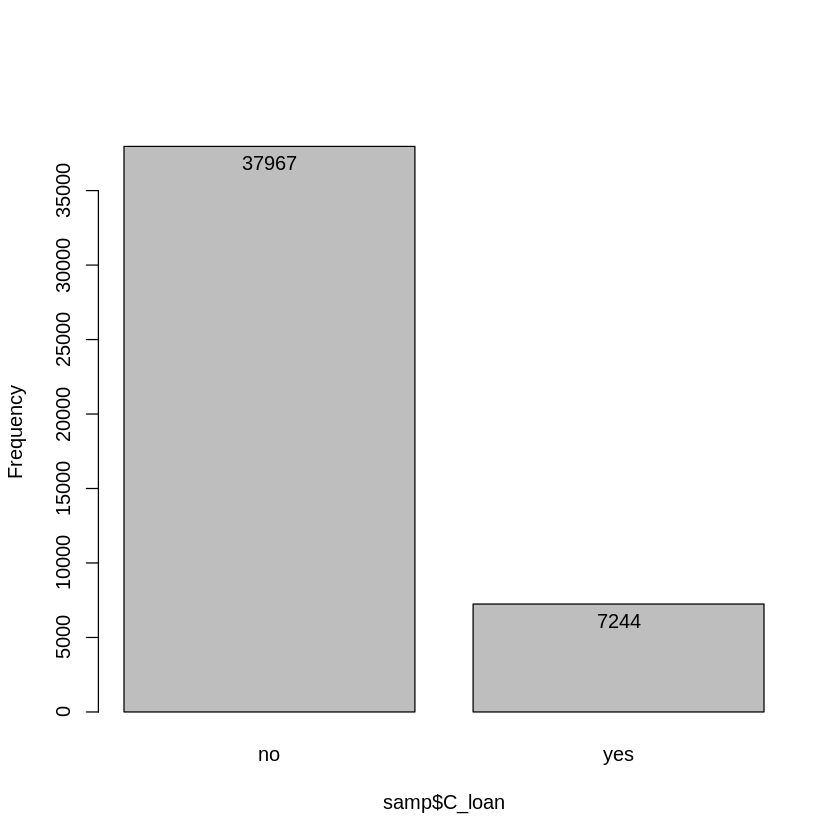

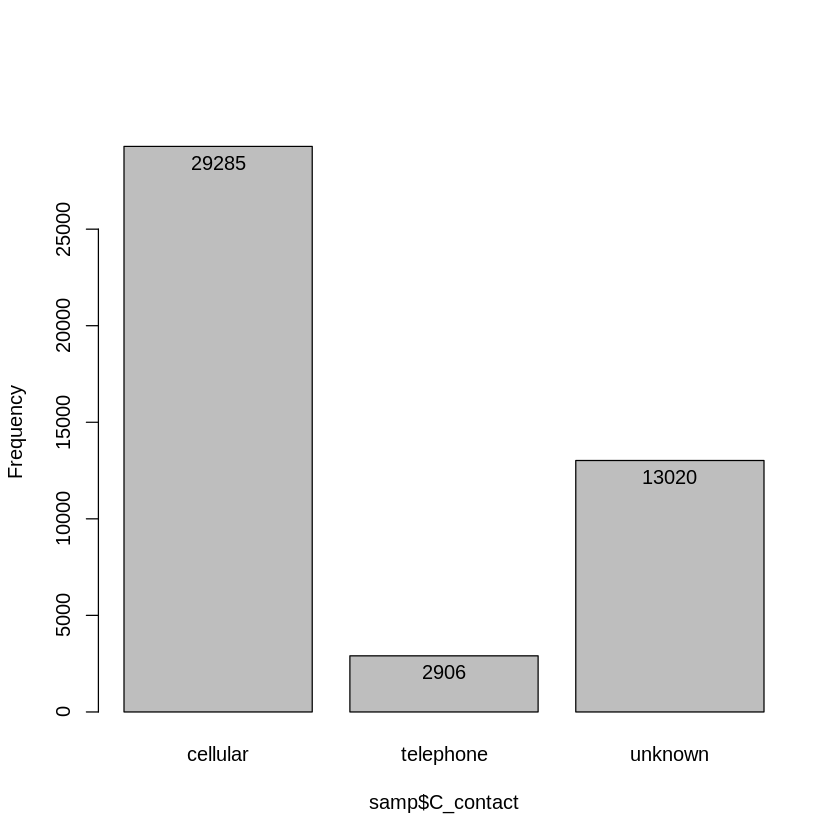

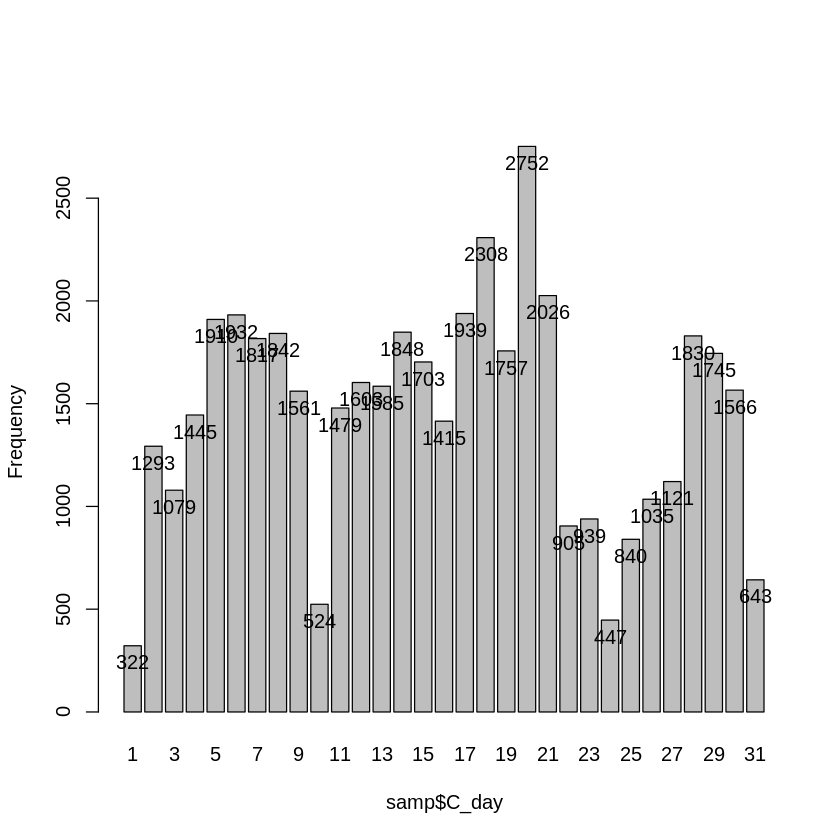

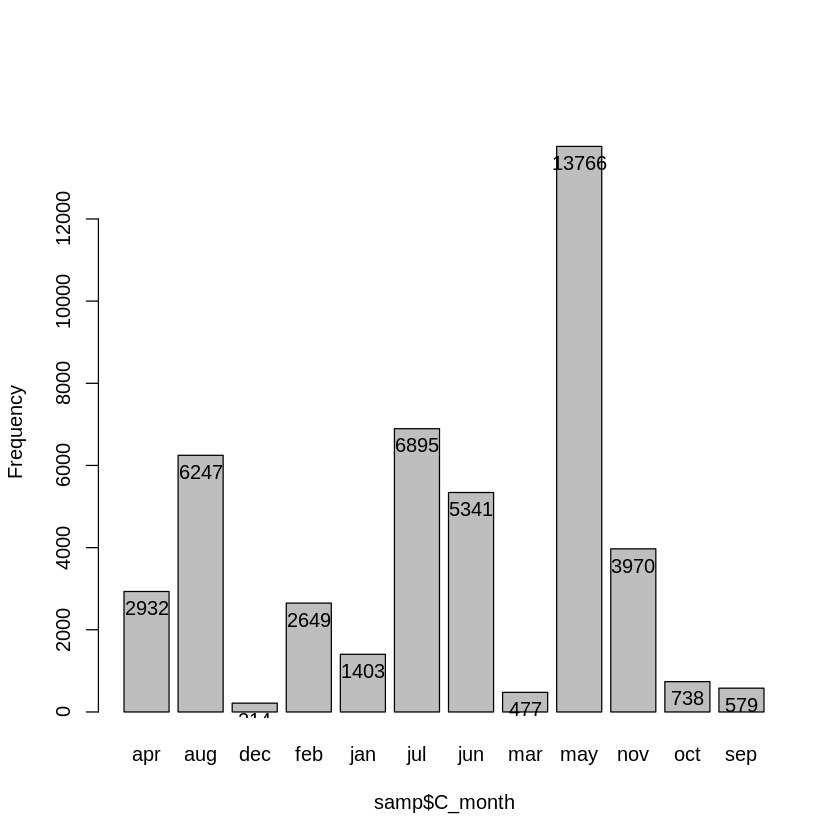

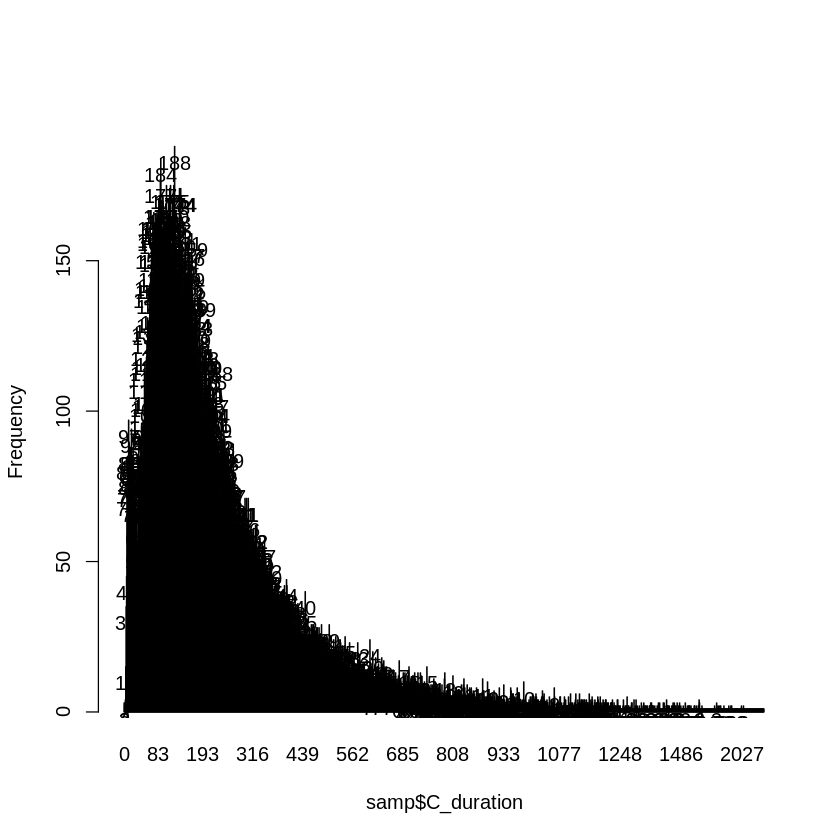

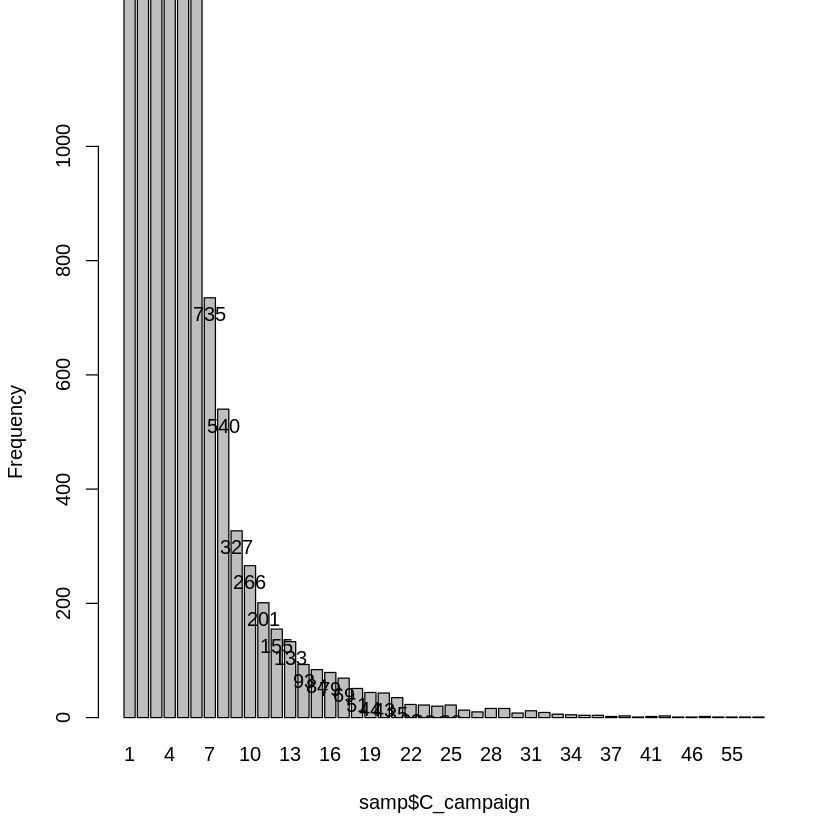

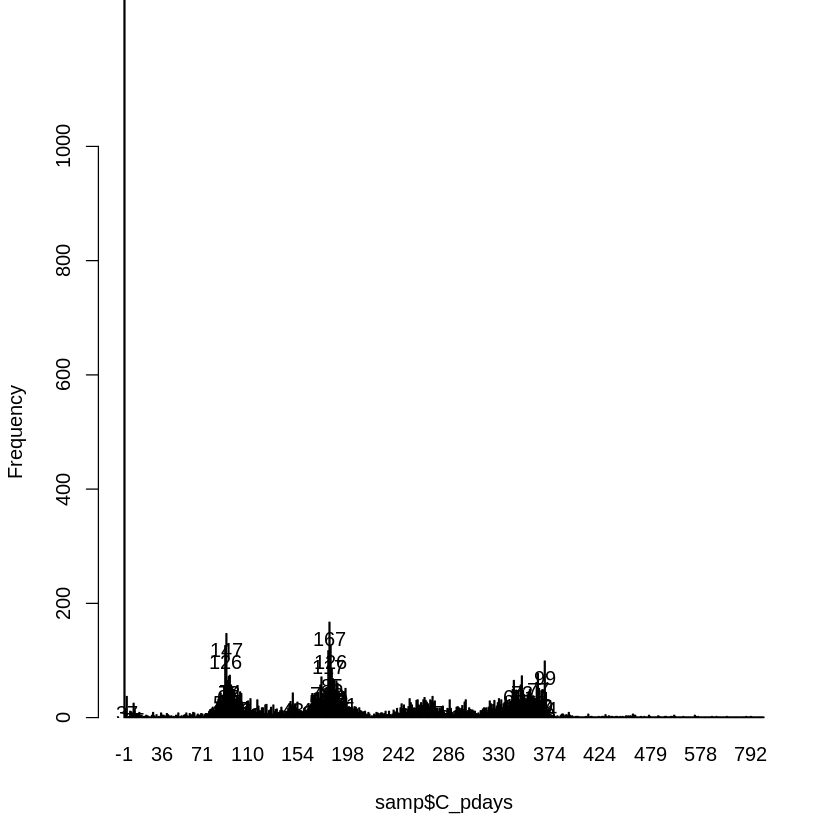

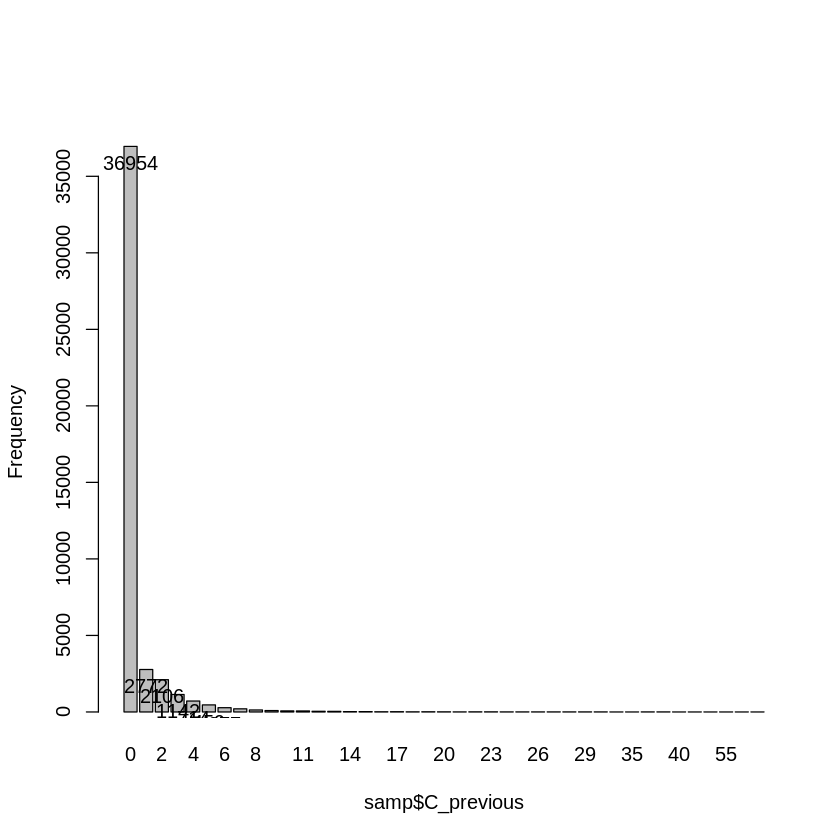

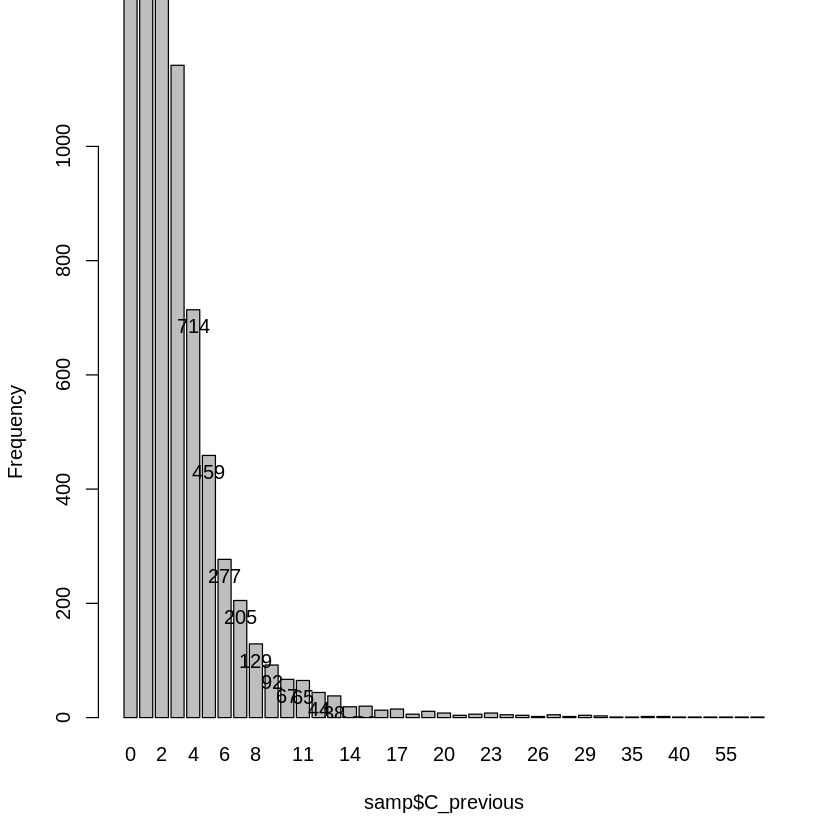

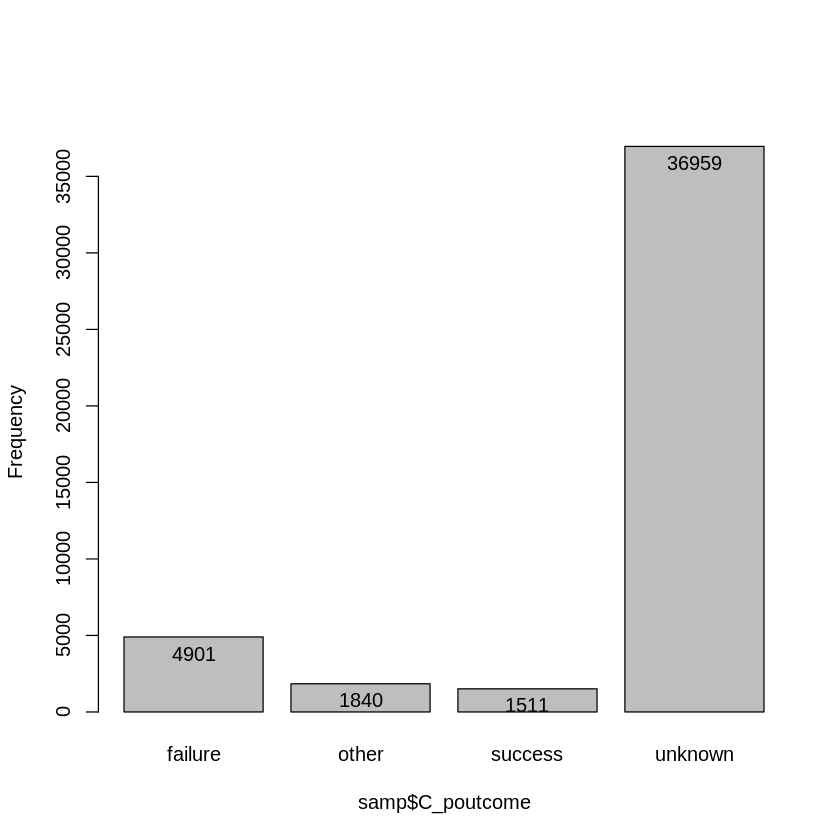

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Start:  AIC=107238.9
yF ~ B_previous * C_poutcome + B_previous * C_month + B_previous * 
    C_day + B_previous * C_contact + B_previous * C_loan + B_previous * 
    C_housing + B_previous * C_education + B_previous * C_marital + 
    B_pdays * C_poutcome + B_pdays * C_month + B_pdays * C_day + 
    B_pdays * C_contact + B_pdays * C_loan + B_pdays * C_housing + 
    B_pdays * C_education + B_pdays * C_marital + B_age + C_marital + 
    C_education + B_balance + C_housing + C_loan + C_contact + 
    C_day + C_month + B_campaign + B_pdays + B_previous + C_poutcome



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitte

                         Df Deviance    AIC
- B_previous:C_day       90     6004   6590
- C_day:B_pdays          90     6012   6598
- C_housing:B_pdays       3     5851   6611
- C_marital:B_pdays       6     5860   6614
- B_previous:C_loan       3     5854   6614
- B_previous:C_contact    6     5873   6627
- B_previous:C_housing    3     5870   6630
- B_previous:C_month     33     5943   6643
- B_previous:C_marital    6    85784  86538
- B_campaign              3    86289  87049
- C_poutcome:B_pdays      6    88523  89277
- C_loan:B_pdays          3    93930  94690
- B_previous:C_education  9   102724 103472
<none>                        106473 107239
- B_balance               3   115268 116028
- C_education:B_pdays     9   115988 116736
- C_month:B_pdays        33   119232 119932
- C_contact:B_pdays       6   127595 128349
- B_previous:C_poutcome   6   129541 130295
- B_age                   3   151816 152576


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6590.11
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- C_day:B_pdays          90   6147.0 6553.0
- B_previous:C_marital    6   6004.8 6578.8
- B_previous:C_poutcome   6   6008.9 6582.9
- C_poutcome:B_pdays      6   6010.9 6584.9
- C_housing:B_pdays       3   6006.6 6586.6
- B_previous:C_housing    3   6006.8 6586.8
- C_marital:B_pdays       6   6015.8 6589.8
<none>                        6004.1 6590.1
- B_previous:C_month     33   6070.9 6590.9
- B_previous:C_loan       3   6011.8 6591.8
- B_previous:C_contact    6   6019.0 6593.0
- C_contact:B_pdays       6   6021.9 6595.9
- C_loan:B_pdays          3   6017.4 6597.4
- B_age                   3   6017.6 6597.6
- B_previous:C_education  9   6030.8 6598.8
- C_education:B_pdays     9   6038.6 6606.6
- B_campaign              3   6030.0 6610.0
- B_balance               3   6040.7 6620.7
- C_month:B_pdays        33   6102.7 6622.7


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6553.02
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- B_previous:C_marital    6   6148.5 6542.5
- B_previous:C_month     33   6203.1 6543.1
- B_previous:C_poutcome   6   6151.0 6545.0
- C_poutcome:B_pdays      6   6154.7 6548.7
- C_housing:B_pdays       3   6149.5 6549.5
- B_previous:C_housing    3   6150.5 6550.5
- C_marital:B_pdays       6   6159.0 6553.0
<none>                        6147.0 6553.0
- B_previous:C_contact    6   6161.1 6555.1
- B_previous:C_loan       3   6155.4 6555.4
- C_day                  30   6209.5 6555.5
- C_education:B_pdays     9   6170.1 6558.1
- C_loan:B_pdays          3   6159.2 6559.2
- B_age                   3   6162.0 6562.0
- C_contact:B_pdays       6   6170.5 6564.5
- B_previous:C_education  9   6177.8 6565.8
- B_campaign              3   6172.4 6572.4
- C_month:B_pdays        33   6235.8 6575.8
- B_balance               3   6184.9 6584.9


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6542.47
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + C_poutcome:B_pdays + 
    C_month:B_pdays + C_contact:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- B_previous:C_month     33   6205.3 6533.3
- B_previous:C_poutcome   6   6152.3 6534.3
- C_poutcome:B_pdays      6   6155.8 6537.8
- C_housing:B_pdays       3   6150.9 6538.9
- B_previous:C_housing    3   6151.8 6539.8
<none>                        6148.5 6542.5
- C_marital:B_pdays       6   6161.4 6543.4
- C_day                  30   6210.5 6544.5
- B_previous:C_loan       3   6156.8 6544.8
- B_previous:C_contact    6   6163.0 6545.0
- C_education:B_pdays     9   6171.4 6547.4
- C_loan:B_pdays          3   6160.6 6548.6
- B_age                   3   6163.2 6551.2
- C_contact:B_pdays       6   6173.1 6555.1
- B_previous:C_education  9   6179.7 6555.7
- B_campaign              3   6173.9 6561.9
- C_month:B_pdays        33   6238.0 6566.0
- B_balance               3   6186.2 6574.2


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6533.3
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_poutcome + 
    B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + C_poutcome:B_pdays + C_month:B_pdays + 
    C_contact:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- B_previous:C_poutcome   6   6208.8 6524.8
- C_poutcome:B_pdays      6   6214.6 6530.6
- C_housing:B_pdays       3   6209.4 6531.4
- B_previous:C_housing    3   6209.5 6531.5
- C_day                  30   6264.3 6532.3
<none>                        6205.3 6533.3
- C_marital:B_pdays       6   6218.0 6534.0
- B_previous:C_contact    6   6219.6 6535.6
- B_previous:C_loan       3   6215.2 6537.2
- C_education:B_pdays     9   6227.6 6537.6
- C_loan:B_pdays          3   6217.1 6539.1
- B_age                   3   6221.1 6543.1
- C_contact:B_pdays       6   6227.2 6543.2
- B_previous:C_education  9   6234.7 6544.7
- B_campaign              3   6230.3 6552.3
- C_month:B_pdays        33   6291.3 6553.3
- B_balance               3   6242.7 6564.7


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6524.79
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + C_poutcome:B_pdays + 
    C_month:B_pdays + C_contact:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- C_housing:B_pdays       3   6212.2 6522.2
- B_previous:C_housing    3   6212.4 6522.4
- C_poutcome:B_pdays      8   6222.4 6522.4
- C_day                  30   6268.0 6524.0
<none>                        6208.8 6524.8
- C_marital:B_pdays       6   6221.1 6525.1
- B_previous:C_contact    6   6222.9 6526.9
- B_previous:C_loan       3   6218.6 6528.6
- C_education:B_pdays     9   6230.7 6528.7
- C_loan:B_pdays          3   6220.2 6530.2
- B_age                   3   6224.1 6534.1
- C_contact:B_pdays       6   6230.2 6534.2
- B_previous:C_education  9   6240.8 6538.8
- B_campaign              3   6233.8 6543.8
- C_month:B_pdays        33   6294.4 6544.4
- B_balance               3   6246.4 6556.4


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6522.2
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + C_poutcome:B_pdays + 
    C_month:B_pdays + C_contact:B_pdays + C_loan:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- C_poutcome:B_pdays      8   6225.9 6519.9
- C_day                  30   6271.1 6521.1
- C_marital:B_pdays       6   6224.1 6522.1
<none>                        6212.2 6522.2
- B_previous:C_contact    6   6226.3 6524.3
- B_previous:C_housing    3   6220.3 6524.3
- B_previous:C_loan       3   6222.1 6526.1
- C_education:B_pdays     9   6234.3 6526.3
- C_loan:B_pdays          3   6222.8 6526.8
- B_age                   3   6227.1 6531.1
- C_contact:B_pdays       6   6234.0 6532.0
- B_previous:C_education  9   6243.9 6535.9
- B_campaign              3   6237.7 6541.7
- C_month:B_pdays        33   6306.8 6550.8
- B_balance               3   6250.0 6554.0


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6519.88
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + C_month:B_pdays + 
    C_contact:B_pdays + C_loan:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- C_day                  30   6285.1 6519.1
- C_marital:B_pdays       6   6237.6 6519.6
<none>                        6225.9 6519.9
- B_previous:C_contact    6   6239.6 6521.6
- B_previous:C_housing    3   6234.1 6522.1
- B_previous:C_loan       3   6235.4 6523.4
- C_loan:B_pdays          3   6236.6 6524.6
- C_education:B_pdays     9   6249.0 6525.0
- B_age                   3   6241.6 6529.6
- C_contact:B_pdays       6   6248.7 6530.7
- B_previous:C_education  9   6258.4 6534.4
- B_campaign              3   6251.9 6539.9
- C_month:B_pdays        33   6322.3 6550.3
- B_balance               3   6264.3 6552.3
- C_poutcome              3   6381.4 6669.4


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6519.13
yF ~ B_previous + C_poutcome + C_month + C_contact + C_loan + 
    C_housing + C_education + C_marital + B_pdays + B_age + B_balance + 
    B_campaign + B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + C_month:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_education:B_pdays + C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- C_marital:B_pdays       6   6296.2 6518.2
<none>                        6285.1 6519.1
- B_previous:C_housing    3   6293.2 6521.2
- B_previous:C_contact    6   6299.9 6521.9
- B_previous:C_loan       3   6294.7 6522.7
- C_loan:B_pdays          3   6295.3 6523.3
- C_education:B_pdays     9   6308.9 6524.9
- B_age                   3   6301.7 6529.7
- C_contact:B_pdays       6   6309.2 6531.2
- B_previous:C_education  9   6319.5 6535.5
- B_campaign              3   6313.6 6541.6
- C_month:B_pdays        33   6381.8 6549.8
- B_balance               3   6325.1 6553.1
- C_poutcome              3   6450.6 6678.6


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6518.19
yF ~ B_previous + C_poutcome + C_month + C_contact + C_loan + 
    C_housing + C_education + C_marital + B_pdays + B_age + B_balance + 
    B_campaign + B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + C_month:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_education:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
<none>                        6296.2 6518.2
- B_previous:C_housing    3   6304.5 6520.5
- B_previous:C_contact    6   6310.7 6520.7
- C_loan:B_pdays          3   6305.5 6521.5
- B_previous:C_loan       3   6305.8 6521.8
- C_education:B_pdays     9   6317.8 6521.8
- B_age                   3   6313.2 6529.2
- C_contact:B_pdays       6   6319.9 6529.9
- B_previous:C_education  9   6331.8 6535.8
- B_campaign              3   6325.3 6541.3
- C_month:B_pdays        33   6391.7 6547.7
- C_marital               2   6333.0 6551.0
- B_balance               3   6336.1 6552.1
- C_poutcome              3   6462.7 6678.7


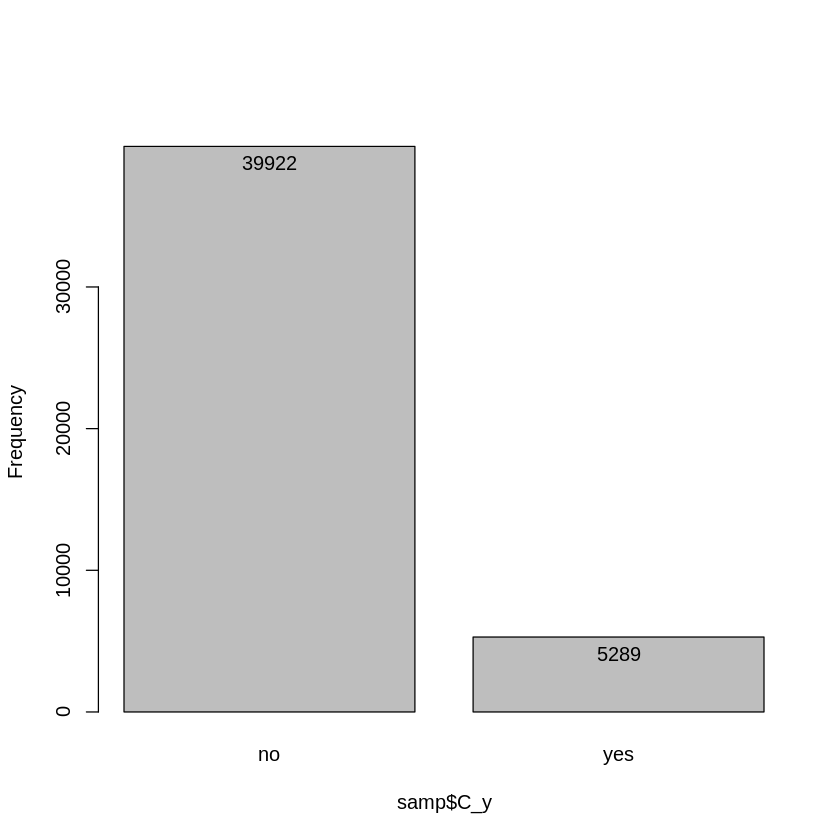

In [ ]:
# library(Boruta)
library(dplyr)
library(ROCR)
library(splines)
library(stringr)

samp <-
  read.table("https://raw.githubusercontent.com/f11828my/Internalmeasures/main/bank-full.csv",
                  header=TRUE, stringsAsFactors=TRUE, sep=";", na.strings="NA", dec=".",
             strip.white=TRUE)

head(samp)

#カテゴリ化
samp$C_age <- as.factor(samp$age)
samp$C_job <- as.factor(samp$job)
samp$C_marital <- as.factor(samp$marital)
samp$C_education <- as.factor(samp$education)
samp$C_default <- as.factor(samp$default)
samp$C_balance <- as.factor(samp$balance)
samp$C_housing <- as.factor(samp$housing)
samp$C_loan<- as.factor(samp$loan)
samp$C_contact <- as.factor(samp$contact)
samp$C_day <- as.factor(samp$day)
samp$C_month <- as.factor(samp$month)
samp$C_duration <- as.factor(samp$duration)
samp$C_campaign <- as.factor(samp$campaign)
samp$C_pdays <- as.factor(samp$pdays)
samp$C_previous <- as.factor(samp$previous)
samp$C_poutcome <- as.factor(samp$poutcome)
samp$C_y <- as.factor(samp$y)

#目的変数をフラグに
samp$yF <- if_else(samp$y == "yes",1,0)
samp$Ｃ_yF <- as.factor(samp$yF)

#ヒストグラム
Barplot(samp$C_age, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_job, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_marital, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_education, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_default, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_balance,ylim=c(0,1000), ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_housing, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_loan, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_contact, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_day, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_month, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_duration, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_campaign,ylim=c(0,1000), ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_pdays,ylim=c(0,1000) ,ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_previous,ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_previous, ylim=c(0,1000),ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_poutcome, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_y, ylab="Frequency", label.bars=TRUE)


#連続値調整
samp[samp$age>60,]$age <-61
samp[samp$balance<0,]$balance <- -1
samp[samp$balance>10000,]$balance <-10001
samp[samp$campaign>20,]$campaign<-21
samp[samp$pdays>400,]$pdays<-401
samp[samp$previous>10,]$previous<-11

#平滑化
i<-3
B_age<-bs(samp$age,df=i)
B_balance<-bs(samp$balance,df=i)
B_duration<-bs(samp$duration,df=i)
B_campaign<-bs(samp$campaign,df=i)
B_pdays<-bs(samp$pdays,df=i)
B_previous<-bs(samp$previous,df=i)

samp$B_age<-B_age
samp$B_balance<-B_balance
samp$B_duration<-B_duration
samp$B_campaign<-B_campaign
samp$B_pdays<-B_pdays
samp$B_previous<-B_previous



#サンプリング
set.seed(3)
samp50 <- samp %>% sample_frac(0.25)



#全部の組み合わせの変数作成
crossstring <-"B_age + C_marital+ C_education + B_balance + C_housing + C_loan + C_contact + C_day + C_month + B_campaign + B_pdays + B_previous + C_poutcome"

for (i in 4:5) {
  for (j in 1:8) {
    w <- str_flatten(c(switch(i,               # 指定された条件
                              "1"  = ("B_age"),
                              "2"  = ("B_balance"),
                              "3"  = ("B_campaign"),
                              "4" = ("B_pdays"),
                              "5" = ("B_previous"))
                       ,
                       switch(j,               # 指定された条件
                              "1"  = ("C_marital"),
                              "2"  = ("C_education"),
                              "3"  = ("C_housing"),
                              "4" = ("C_loan"),
                              "5" = ("C_contact"),
                              "6" = ("C_day"),
                              "7" = ("C_month"),
                              "8" = ("C_poutcome")))," * ")

    crossstring <- str_flatten(c(w,crossstring)," + ") }
}




#モデル_組み合わせ全部
P_model3 <- glm(paste("yF ~",crossstring, sep="")
                ,data=samp50,family=binomial(link=logit))

#ステップワイズ
step.P_model3 <- step(P_model3)
summaryStep.P_model3 <- summary(step.P_model3)

#ステップワイズ結果
coef <- summaryStep.P_model3$coefficients
r.squared <- summaryStep.P_model3$r.squared
adj.r.squared <- summaryStep.P_model3$adj.r.squared
resultTable <- cbind(coef, r.squared = r.squared, adj.r.squared = adj.r.squared)

write.csv(resultTable, "/content/ステップワイズ法（ロジスティック回帰分析）_アルゴリズム確認.csv")


# ９．アルゴリズム確認用_こぴー
Google ColabのアルゴリズムとRのアルゴリズムが一致してるか確認する


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


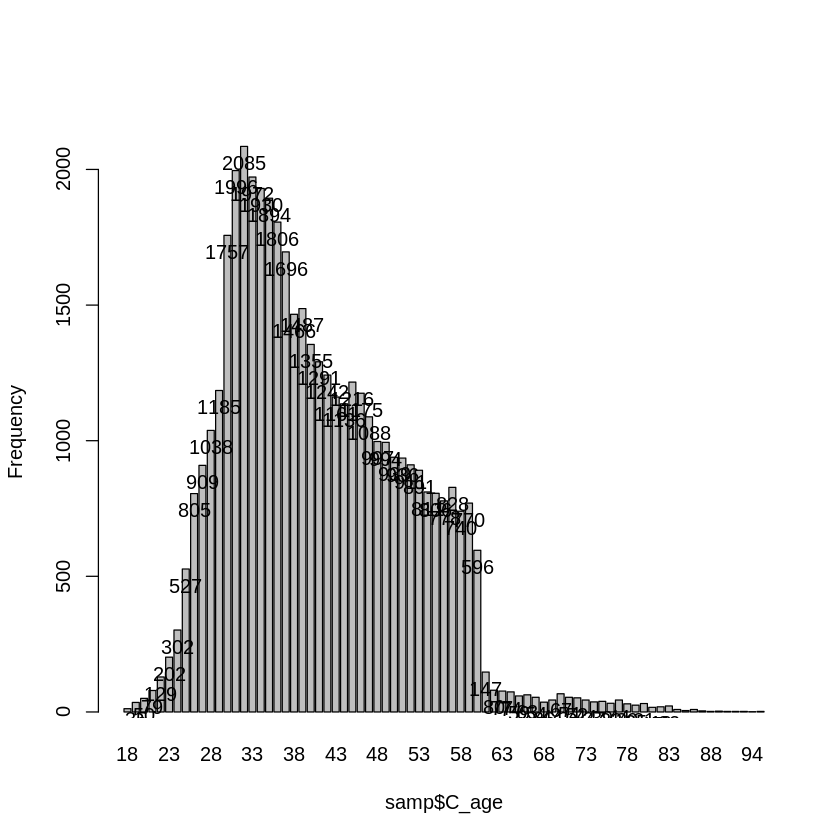

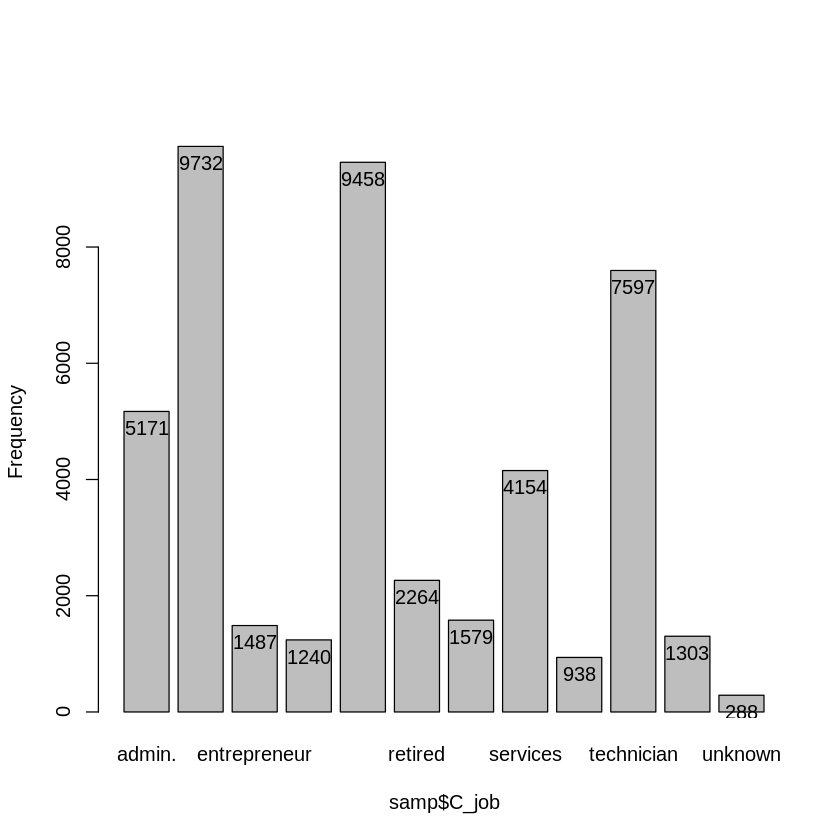

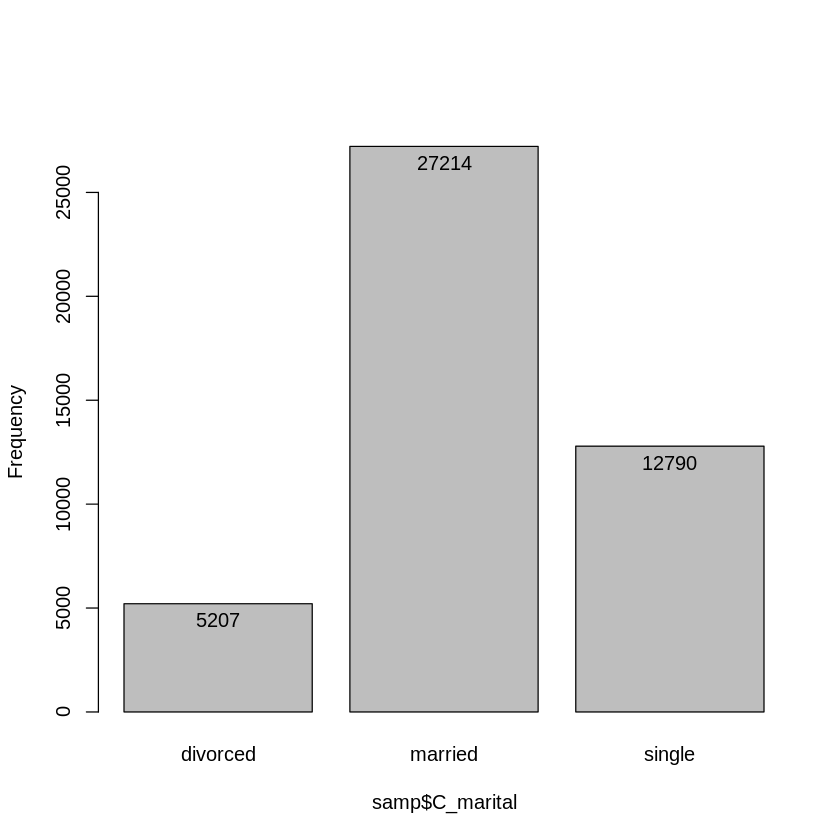

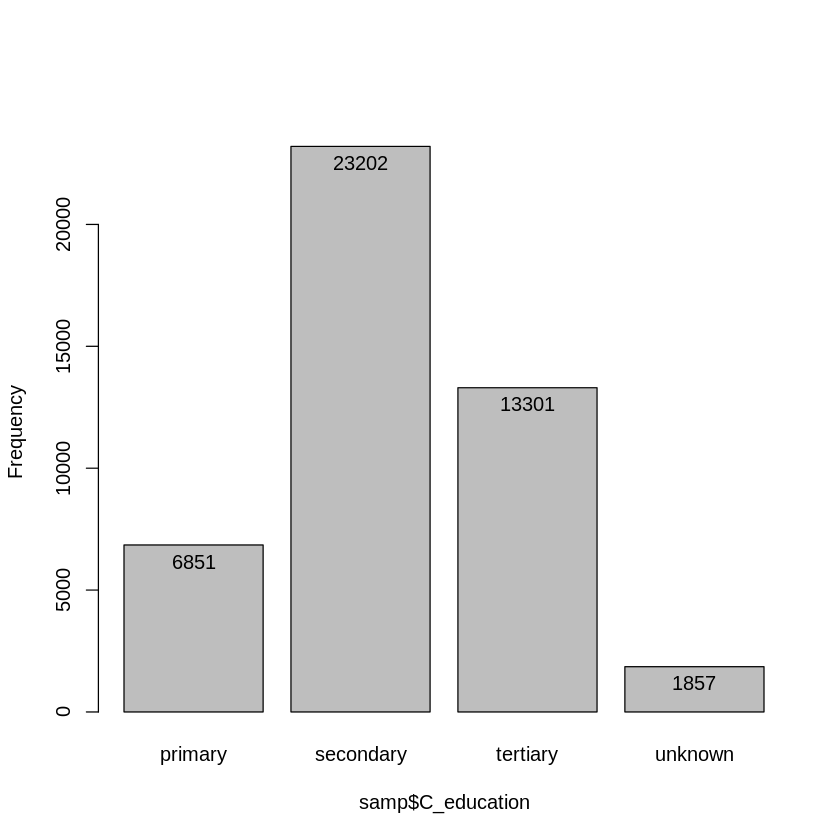

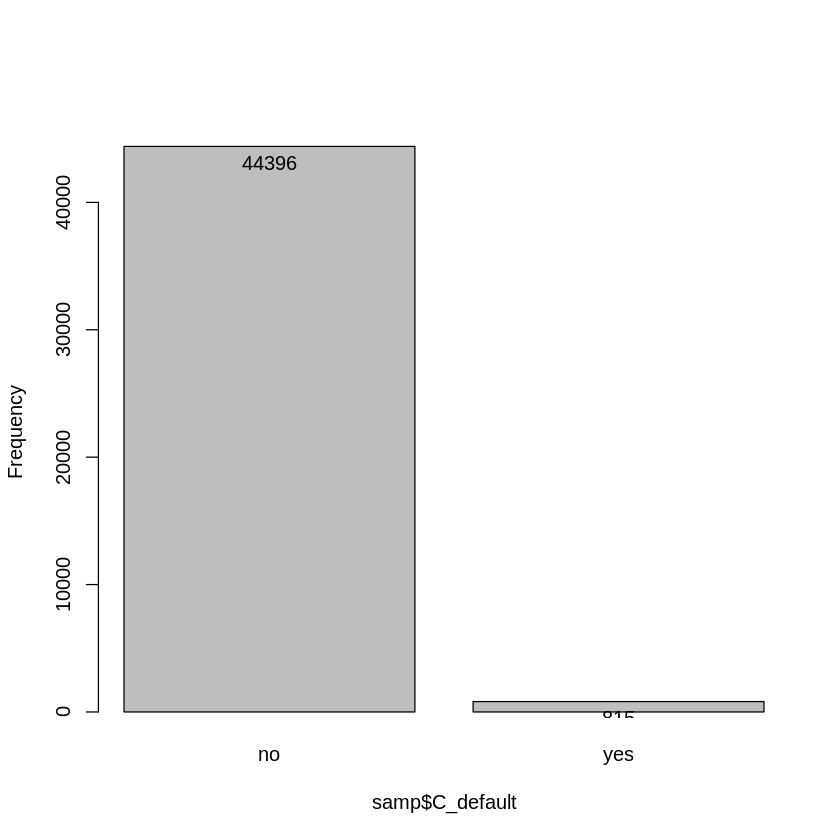

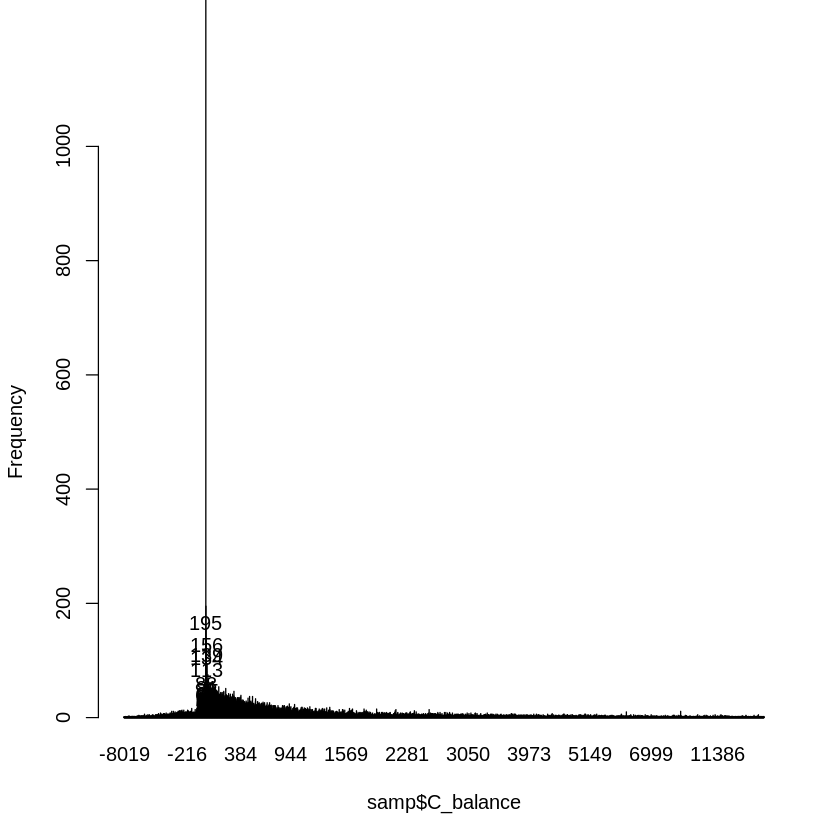

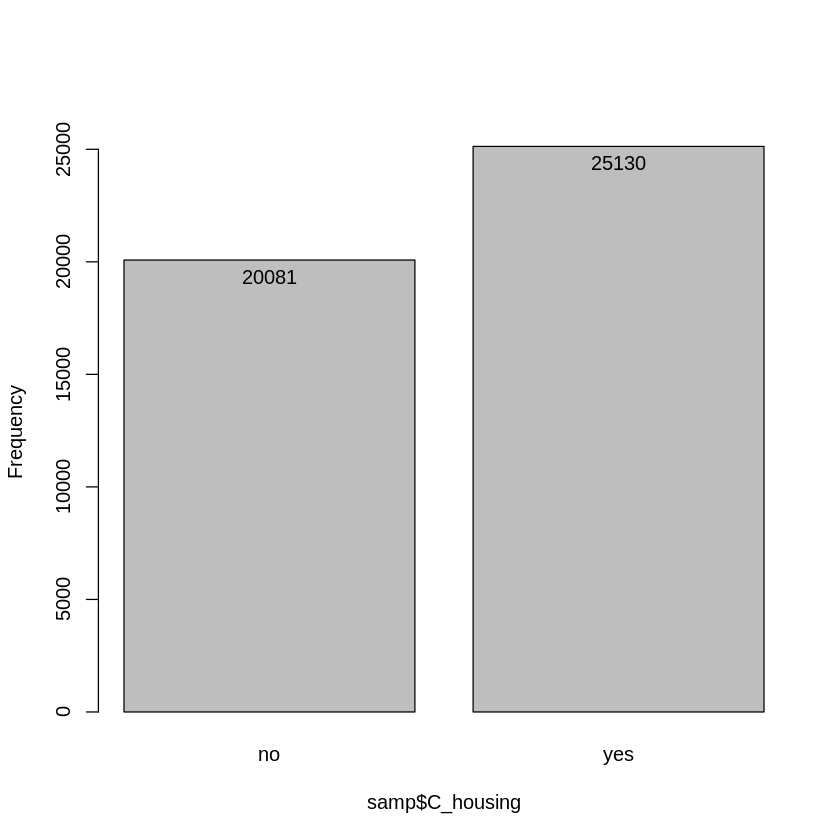

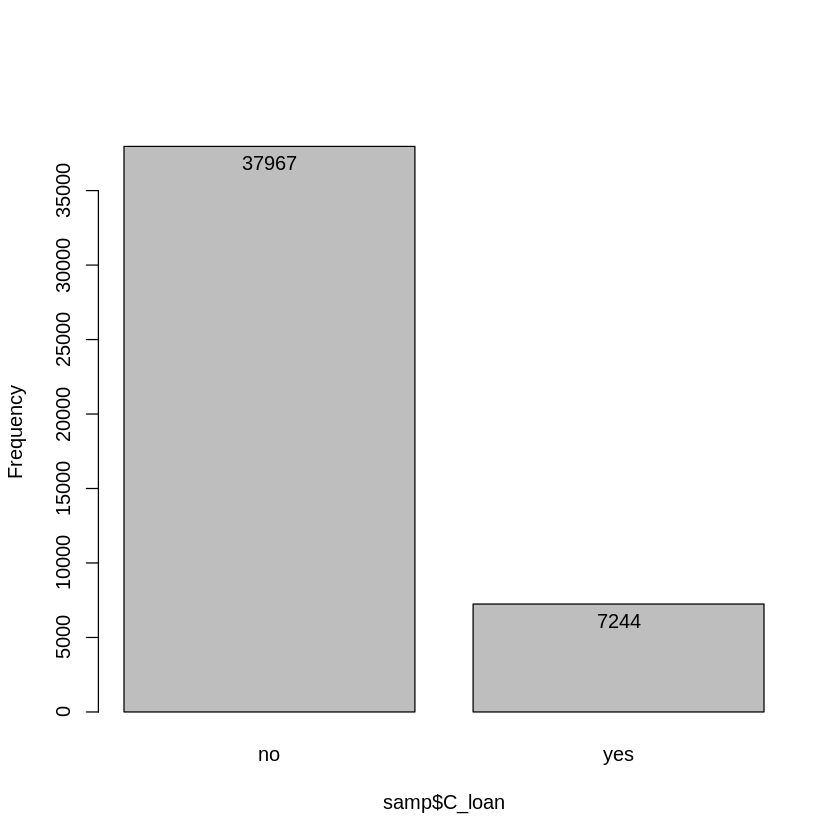

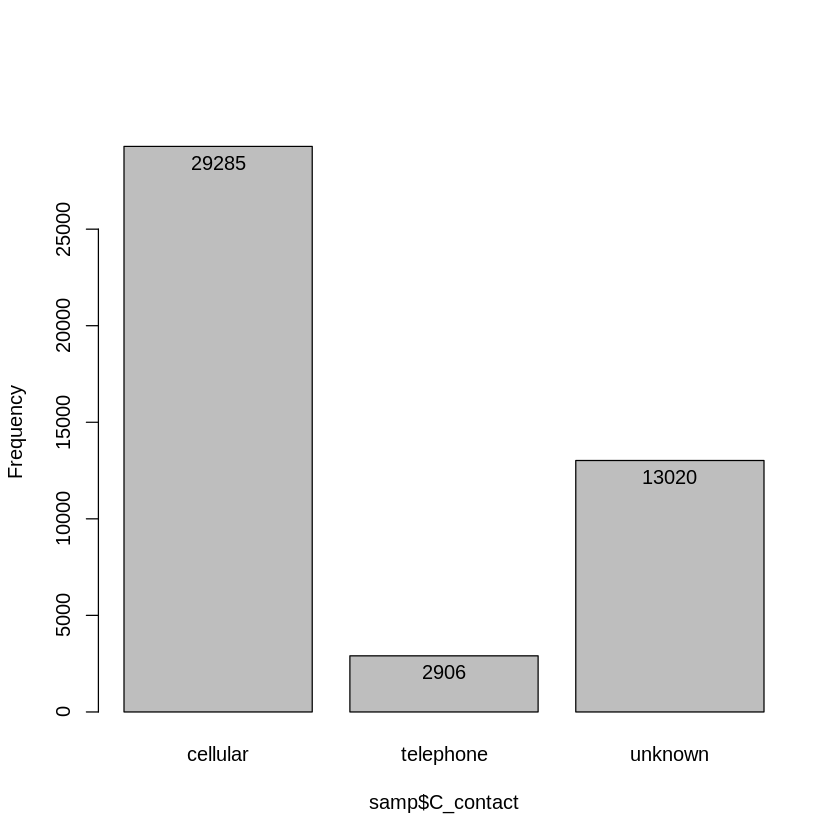

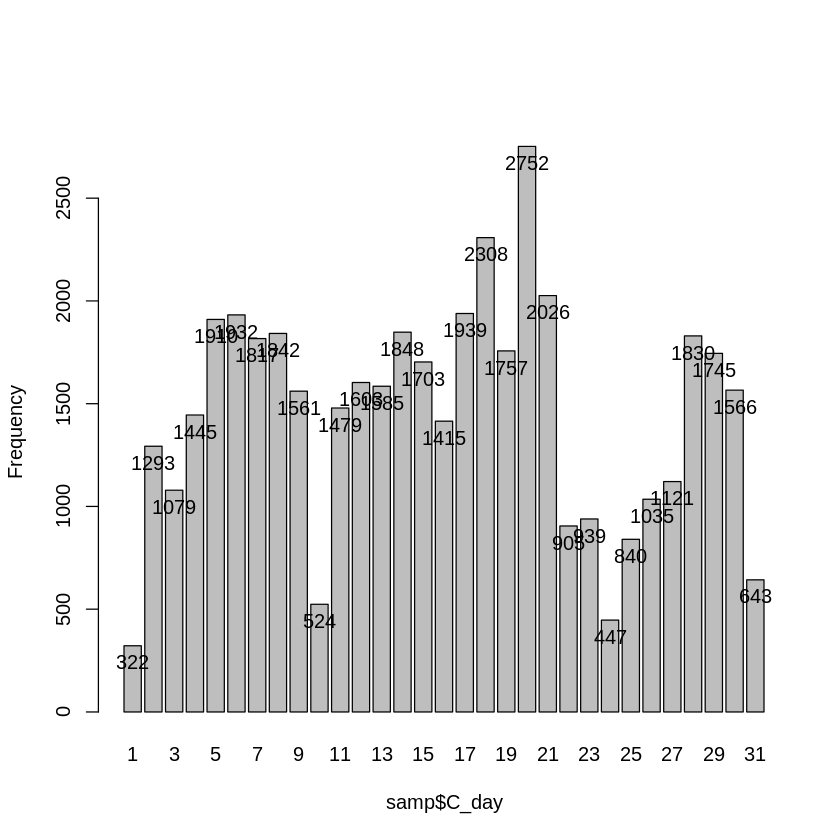

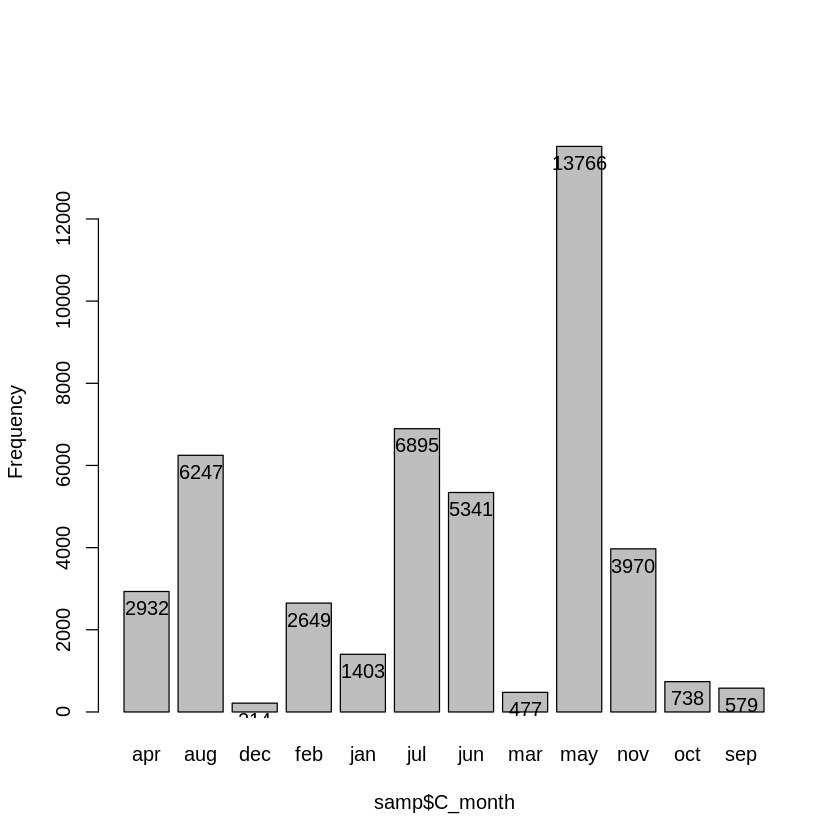

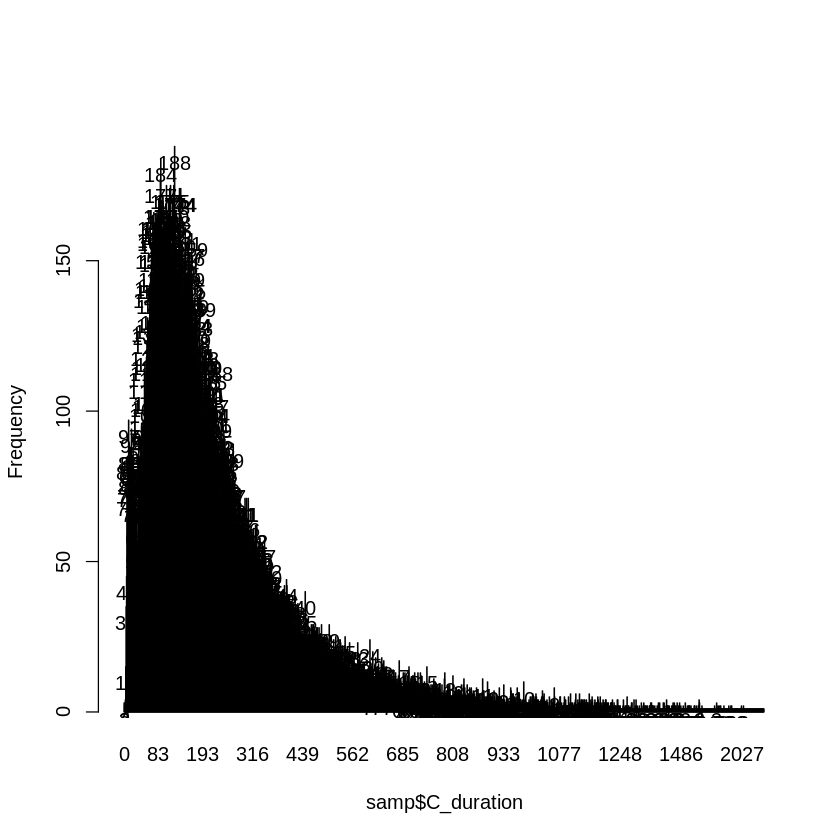

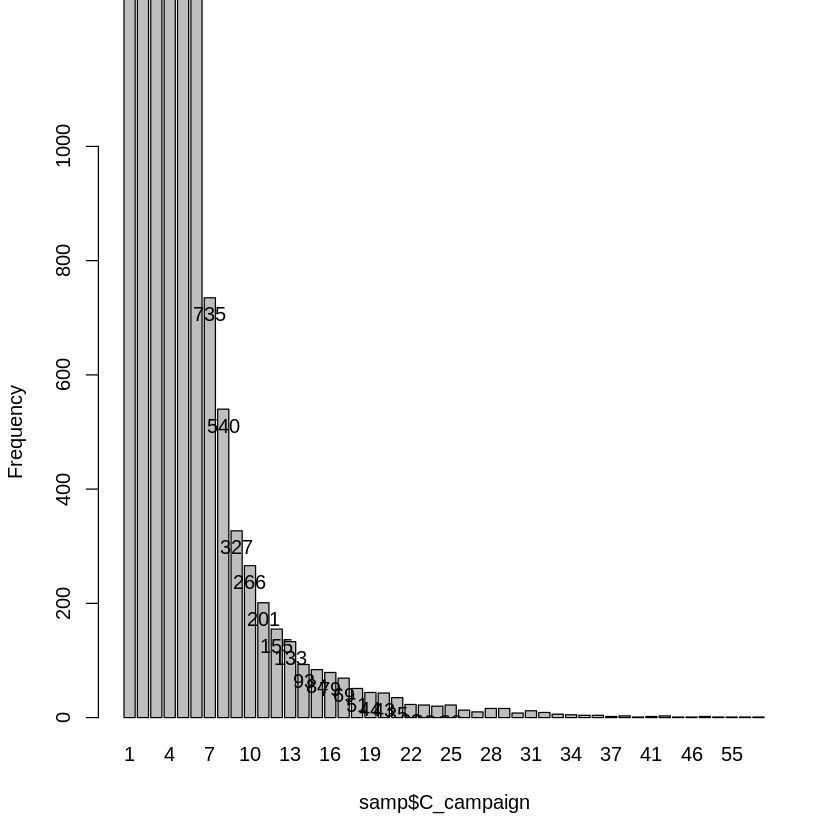

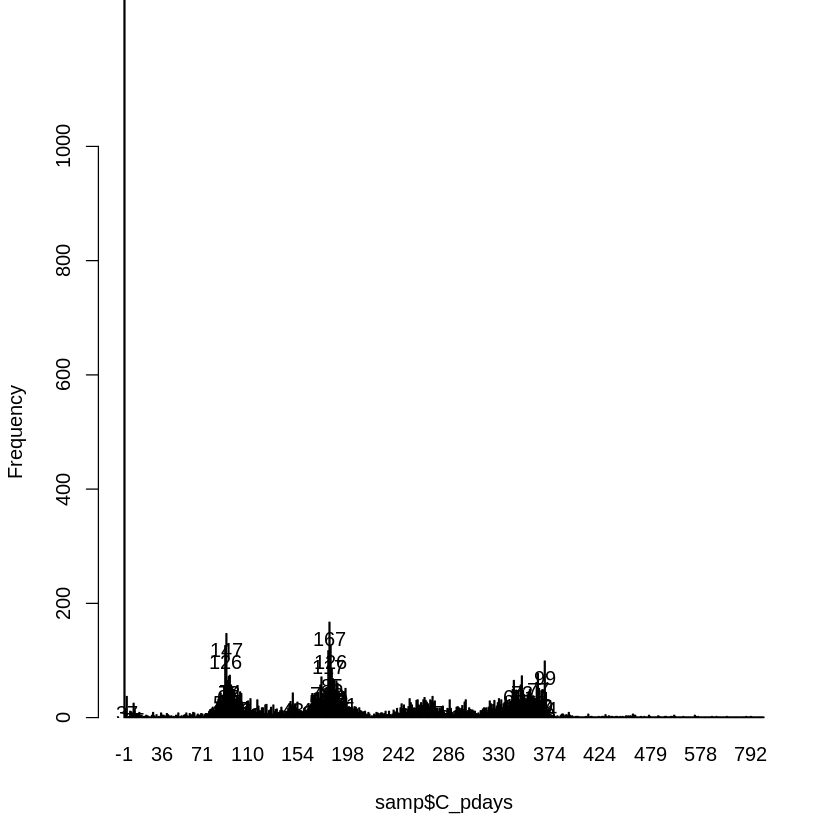

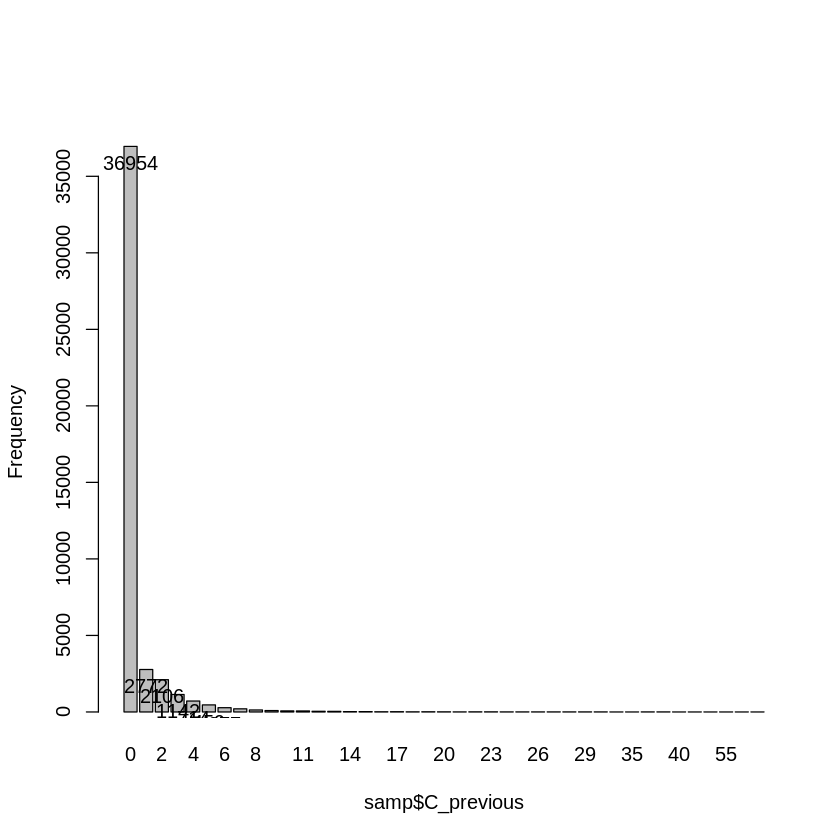

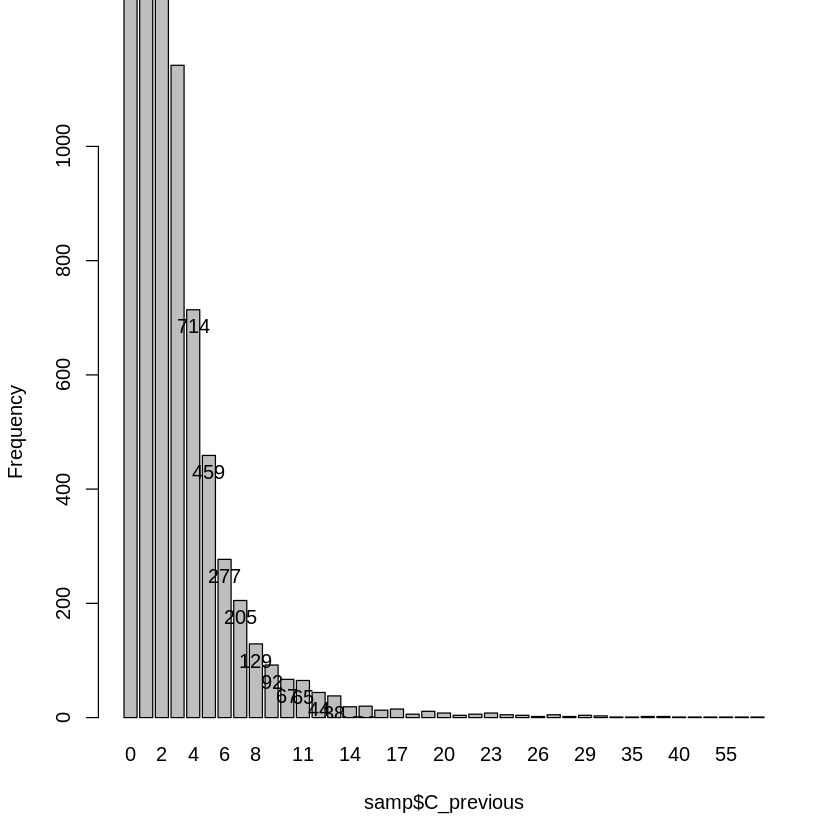

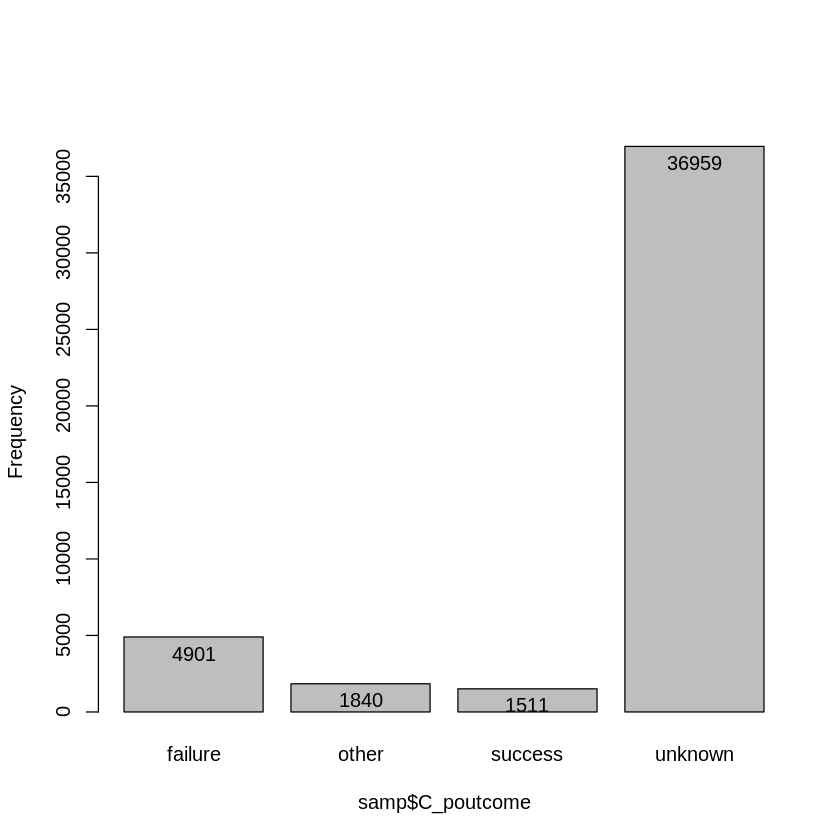

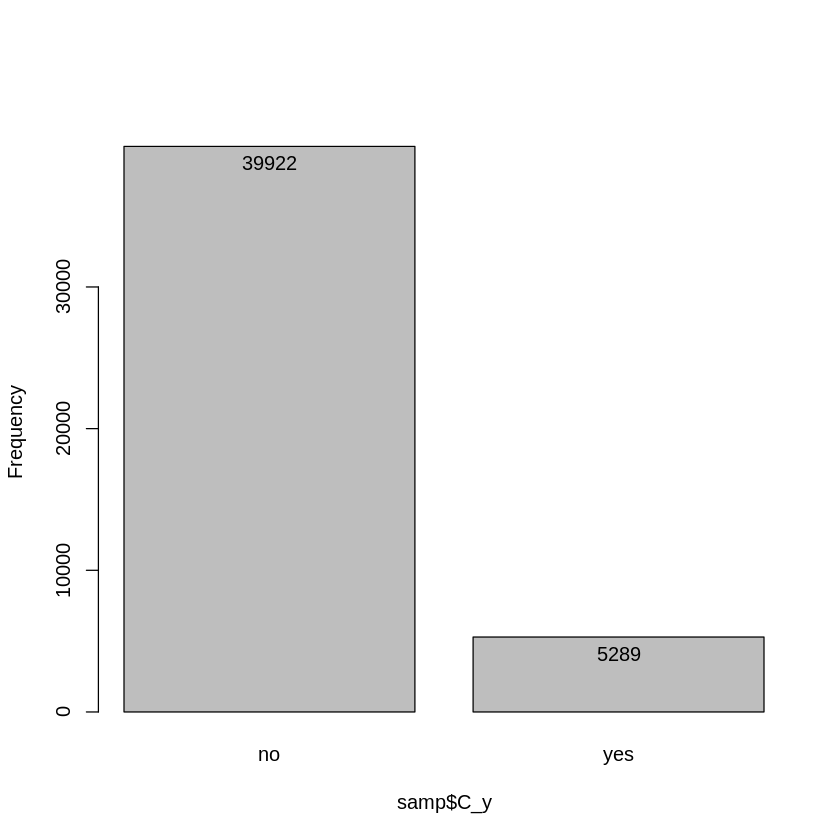

In [ ]:
# library(Boruta)
library(dplyr)
library(ROCR)
library(splines)
library(stringr)

samp <-
  read.table("https://raw.githubusercontent.com/f11828my/Internalmeasures/main/bank-full.csv",
                  header=TRUE, stringsAsFactors=TRUE, sep=";", na.strings="NA", dec=".",
             strip.white=TRUE)

head(samp)

#カテゴリ化
samp$C_age <- as.factor(samp$age)
samp$C_job <- as.factor(samp$job)
samp$C_marital <- as.factor(samp$marital)
samp$C_education <- as.factor(samp$education)
samp$C_default <- as.factor(samp$default)
samp$C_balance <- as.factor(samp$balance)
samp$C_housing <- as.factor(samp$housing)
samp$C_loan<- as.factor(samp$loan)
samp$C_contact <- as.factor(samp$contact)
samp$C_day <- as.factor(samp$day)
samp$C_month <- as.factor(samp$month)
samp$C_duration <- as.factor(samp$duration)
samp$C_campaign <- as.factor(samp$campaign)
samp$C_pdays <- as.factor(samp$pdays)
samp$C_previous <- as.factor(samp$previous)
samp$C_poutcome <- as.factor(samp$poutcome)
samp$C_y <- as.factor(samp$y)

#目的変数をフラグに
samp$yF <- if_else(samp$y == "yes",1,0)
samp$Ｃ_yF <- as.factor(samp$yF)

#ヒストグラム
Barplot(samp$C_age, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_job, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_marital, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_education, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_default, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_balance,ylim=c(0,1000), ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_housing, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_loan, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_contact, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_day, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_month, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_duration, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_campaign,ylim=c(0,1000), ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_pdays,ylim=c(0,1000) ,ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_previous,ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_previous, ylim=c(0,1000),ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_poutcome, ylab="Frequency", label.bars=TRUE)
Barplot(samp$C_y, ylab="Frequency", label.bars=TRUE)


#連続値調整
samp[samp$age>60,]$age <-61
samp[samp$balance<0,]$balance <- -1
samp[samp$balance>10000,]$balance <-10001
samp[samp$campaign>20,]$campaign<-21
samp[samp$pdays>400,]$pdays<-401
samp[samp$previous>10,]$previous<-11

#平滑化
i<-3
B_age<-bs(samp$age,df=i)
B_balance<-bs(samp$balance,df=i)
B_duration<-bs(samp$duration,df=i)
B_campaign<-bs(samp$campaign,df=i)
B_pdays<-bs(samp$pdays,df=i)
B_previous<-bs(samp$previous,df=i)

samp$B_age<-B_age
samp$B_balance<-B_balance
samp$B_duration<-B_duration
samp$B_campaign<-B_campaign
samp$B_pdays<-B_pdays
samp$B_previous<-B_previous



#サンプリング
set.seed(3)
samp50 <- samp %>% sample_frac(0.25)



#全部の組み合わせの変数作成
crossstring <-"B_age + C_marital+ C_education + B_balance + C_housing + C_loan + C_contact + C_day + C_month + B_campaign + B_pdays + B_previous + C_poutcome"

for (i in 4:5) {
  for (j in 1:8) {
    w <- str_flatten(c(switch(i,               # 指定された条件
                              "1"  = ("B_age"),
                              "2"  = ("B_balance"),
                              "3"  = ("B_campaign"),
                              "4" = ("B_pdays"),
                              "5" = ("B_previous"))
                       ,
                       switch(j,               # 指定された条件
                              "1"  = ("C_marital"),
                              "2"  = ("C_education"),
                              "3"  = ("C_housing"),
                              "4" = ("C_loan"),
                              "5" = ("C_contact"),
                              "6" = ("C_day"),
                              "7" = ("C_month"),
                              "8" = ("C_poutcome")))," * ")

    crossstring <- str_flatten(c(w,crossstring)," + ") }
}






In [ ]:
#モデル_組み合わせ全部
P_model3 <- glm(paste("yF ~",crossstring, sep="")
                ,data=samp50,family=binomial(link=logit))


Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [ ]:
P_model3


Call:  glm(formula = paste("yF ~", crossstring, sep = ""), family = binomial(link = logit), 
    data = samp50)

Coefficients:
                     (Intercept)                       B_previous1  
                       1.575e+14                         6.669e+15  
                     B_previous2                       B_previous3  
                      -1.245e+16                         8.971e+15  
                 C_poutcomeother                 C_poutcomesuccess  
                      -6.982e+14                         5.380e+13  
               C_poutcomeunknown                        C_monthaug  
                      -7.097e+14                        -1.127e+14  
                      C_monthdec                        C_monthfeb  
                       3.887e+14                        -1.601e+14  
                      C_monthjan                        C_monthjul  
                      -1.942e+14                        -4.876e+14  
                      C_monthjun            

In [ ]:
step.P_model3 <- step(P_model3,direction =c("both"))

Start:  AIC=107238.9
yF ~ B_previous * C_poutcome + B_previous * C_month + B_previous * 
    C_day + B_previous * C_contact + B_previous * C_loan + B_previous * 
    C_housing + B_previous * C_education + B_previous * C_marital + 
    B_pdays * C_poutcome + B_pdays * C_month + B_pdays * C_day + 
    B_pdays * C_contact + B_pdays * C_loan + B_pdays * C_housing + 
    B_pdays * C_education + B_pdays * C_marital + B_age + C_marital + 
    C_education + B_balance + C_housing + C_loan + C_contact + 
    C_day + C_month + B_campaign + B_pdays + B_previous + C_poutcome



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitte

                         Df Deviance    AIC
- B_previous:C_day       90     6004   6590
- C_day:B_pdays          90     6012   6598
- C_housing:B_pdays       3     5851   6611
- C_marital:B_pdays       6     5860   6614
- B_previous:C_loan       3     5854   6614
- B_previous:C_contact    6     5873   6627
- B_previous:C_housing    3     5870   6630
- B_previous:C_month     33     5943   6643
- B_previous:C_marital    6    85784  86538
- B_campaign              3    86289  87049
- C_poutcome:B_pdays      6    88523  89277
- C_loan:B_pdays          3    93930  94690
- B_previous:C_education  9   102724 103472
<none>                        106473 107239
- B_balance               3   115268 116028
- C_education:B_pdays     9   115988 116736
- C_month:B_pdays        33   119232 119932
- C_contact:B_pdays       6   127595 128349
- B_previous:C_poutcome   6   129541 130295
- B_age                   3   151816 152576


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6590.11
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- C_day:B_pdays          90     6147   6553
- B_previous:C_marital    6     6005   6579
- B_previous:C_poutcome   6     6009   6583
- C_poutcome:B_pdays      6     6011   6585
- C_housing:B_pdays       3     6007   6587
- B_previous:C_housing    3     6007   6587
- C_marital:B_pdays       6     6016   6590
<none>                          6004   6590
- B_previous:C_month     33     6071   6591
- B_previous:C_loan       3     6012   6592
- B_previous:C_contact    6     6019   6593
- C_contact:B_pdays       6     6022   6596
- C_loan:B_pdays          3     6017   6597
- B_age                   3     6018   6598
- B_previous:C_education  9     6031   6599
- C_education:B_pdays     9     6039   6607
- B_campaign              3     6030   6610
- B_balance               3     6041   6621
- C_month:B_pdays        33     6103   6623
+ B_previous:C_day       90   107050 107816


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6553.02
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- B_previous:C_marital    6   6148.5 6542.5
- B_previous:C_month     33   6203.1 6543.1
- B_previous:C_poutcome   6   6151.0 6545.0
- C_poutcome:B_pdays      6   6154.7 6548.7
- C_housing:B_pdays       3   6149.5 6549.5
- B_previous:C_housing    3   6150.5 6550.5
- C_marital:B_pdays       6   6159.0 6553.0
<none>                        6147.0 6553.0
- B_previous:C_contact    6   6161.1 6555.1
- B_previous:C_loan       3   6155.4 6555.4
- C_day                  30   6209.5 6555.5
- C_education:B_pdays     9   6170.1 6558.1
- C_loan:B_pdays          3   6159.2 6559.2
- B_age                   3   6162.0 6562.0
- C_contact:B_pdays       6   6170.5 6564.5
- B_previous:C_education  9   6177.8 6565.8
- B_campaign              3   6172.4 6572.4
- C_month:B_pdays        33   6235.8 6575.8
- B_balance               3   6184.9 6584.9
+ C_day:B_pdays          90   6004.1 6590.1
+ B_previous:C_day       90   6011.9 6597.9


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6542.47
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + C_poutcome:B_pdays + 
    C_month:B_pdays + C_contact:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- B_previous:C_month     33   6205.3 6533.3
- B_previous:C_poutcome   6   6152.3 6534.3
- C_poutcome:B_pdays      6   6155.8 6537.8
- C_housing:B_pdays       3   6150.9 6538.9
- B_previous:C_housing    3   6151.8 6539.8
<none>                        6148.5 6542.5
- C_marital:B_pdays       6   6161.4 6543.4
- C_day                  30   6210.5 6544.5
- B_previous:C_loan       3   6156.8 6544.8
- B_previous:C_contact    6   6163.0 6545.0
- C_education:B_pdays     9   6171.4 6547.4
- C_loan:B_pdays          3   6160.6 6548.6
- B_age                   3   6163.2 6551.2
+ B_previous:C_marital    6   6147.0 6553.0
- C_contact:B_pdays       6   6173.1 6555.1
- B_previous:C_education  9   6179.7 6555.7
- B_campaign              3   6173.9 6561.9
- C_month:B_pdays        33   6238.0 6566.0
- B_balance               3   6186.2 6574.2
+ C_day:B_pdays          90   6004.8 6578.8
+ B_previous:C_day       90   6018.3 6592.3


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6533.3
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_poutcome + 
    B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + C_poutcome:B_pdays + C_month:B_pdays + 
    C_contact:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- B_previous:C_poutcome   6   6208.8 6524.8
- C_poutcome:B_pdays      6   6214.6 6530.6
- C_housing:B_pdays       3   6209.4 6531.4
- B_previous:C_housing    3   6209.5 6531.5
- C_day                  30   6264.3 6532.3
<none>                        6205.3 6533.3
- C_marital:B_pdays       6   6218.0 6534.0
- B_previous:C_contact    6   6219.6 6535.6
- B_previous:C_loan       3   6215.2 6537.2
- C_education:B_pdays     9   6227.6 6537.6
- C_loan:B_pdays          3   6217.1 6539.1
+ B_previous:C_month     33   6148.5 6542.5
+ B_previous:C_marital    6   6203.1 6543.1
- B_age                   3   6221.1 6543.1
- C_contact:B_pdays       6   6227.2 6543.2
- B_previous:C_education  9   6234.7 6544.7
- B_campaign              3   6230.3 6552.3
- C_month:B_pdays        33   6291.3 6553.3
- B_balance               3   6242.7 6564.7
+ C_day:B_pdays          90   6071.9 6579.9
+ B_previous:C_day       90   6111.7 6619.7


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6524.79
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + C_poutcome:B_pdays + 
    C_month:B_pdays + C_contact:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- C_housing:B_pdays       3   6212.2 6522.2
- B_previous:C_housing    3   6212.4 6522.4
- C_poutcome:B_pdays      8   6222.4 6522.4
- C_day                  30   6268.0 6524.0
<none>                        6208.8 6524.8
- C_marital:B_pdays       6   6221.1 6525.1
- B_previous:C_contact    6   6222.9 6526.9
- B_previous:C_loan       3   6218.6 6528.6
- C_education:B_pdays     9   6230.7 6528.7
- C_loan:B_pdays          3   6220.2 6530.2
+ B_previous:C_poutcome   6   6205.3 6533.3
- B_age                   3   6224.1 6534.1
- C_contact:B_pdays       6   6230.2 6534.2
+ B_previous:C_month     33   6152.3 6534.3
+ B_previous:C_marital    6   6206.6 6534.6
- B_previous:C_education  9   6240.8 6538.8
- B_campaign              3   6233.8 6543.8
- C_month:B_pdays        33   6294.4 6544.4
- B_balance               3   6246.4 6556.4
+ C_day:B_pdays          90   6075.0 6571.0
+ B_previous:C_day       90   6114.2 6610.2


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6522.2
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + C_poutcome:B_pdays + 
    C_month:B_pdays + C_contact:B_pdays + C_loan:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- C_poutcome:B_pdays      8   6225.9 6519.9
- C_day                  30   6271.1 6521.1
- C_marital:B_pdays       6   6224.1 6522.1
<none>                        6212.2 6522.2
- B_previous:C_contact    6   6226.3 6524.3
- B_previous:C_housing    3   6220.3 6524.3
+ C_housing:B_pdays       3   6208.8 6524.8
- B_previous:C_loan       3   6222.1 6526.1
- C_education:B_pdays     9   6234.3 6526.3
- C_loan:B_pdays          3   6222.8 6526.8
+ B_previous:C_month     33   6154.3 6530.3
- B_age                   3   6227.1 6531.1
+ B_previous:C_poutcome   6   6209.4 6531.4
- C_contact:B_pdays       6   6234.0 6532.0
+ B_previous:C_marital    6   6210.0 6532.0
- B_previous:C_education  9   6243.9 6535.9
- B_campaign              3   6237.7 6541.7
- C_month:B_pdays        33   6306.8 6550.8
- B_balance               3   6250.0 6554.0
+ C_day:B_pdays          90   6077.3 6567.3
+ B_previous:C_day       90   6117.9 6607.9


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6519.88
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + C_month:B_pdays + 
    C_contact:B_pdays + C_loan:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- C_day                  30   6285.1 6519.1
- C_marital:B_pdays       6   6237.6 6519.6
<none>                        6225.9 6519.9
- B_previous:C_contact    6   6239.6 6521.6
- B_previous:C_housing    3   6234.1 6522.1
+ C_poutcome:B_pdays      8   6212.2 6522.2
+ C_housing:B_pdays       3   6222.4 6522.4
- B_previous:C_loan       3   6235.4 6523.4
- C_loan:B_pdays          3   6236.6 6524.6
- C_education:B_pdays     9   6249.0 6525.0
+ B_previous:C_month     33   6167.7 6527.7
+ B_previous:C_poutcome   8   6218.6 6528.6
- B_age                   3   6241.6 6529.6
+ B_previous:C_marital    6   6224.2 6530.2
- C_contact:B_pdays       6   6248.7 6530.7
- B_previous:C_education  9   6258.4 6534.4
- B_campaign              3   6251.9 6539.9
- C_month:B_pdays        33   6322.3 6550.3
- B_balance               3   6264.3 6552.3
+ C_day:B_pdays          90   6092.3 6566.3
+ B_previous:C_day       90   6131.9 6605.9
- C_poutcome              3   63

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6519.13
yF ~ B_previous + C_poutcome + C_month + C_contact + C_loan + 
    C_housing + C_education + C_marital + B_pdays + B_age + B_balance + 
    B_campaign + B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + C_month:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_education:B_pdays + C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- C_marital:B_pdays       6   6296.2 6518.2
<none>                        6285.1 6519.1
+ C_day                  30   6225.9 6519.9
+ C_poutcome:B_pdays      8   6271.1 6521.1
- B_previous:C_housing    3   6293.2 6521.2
+ C_housing:B_pdays       3   6281.9 6521.9
- B_previous:C_contact    6   6299.9 6521.9
- B_previous:C_loan       3   6294.7 6522.7
- C_loan:B_pdays          3   6295.3 6523.3
- C_education:B_pdays     9   6308.9 6524.9
+ B_previous:C_poutcome   8   6277.5 6527.5
+ B_previous:C_marital    6   6283.6 6529.6
- B_age                   3   6301.7 6529.7
+ B_previous:C_month     33   6230.3 6530.3
- C_contact:B_pdays       6   6309.2 6531.2
- B_previous:C_education  9   6319.5 6535.5
- B_campaign              3   6313.6 6541.6
- C_month:B_pdays        33   6381.8 6549.8
- B_balance               3   6325.1 6553.1
- C_poutcome              3   6450.6 6678.6


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6518.19
yF ~ B_previous + C_poutcome + C_month + C_contact + C_loan + 
    C_housing + C_education + C_marital + B_pdays + B_age + B_balance + 
    B_campaign + B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + C_month:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_education:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
<none>                        6296.2 6518.2
+ C_marital:B_pdays       6   6285.1 6519.1
+ C_day                  30   6237.6 6519.6
+ C_poutcome:B_pdays      8   6282.3 6520.3
- B_previous:C_housing    3   6304.5 6520.5
- B_previous:C_contact    6   6310.7 6520.7
+ C_housing:B_pdays       3   6293.3 6521.3
- C_loan:B_pdays          3   6305.5 6521.5
- B_previous:C_loan       3   6305.8 6521.8
- C_education:B_pdays     9   6317.8 6521.8
+ B_previous:C_poutcome   8   6289.0 6527.0
+ B_previous:C_marital    6   6293.6 6527.6
+ B_previous:C_month     33   6241.2 6529.2
- B_age                   3   6313.2 6529.2
- C_contact:B_pdays       6   6319.9 6529.9
- B_previous:C_education  9   6331.8 6535.8
- B_campaign              3   6325.3 6541.3
- C_month:B_pdays        33   6391.7 6547.7
- C_marital               2   6333.0 6551.0
- B_balance               3   6336.1 6552.1
- C_poutcome              3   6462.7 6678.7


In [ ]:
step.P_model3 <- step(P_model3,direction =c("forward"))

Start:  AIC=107238.9
yF ~ B_previous * C_poutcome + B_previous * C_month + B_previous * 
    C_day + B_previous * C_contact + B_previous * C_loan + B_previous * 
    C_housing + B_previous * C_education + B_previous * C_marital + 
    B_pdays * C_poutcome + B_pdays * C_month + B_pdays * C_day + 
    B_pdays * C_contact + B_pdays * C_loan + B_pdays * C_housing + 
    B_pdays * C_education + B_pdays * C_marital + B_age + C_marital + 
    C_education + B_balance + C_housing + C_loan + C_contact + 
    C_day + C_month + B_campaign + B_pdays + B_previous + C_poutcome



In [ ]:
step.P_model3 <- step(P_model3,direction =c("backward"))

Start:  AIC=107238.9
yF ~ B_previous * C_poutcome + B_previous * C_month + B_previous * 
    C_day + B_previous * C_contact + B_previous * C_loan + B_previous * 
    C_housing + B_previous * C_education + B_previous * C_marital + 
    B_pdays * C_poutcome + B_pdays * C_month + B_pdays * C_day + 
    B_pdays * C_contact + B_pdays * C_loan + B_pdays * C_housing + 
    B_pdays * C_education + B_pdays * C_marital + B_age + C_marital + 
    C_education + B_balance + C_housing + C_loan + C_contact + 
    C_day + C_month + B_campaign + B_pdays + B_previous + C_poutcome



Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitte

                         Df Deviance    AIC
- B_previous:C_day       90     6004   6590
- C_day:B_pdays          90     6012   6598
- C_housing:B_pdays       3     5851   6611
- C_marital:B_pdays       6     5860   6614
- B_previous:C_loan       3     5854   6614
- B_previous:C_contact    6     5873   6627
- B_previous:C_housing    3     5870   6630
- B_previous:C_month     33     5943   6643
- B_previous:C_marital    6    85784  86538
- B_campaign              3    86289  87049
- C_poutcome:B_pdays      6    88523  89277
- C_loan:B_pdays          3    93930  94690
- B_previous:C_education  9   102724 103472
<none>                        106473 107239
- B_balance               3   115268 116028
- C_education:B_pdays     9   115988 116736
- C_month:B_pdays        33   119232 119932
- C_contact:B_pdays       6   127595 128349
- B_previous:C_poutcome   6   129541 130295
- B_age                   3   151816 152576


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6590.11
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_day:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- C_day:B_pdays          90   6147.0 6553.0
- B_previous:C_marital    6   6004.8 6578.8
- B_previous:C_poutcome   6   6008.9 6582.9
- C_poutcome:B_pdays      6   6010.9 6584.9
- C_housing:B_pdays       3   6006.6 6586.6
- B_previous:C_housing    3   6006.8 6586.8
- C_marital:B_pdays       6   6015.8 6589.8
<none>                        6004.1 6590.1
- B_previous:C_month     33   6070.9 6590.9
- B_previous:C_loan       3   6011.8 6591.8
- B_previous:C_contact    6   6019.0 6593.0
- C_contact:B_pdays       6   6021.9 6595.9
- C_loan:B_pdays          3   6017.4 6597.4
- B_age                   3   6017.6 6597.6
- B_previous:C_education  9   6030.8 6598.8
- C_education:B_pdays     9   6038.6 6606.6
- B_campaign              3   6030.0 6610.0
- B_balance               3   6040.7 6620.7
- C_month:B_pdays        33   6102.7 6622.7


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6553.02
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + B_previous:C_marital + 
    C_poutcome:B_pdays + C_month:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_housing:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- B_previous:C_marital    6   6148.5 6542.5
- B_previous:C_month     33   6203.1 6543.1
- B_previous:C_poutcome   6   6151.0 6545.0
- C_poutcome:B_pdays      6   6154.7 6548.7
- C_housing:B_pdays       3   6149.5 6549.5
- B_previous:C_housing    3   6150.5 6550.5
- C_marital:B_pdays       6   6159.0 6553.0
<none>                        6147.0 6553.0
- B_previous:C_contact    6   6161.1 6555.1
- B_previous:C_loan       3   6155.4 6555.4
- C_day                  30   6209.5 6555.5
- C_education:B_pdays     9   6170.1 6558.1
- C_loan:B_pdays          3   6159.2 6559.2
- B_age                   3   6162.0 6562.0
- C_contact:B_pdays       6   6170.5 6564.5
- B_previous:C_education  9   6177.8 6565.8
- B_campaign              3   6172.4 6572.4
- C_month:B_pdays        33   6235.8 6575.8
- B_balance               3   6184.9 6584.9


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6542.47
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_poutcome + 
    B_previous:C_month + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + C_poutcome:B_pdays + 
    C_month:B_pdays + C_contact:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- B_previous:C_month     33   6205.3 6533.3
- B_previous:C_poutcome   6   6152.3 6534.3
- C_poutcome:B_pdays      6   6155.8 6537.8
- C_housing:B_pdays       3   6150.9 6538.9
- B_previous:C_housing    3   6151.8 6539.8
<none>                        6148.5 6542.5
- C_marital:B_pdays       6   6161.4 6543.4
- C_day                  30   6210.5 6544.5
- B_previous:C_loan       3   6156.8 6544.8
- B_previous:C_contact    6   6163.0 6545.0
- C_education:B_pdays     9   6171.4 6547.4
- C_loan:B_pdays          3   6160.6 6548.6
- B_age                   3   6163.2 6551.2
- C_contact:B_pdays       6   6173.1 6555.1
- B_previous:C_education  9   6179.7 6555.7
- B_campaign              3   6173.9 6561.9
- C_month:B_pdays        33   6238.0 6566.0
- B_balance               3   6186.2 6574.2


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6533.3
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_poutcome + 
    B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + C_poutcome:B_pdays + C_month:B_pdays + 
    C_contact:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- B_previous:C_poutcome   6   6208.8 6524.8
- C_poutcome:B_pdays      6   6214.6 6530.6
- C_housing:B_pdays       3   6209.4 6531.4
- B_previous:C_housing    3   6209.5 6531.5
- C_day                  30   6264.3 6532.3
<none>                        6205.3 6533.3
- C_marital:B_pdays       6   6218.0 6534.0
- B_previous:C_contact    6   6219.6 6535.6
- B_previous:C_loan       3   6215.2 6537.2
- C_education:B_pdays     9   6227.6 6537.6
- C_loan:B_pdays          3   6217.1 6539.1
- B_age                   3   6221.1 6543.1
- C_contact:B_pdays       6   6227.2 6543.2
- B_previous:C_education  9   6234.7 6544.7
- B_campaign              3   6230.3 6552.3
- C_month:B_pdays        33   6291.3 6553.3
- B_balance               3   6242.7 6564.7


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6524.79
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + C_poutcome:B_pdays + 
    C_month:B_pdays + C_contact:B_pdays + C_loan:B_pdays + C_housing:B_pdays + 
    C_education:B_pdays + C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- C_housing:B_pdays       3   6212.2 6522.2
- B_previous:C_housing    3   6212.4 6522.4
- C_poutcome:B_pdays      8   6222.4 6522.4
- C_day                  30   6268.0 6524.0
<none>                        6208.8 6524.8
- C_marital:B_pdays       6   6221.1 6525.1
- B_previous:C_contact    6   6222.9 6526.9
- B_previous:C_loan       3   6218.6 6528.6
- C_education:B_pdays     9   6230.7 6528.7
- C_loan:B_pdays          3   6220.2 6530.2
- B_age                   3   6224.1 6534.1
- C_contact:B_pdays       6   6230.2 6534.2
- B_previous:C_education  9   6240.8 6538.8
- B_campaign              3   6233.8 6543.8
- C_month:B_pdays        33   6294.4 6544.4
- B_balance               3   6246.4 6556.4


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6522.2
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + C_poutcome:B_pdays + 
    C_month:B_pdays + C_contact:B_pdays + C_loan:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- C_poutcome:B_pdays      8   6225.9 6519.9
- C_day                  30   6271.1 6521.1
- C_marital:B_pdays       6   6224.1 6522.1
<none>                        6212.2 6522.2
- B_previous:C_contact    6   6226.3 6524.3
- B_previous:C_housing    3   6220.3 6524.3
- B_previous:C_loan       3   6222.1 6526.1
- C_education:B_pdays     9   6234.3 6526.3
- C_loan:B_pdays          3   6222.8 6526.8
- B_age                   3   6227.1 6531.1
- C_contact:B_pdays       6   6234.0 6532.0
- B_previous:C_education  9   6243.9 6535.9
- B_campaign              3   6237.7 6541.7
- C_month:B_pdays        33   6306.8 6550.8
- B_balance               3   6250.0 6554.0


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6519.88
yF ~ B_previous + C_poutcome + C_month + C_day + C_contact + 
    C_loan + C_housing + C_education + C_marital + B_pdays + 
    B_age + B_balance + B_campaign + B_previous:C_contact + B_previous:C_loan + 
    B_previous:C_housing + B_previous:C_education + C_month:B_pdays + 
    C_contact:B_pdays + C_loan:B_pdays + C_education:B_pdays + 
    C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- C_day                  30   6285.1 6519.1
- C_marital:B_pdays       6   6237.6 6519.6
<none>                        6225.9 6519.9
- B_previous:C_contact    6   6239.6 6521.6
- B_previous:C_housing    3   6234.1 6522.1
- B_previous:C_loan       3   6235.4 6523.4
- C_loan:B_pdays          3   6236.6 6524.6
- C_education:B_pdays     9   6249.0 6525.0
- B_age                   3   6241.6 6529.6
- C_contact:B_pdays       6   6248.7 6530.7
- B_previous:C_education  9   6258.4 6534.4
- B_campaign              3   6251.9 6539.9
- C_month:B_pdays        33   6322.3 6550.3
- B_balance               3   6264.3 6552.3
- C_poutcome              3   6381.4 6669.4


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6519.13
yF ~ B_previous + C_poutcome + C_month + C_contact + C_loan + 
    C_housing + C_education + C_marital + B_pdays + B_age + B_balance + 
    B_campaign + B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + C_month:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_education:B_pdays + C_marital:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
- C_marital:B_pdays       6   6296.2 6518.2
<none>                        6285.1 6519.1
- B_previous:C_housing    3   6293.2 6521.2
- B_previous:C_contact    6   6299.9 6521.9
- B_previous:C_loan       3   6294.7 6522.7
- C_loan:B_pdays          3   6295.3 6523.3
- C_education:B_pdays     9   6308.9 6524.9
- B_age                   3   6301.7 6529.7
- C_contact:B_pdays       6   6309.2 6531.2
- B_previous:C_education  9   6319.5 6535.5
- B_campaign              3   6313.6 6541.6
- C_month:B_pdays        33   6381.8 6549.8
- B_balance               3   6325.1 6553.1
- C_poutcome              3   6450.6 6678.6


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=6518.19
yF ~ B_previous + C_poutcome + C_month + C_contact + C_loan + 
    C_housing + C_education + C_marital + B_pdays + B_age + B_balance + 
    B_campaign + B_previous:C_contact + B_previous:C_loan + B_previous:C_housing + 
    B_previous:C_education + C_month:B_pdays + C_contact:B_pdays + 
    C_loan:B_pdays + C_education:B_pdays



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                         Df Deviance    AIC
<none>                        6296.2 6518.2
- B_previous:C_housing    3   6304.5 6520.5
- B_previous:C_contact    6   6310.7 6520.7
- C_loan:B_pdays          3   6305.5 6521.5
- B_previous:C_loan       3   6305.8 6521.8
- C_education:B_pdays     9   6317.8 6521.8
- B_age                   3   6313.2 6529.2
- C_contact:B_pdays       6   6319.9 6529.9
- B_previous:C_education  9   6331.8 6535.8
- B_campaign              3   6325.3 6541.3
- C_month:B_pdays        33   6391.7 6547.7
- C_marital               2   6333.0 6551.0
- B_balance               3   6336.1 6552.1
- C_poutcome              3   6462.7 6678.7


In [ ]:

#ステップワイズ
#step.P_model3 <- step(P_model3,direction =c("both"))
summaryStep.P_model3 <- summary(step.P_model3)

#ステップワイズ結果
coef <- summaryStep.P_model3$coefficients
r.squared <- summaryStep.P_model3$r.squared
adj.r.squared <- summaryStep.P_model3$adj.r.squared
resultTable <- cbind(coef, r.squared = r.squared, adj.r.squared = adj.r.squared)

write.csv(resultTable, "/content/ステップワイズ法（ロジスティック回帰分析）_アルゴリズム確認_both.csv")
